<h1><center>Australian Road Crash and Fatality Data Analysis</center></h1>

![](Crash.png)


* The Australian Road Deaths Database provides basic details of road transport crash fatalities in Australia as
reported by the police each month to the State and Territory road safety authorities. It is published by the Bureau
of Infrastructure, Transport and Regional Economics. We will be deep diving into the dataset and try to understand the overall Nationwide Road Crash and lives lost due to the incidents. 

* The dataset contains basic demographic and crash details of people who have died in an Australian road crash. A
  road death or fatality is a person who dies within 30 days of a crash as a result of injuries received in that crash.
  Every fatal road traffic crash in Australia is in scope. Information is compiled for people who were killed in the crash.

* Note: A value of "-9" is used for a missing/unknown value. A pedestrian crash is any crash where a pedestrian was
  killed, irrespective of number of vehicles involved. 



* Original Dataset can be acquired from the following link. 

     https://data.gov.au/dataset/ds-dga-5b530fb8-526e-4fbf-b0f6-aa24e84e4277/details?q=australian%20road%20deaths%20database




* **Acronym defitintion**
A complete definition of each variable used in the dataset can be found in the following link.


     * Crash ID -- National crash identifying number 

     * State -- Australian Jurisdictions

     * Month -- Month when crash happened

     * Year -- Year when accident happened 

     * Dayweek -- Day of the week when the crash happened

     * Time  -- Time when the accident happened






    https://data.gov.au/data/dataset/5b530fb8-526e-4fbf-b0f6-aa24e84e4277/resource/59055fed-d4f1-4a81-b3ee-75cb438009c6/download/ardd_dictionary_april2022.pdf



    Photo Credits: Google Photo

**If you're only interested in the final result of individual States only, scroll down to the bottom please.**

<h1> Importing all the Libraries and necessary packages </h1>

In [1]:
#Importing the necessary packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly
import squarify 

%matplotlib inline

**Loading the dataset**

In [2]:
AusFatal = pd.read_csv("Fatalities.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7084\2486181514.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  AusFatal = pd.read_csv("Fatalities.csv")


**Checking the first 5 raws of the dataset to get the general overview**

In [3]:
AusFatal.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20222135,Vic,7,2022,Sunday,4:50,Single,-9,-9,-9,...,18,Major Cities of Australia,Melbourne - North East,Whittlesea (C),Local Road,No,No,17_to_25,Weekend,Night
1,20223093,Qld,7,2022,Sunday,18:00,Multiple,No,No,No,...,25,Outer Regional Australia,Cairns,Cassowary Coast (R),National or State Highway,No,No,17_to_25,Weekend,Night
2,20221036,NSW,7,2022,Sunday,3:00,Single,No,No,No,...,17,Inner Regional Australia,Sydney - Sutherland,Sutherland,National or State Highway,No,No,17_to_25,Weekend,Night
3,20224041,SA,7,2022,Saturday,3:30,Single,No,No,No,...,25,Outer Regional Australia,South Australia - South East,Naracoorte and Lucindale (DC),Collector Road,No,No,17_to_25,Weekend,Night
4,20222037,Vic,7,2022,Saturday,1:00,Single,-9,-9,-9,...,23,Inner Regional Australia,Warrnambool and South West,Corangamite (S),Arterial Road,No,No,17_to_25,Weekend,Night


<h2> Exploring the dataset </h2>

In [4]:
AusFatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53816 entries, 0 to 53815
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       53816 non-null  int64 
 1   State                          53816 non-null  object
 2   Month                          53816 non-null  int64 
 3   Year                           53816 non-null  int64 
 4   Dayweek                        53816 non-null  object
 5   Time                           53816 non-null  object
 6   Crash Type                     53816 non-null  object
 7   Bus Involvement                53816 non-null  object
 8   Heavy Rigid Truck Involvement  53816 non-null  object
 9   Articulated Truck Involvement  53816 non-null  object
 10  Speed Limit                    53816 non-null  object
 11  Road User                      53816 non-null  object
 12  Gender                         53816 non-null  object
 13  A

**Checking missing data**

    Since the missing data is also assigned "-9" in the dataset, we need add that to the missing data when cleaning. 

In [5]:
AusFatal.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                 0
Crash Type                           0
Bus Involvement                      0
Heavy Rigid Truck Involvement        0
Articulated Truck Involvement        0
Speed Limit                          0
Road User                            0
Gender                               0
Age                                  0
National Remoteness Areas        45946
SA4 Name 2016                    45932
National LGA Name 2017           45931
National Road Type               45949
Christmas Period                     0
Easter Period                        0
Age Group                            0
Day of week                          0
Time of day                          0
dtype: int64

In [6]:
#Check the existing variables within the dataset
AusFatal.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

In [7]:
#Since -9 represent missing data, check if it exist.

if -9 in AusFatal.values:
    print("Additional missing data exist")

Additional missing data exist


In [8]:
#Since we have some additional data missing, check how many of the missing values ar assigned "-9"

missing_data =  (AusFatal.values == -9)
missing_data.sum()

811

***It appears the are 811 data point assigned "-9" as a missing data in the dataset***

In [9]:
#Populate the missing data with nd array and replace it with NaN

AusFatal.replace('-9', np.NaN, inplace = True)

In [10]:

AusFatal.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                41
Crash Type                           0
Bus Involvement                     21
Heavy Rigid Truck Involvement    20512
Articulated Truck Involvement       21
Speed Limit                        689
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45949
SA4 Name 2016                    45935
National LGA Name 2017           45931
National Road Type               45952
Christmas Period                     0
Easter Period                        0
Age Group                           96
Day of week                          0
Time of day                          0
dtype: int64

In [11]:
AusFatal.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20222135,Vic,7,2022,Sunday,4:50,Single,NaN,NaN,NaN,...,18,Major Cities of Australia,Melbourne - North East,Whittlesea (C),Local Road,No,No,17_to_25,Weekend,Night
1,20223093,Qld,7,2022,Sunday,18:00,Multiple,No,No,No,...,25,Outer Regional Australia,Cairns,Cassowary Coast (R),National or State Highway,No,No,17_to_25,Weekend,Night
2,20221036,NSW,7,2022,Sunday,3:00,Single,No,No,No,...,17,Inner Regional Australia,Sydney - Sutherland,Sutherland,National or State Highway,No,No,17_to_25,Weekend,Night
3,20224041,SA,7,2022,Saturday,3:30,Single,No,No,No,...,25,Outer Regional Australia,South Australia - South East,Naracoorte and Lucindale (DC),Collector Road,No,No,17_to_25,Weekend,Night
4,20222037,Vic,7,2022,Saturday,1:00,Single,NaN,NaN,NaN,...,23,Inner Regional Australia,Warrnambool and South West,Corangamite (S),Arterial Road,No,No,17_to_25,Weekend,Night


<h2>Data Wrangling/Cleaning <h/2>

In [12]:
AusFatal.dropna(inplace= True)

In [13]:
AusFatal.isna().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
National Remoteness Areas        0
SA4 Name 2016                    0
National LGA Name 2017           0
National Road Type               0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [14]:
for item in AusFatal:
    if '-9' in AusFatal.values:
        print("You still need to clean")

All missing data has been dropped

In [15]:
AusFatal.columns


Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

**Since some of the columns in the dataset are not going to provide any useful information for our analysis, let's create a sub-dataset with only columns that we need.**|

In [16]:


AusFatal_subset = AusFatal[["Crash ID",'State', 'Age Group', 'Gender','Month', 'Year', "Road User", 'Dayweek', 'Time','Crash Type', 'Speed Limit','National Road Type', 'Christmas Period', 'Easter Period', 'Day of week', 'Time of day']]

In [17]:
AusFatal_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7753 entries, 1 to 10089
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Crash ID            7753 non-null   int64 
 1   State               7753 non-null   object
 2   Age Group           7753 non-null   object
 3   Gender              7753 non-null   object
 4   Month               7753 non-null   int64 
 5   Year                7753 non-null   int64 
 6   Road User           7753 non-null   object
 7   Dayweek             7753 non-null   object
 8   Time                7753 non-null   object
 9   Crash Type          7753 non-null   object
 10  Speed Limit         7753 non-null   object
 11  National Road Type  7753 non-null   object
 12  Christmas Period    7753 non-null   object
 13  Easter Period       7753 non-null   object
 14  Day of week         7753 non-null   object
 15  Time of day         7753 non-null   object
dtypes: int64(3), object(13)

In [18]:
AusFatal_subset.head()

,Crash ID,State,Age Group,Gender,Month,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,National Road Type,Christmas Period,Easter Period,Day of week,Time of day
1,20223093,Qld,17_to_25,Male,7,2022,Driver,Sunday,18:00,Multiple,100,National or State Highway,No,No,Weekend,Night
2,20221036,NSW,17_to_25,Male,7,2022,Driver,Sunday,3:00,Single,80,National or State Highway,No,No,Weekend,Night
3,20224041,SA,17_to_25,Female,7,2022,Driver,Saturday,3:30,Single,100,Collector Road,No,No,Weekend,Night
6,20227004,NT,0_to_16,Male,7,2022,Passenger,Sunday,22:00,Single,130,National or State Highway,No,No,Weekend,Night
9,20223047,Qld,40_to_64,Male,7,2022,Driver,Friday,4:00,Single,100,National or State Highway,No,No,Weekday,Night


In [19]:
#Check the size of our datatset
AusFatal.shape

(7753, 23)

Now, we can use the above dataset to drive insight from our dataset, however, there seems to be one crucial data point missing from this dataset, which is, how many people actually died in each accident. To get this information, we can import additional data from the same data source and merge the columns we need from the two dataset to create a complete dataset. 

In [20]:
#Importing the second dataset

FatalCrash = pd.read_csv("Fatal_crash.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7084\2275769468.py:3: DtypeWarning: Columns (11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  FatalCrash = pd.read_csv("Fatal_crash.csv")


In [21]:
#Checking the first 5 raws of the dataset
FatalCrash.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20221100,NSW,7,2022,Friday,12:05,Multiple,1,No,No,No,100,Inner Regional Australia,Richmond - Tweed,Richmond Valley,Sub-arterial Road,No,No,Weekday,Day
1,20221142,NSW,7,2022,Wednesday,18:50,Single,1,No,No,No,60,Inner Regional Australia,Hunter Valley exc Newcastle,Muswellbrook,National or State Highway,No,No,Weekday,Night
2,20221035,NSW,7,2022,Thursday,10:30,Single,1,No,No,No,60,Major Cities of Australia,Sydney - Inner West,Inner West,National or State Highway,No,No,Weekday,Day
3,20221039,NSW,7,2022,Tuesday,22:10,Single,1,No,No,No,110,Outer Regional Australia,Coffs Harbour - Grafton,Clarence Valley,National or State Highway,No,No,Weekday,Night
4,20222057,Vic,7,2022,Friday,14:15,Single,1,-9,-9,-9,100,Inner Regional Australia,Shepparton,Campaspe (S),Local Road,No,No,Weekday,Day


**What's the shape of this dataset?**

In [22]:
FatalCrash.shape

(48483, 20)

**It appears we have 48483 raws and 20 columns in the dataset. What are the columns included? and are they different compared to the first dataset?**

In [23]:
FatalCrash.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Number Fatalities', 'Bus \nInvolvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day'],
      dtype='object')

It appears the only difference is, the second dataset contains one more column that we don't have in the first one(Number of fatalities), which is exactly what we need. We can either pre-process and clean the second dataset for our analysis, or we can take the columns we need from the second dataset and join it with the first one by using aggregation method. Since the shape of the two datasets are different, it's better to join the two, based on what we need and perform the aggregation to have a purpose fit dataset. To do so, we need to clean the second dataset as well.

**Check for missing values**

In [24]:
FatalCrash.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                 0
Crash Type                           0
Number Fatalities                    0
Bus \nInvolvement                    0
Heavy Rigid Truck Involvement        0
Articulated Truck Involvement        0
Speed Limit                          0
National Remoteness Areas        40949
SA4 Name 2016                    40935
National LGA Name 2017           40934
National Road Type               40951
Christmas Period                     0
Easter Period                        0
Day of week                          0
Time of Day                          0
dtype: int64

Since the source of the two datasets are the same, and we also been informed that there are some data points that are missing, but have not been assigned NaN, but instead labeled as "-9", we need to check for that and eliminate it as well. 

Briefly, check which of the columns have a dataset with missing value assigned as "-9"

In [25]:
for data in FatalCrash:
    if '-9' in FatalCrash.values:
        print(f"Missing data assigned -9 exist in {data} column")
        


Missing data assigned -9 exist in Crash ID column
Missing data assigned -9 exist in State column
Missing data assigned -9 exist in Month column
Missing data assigned -9 exist in Year column
Missing data assigned -9 exist in Dayweek column
Missing data assigned -9 exist in Time column
Missing data assigned -9 exist in Crash Type column
Missing data assigned -9 exist in Number Fatalities column
Missing data assigned -9 exist in Bus 
Involvement column
Missing data assigned -9 exist in Heavy Rigid Truck Involvement column
Missing data assigned -9 exist in Articulated Truck Involvement column
Missing data assigned -9 exist in Speed Limit column
Missing data assigned -9 exist in National Remoteness Areas column
Missing data assigned -9 exist in SA4 Name 2016 column
Missing data assigned -9 exist in National LGA Name 2017 column
Missing data assigned -9 exist in National Road Type column
Missing data assigned -9 exist in Christmas Period column
Missing data assigned -9 exist in Easter Period

As we can see above, almost everyone column has a missing data assigned with "-9". We need to get rid of this

In [26]:
FatalMissingData = (FatalCrash.values == -9)

In [27]:
FatalMissingData.sum()

527

There are 527 raws that have a data point assigned "-9" as a missing data in the second dataset

In [28]:
FatalCrash.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                 0
Crash Type                           0
Number Fatalities                    0
Bus \nInvolvement                    0
Heavy Rigid Truck Involvement        0
Articulated Truck Involvement        0
Speed Limit                          0
National Remoteness Areas        40949
SA4 Name 2016                    40935
National LGA Name 2017           40934
National Road Type               40951
Christmas Period                     0
Easter Period                        0
Day of week                          0
Time of Day                          0
dtype: int64

<h2><center>Data Tranformation/Normalisation</center></h2>

Transform the dataset by changing all the missing data point into a multi dimensional numpy array(nd.array).

In [29]:
FatalCrash.replace('-9', np.NaN, inplace = True)

In [30]:
FatalCrash.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                37
Crash Type                           0
Number Fatalities                    0
Bus \nInvolvement                   21
Heavy Rigid Truck Involvement    18175
Articulated Truck Involvement       21
Speed Limit                        730
National Remoteness Areas        40952
SA4 Name 2016                    40938
National LGA Name 2017           40934
National Road Type               40954
Christmas Period                     0
Easter Period                        0
Day of week                          0
Time of Day                          0
dtype: int64

Now we can see all the missing data point that were not visible previously due to how the dataset was collected. 

Since our dataset has been normalized, we can drop all the missing data at once. 

In [31]:
FatalCrash.dropna(inplace=True)

In [32]:
#Verify the missing data has been dropped 
FatalCrash.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Number Fatalities                0
Bus \nInvolvement                0
Heavy Rigid Truck Involvement    0
Articulated Truck Involvement    0
Speed Limit                      0
National Remoteness Areas        0
SA4 Name 2016                    0
National LGA Name 2017           0
National Road Type               0
Christmas Period                 0
Easter Period                    0
Day of week                      0
Time of Day                      0
dtype: int64

All the missing data has been dropped

In [33]:
FatalCrash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7433 entries, 0 to 9316
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       7433 non-null   int64 
 1   State                          7433 non-null   object
 2   Month                          7433 non-null   int64 
 3   Year                           7433 non-null   int64 
 4   Dayweek                        7433 non-null   object
 5   Time                           7433 non-null   object
 6   Crash Type                     7433 non-null   object
 7   Number Fatalities              7433 non-null   int64 
 8   Bus 
Involvement               7433 non-null   object
 9   Heavy Rigid Truck Involvement  7433 non-null   object
 10  Articulated Truck Involvement  7433 non-null   object
 11  Speed Limit                    7433 non-null   object
 12  National Remoteness Areas      7433 non-null   object
 13  SA4

**Create a sub-dataset only with the column we need to merge it with the first dataset** 

In [34]:
FatalCrash_Subset = FatalCrash[["Crash ID", 'State', "Number Fatalities"]]

FatalCrash_Subset.head()

,Crash ID,State,Number Fatalities
0,20221100,NSW,1
1,20221142,NSW,1
2,20221035,NSW,1
3,20221039,NSW,1
7,20223133,Qld,1


In [35]:
FatalCrash.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20221100,NSW,7,2022,Friday,12:05,Multiple,1,No,No,No,100,Inner Regional Australia,Richmond - Tweed,Richmond Valley,Sub-arterial Road,No,No,Weekday,Day
1,20221142,NSW,7,2022,Wednesday,18:50,Single,1,No,No,No,60,Inner Regional Australia,Hunter Valley exc Newcastle,Muswellbrook,National or State Highway,No,No,Weekday,Night
2,20221035,NSW,7,2022,Thursday,10:30,Single,1,No,No,No,60,Major Cities of Australia,Sydney - Inner West,Inner West,National or State Highway,No,No,Weekday,Day
3,20221039,NSW,7,2022,Tuesday,22:10,Single,1,No,No,No,110,Outer Regional Australia,Coffs Harbour - Grafton,Clarence Valley,National or State Highway,No,No,Weekday,Night
7,20223133,Qld,7,2022,Thursday,15:00,Single,1,No,No,No,60,Outer Regional Australia,Cairns,Cairns (R),Sub-arterial Road,No,No,Weekday,Day


**Since both of the datasets are cleaned, now we can join the two datasets and create a complete dataset that we can use for further analysis**

In [36]:
#Perform inner join aggregation to get a complete dataset

complete_data = pd.merge(FatalCrash_Subset, AusFatal_subset, how = "inner", on = ["Crash ID", "State"] )

In [37]:
complete_data.head()

,Crash ID,State,Number Fatalities,Age Group,Gender,Month,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,National Road Type,Christmas Period,Easter Period,Day of week,Time of day
0,20221100,NSW,1,17_to_25,Male,7,2022,Motorcycle rider,Friday,12:05,Multiple,100,Sub-arterial Road,No,No,Weekday,Day
1,20221142,NSW,1,40_to_64,Male,7,2022,Driver,Wednesday,18:50,Single,60,National or State Highway,No,No,Weekday,Night
2,20221035,NSW,1,65_to_74,Male,7,2022,Pedestrian,Thursday,10:30,Single,60,National or State Highway,No,No,Weekday,Day
3,20221039,NSW,1,40_to_64,Female,7,2022,Pedestrian,Tuesday,22:10,Single,110,National or State Highway,No,No,Weekday,Night
4,20223133,Qld,1,65_to_74,Male,7,2022,Motorcycle rider,Thursday,15:00,Single,60,Sub-arterial Road,No,No,Weekday,Day


In [38]:
complete_data.shape

(7755, 17)

In [39]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7755 entries, 0 to 7754
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Crash ID            7755 non-null   int64 
 1   State               7755 non-null   object
 2   Number Fatalities   7755 non-null   int64 
 3   Age Group           7755 non-null   object
 4   Gender              7755 non-null   object
 5   Month               7755 non-null   int64 
 6   Year                7755 non-null   int64 
 7   Road User           7755 non-null   object
 8   Dayweek             7755 non-null   object
 9   Time                7755 non-null   object
 10  Crash Type          7755 non-null   object
 11  Speed Limit         7755 non-null   object
 12  National Road Type  7755 non-null   object
 13  Christmas Period    7755 non-null   object
 14  Easter Period       7755 non-null   object
 15  Day of week         7755 non-null   object
 16  Time of day         7755

<h2><center>Exploratory Data Analysis</center></h2>

**Check the overall total death Nationwide and the number of death in each State**

In [40]:
complete_data.columns

Index(['Crash ID', 'State', 'Number Fatalities', 'Age Group', 'Gender',
       'Month', 'Year', 'Road User', 'Dayweek', 'Time', 'Crash Type',
       'Speed Limit', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of day'],
      dtype='object')

In [41]:
complete_data.head()


,Crash ID,State,Number Fatalities,Age Group,Gender,Month,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,National Road Type,Christmas Period,Easter Period,Day of week,Time of day
0,20221100,NSW,1,17_to_25,Male,7,2022,Motorcycle rider,Friday,12:05,Multiple,100,Sub-arterial Road,No,No,Weekday,Day
1,20221142,NSW,1,40_to_64,Male,7,2022,Driver,Wednesday,18:50,Single,60,National or State Highway,No,No,Weekday,Night
2,20221035,NSW,1,65_to_74,Male,7,2022,Pedestrian,Thursday,10:30,Single,60,National or State Highway,No,No,Weekday,Day
3,20221039,NSW,1,40_to_64,Female,7,2022,Pedestrian,Tuesday,22:10,Single,110,National or State Highway,No,No,Weekday,Night
4,20223133,Qld,1,65_to_74,Male,7,2022,Motorcycle rider,Thursday,15:00,Single,60,Sub-arterial Road,No,No,Weekday,Day


**What are the total number of death for each year?**

In [42]:
data = complete_data.groupby(['Year'])['Number Fatalities'].sum().reset_index()
type(data)

data.set_index("Year")

,Number Fatalities
Year,
2014,353
2015,1123
2016,880
2017,1137
2018,1285
2019,1352
2020,1303
2021,1119
2022,637


In [43]:
complete_data.columns

Index(['Crash ID', 'State', 'Number Fatalities', 'Age Group', 'Gender',
       'Month', 'Year', 'Road User', 'Dayweek', 'Time', 'Crash Type',
       'Speed Limit', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of day'],
      dtype='object')

In [44]:
complete_data.head()

,Crash ID,State,Number Fatalities,Age Group,Gender,Month,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,National Road Type,Christmas Period,Easter Period,Day of week,Time of day
0,20221100,NSW,1,17_to_25,Male,7,2022,Motorcycle rider,Friday,12:05,Multiple,100,Sub-arterial Road,No,No,Weekday,Day
1,20221142,NSW,1,40_to_64,Male,7,2022,Driver,Wednesday,18:50,Single,60,National or State Highway,No,No,Weekday,Night
2,20221035,NSW,1,65_to_74,Male,7,2022,Pedestrian,Thursday,10:30,Single,60,National or State Highway,No,No,Weekday,Day
3,20221039,NSW,1,40_to_64,Female,7,2022,Pedestrian,Tuesday,22:10,Single,110,National or State Highway,No,No,Weekday,Night
4,20223133,Qld,1,65_to_74,Male,7,2022,Motorcycle rider,Thursday,15:00,Single,60,Sub-arterial Road,No,No,Weekday,Day


Create a subset of the data with all the columns we need for better analysis. 

In [45]:
complete_data_sub = complete_data[['State', 'Number Fatalities', 'Age Group', 'Gender',
 'Year', 'Road User', 'Dayweek', 'Time', 'Crash Type',
       'Speed Limit', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of day']]

complete_data_sub.head()

,State,Number Fatalities,Age Group,Gender,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,Christmas Period,Easter Period,Day of week,Time of day
0,NSW,1,17_to_25,Male,2022,Motorcycle rider,Friday,12:05,Multiple,100,No,No,Weekday,Day
1,NSW,1,40_to_64,Male,2022,Driver,Wednesday,18:50,Single,60,No,No,Weekday,Night
2,NSW,1,65_to_74,Male,2022,Pedestrian,Thursday,10:30,Single,60,No,No,Weekday,Day
3,NSW,1,40_to_64,Female,2022,Pedestrian,Tuesday,22:10,Single,110,No,No,Weekday,Night
4,Qld,1,65_to_74,Male,2022,Motorcycle rider,Thursday,15:00,Single,60,No,No,Weekday,Day


**Determine the number of death per State and Plot the result**

In [150]:
complete_sub = complete_data_sub.groupby(['State'])['Number Fatalities'].sum()
complete_sub

State
ACT      64
NSW    2943
NT      413
Qld    1469
SA      966
Tas     344
Vic    1732
WA     1258
Name: Number Fatalities, dtype: int64

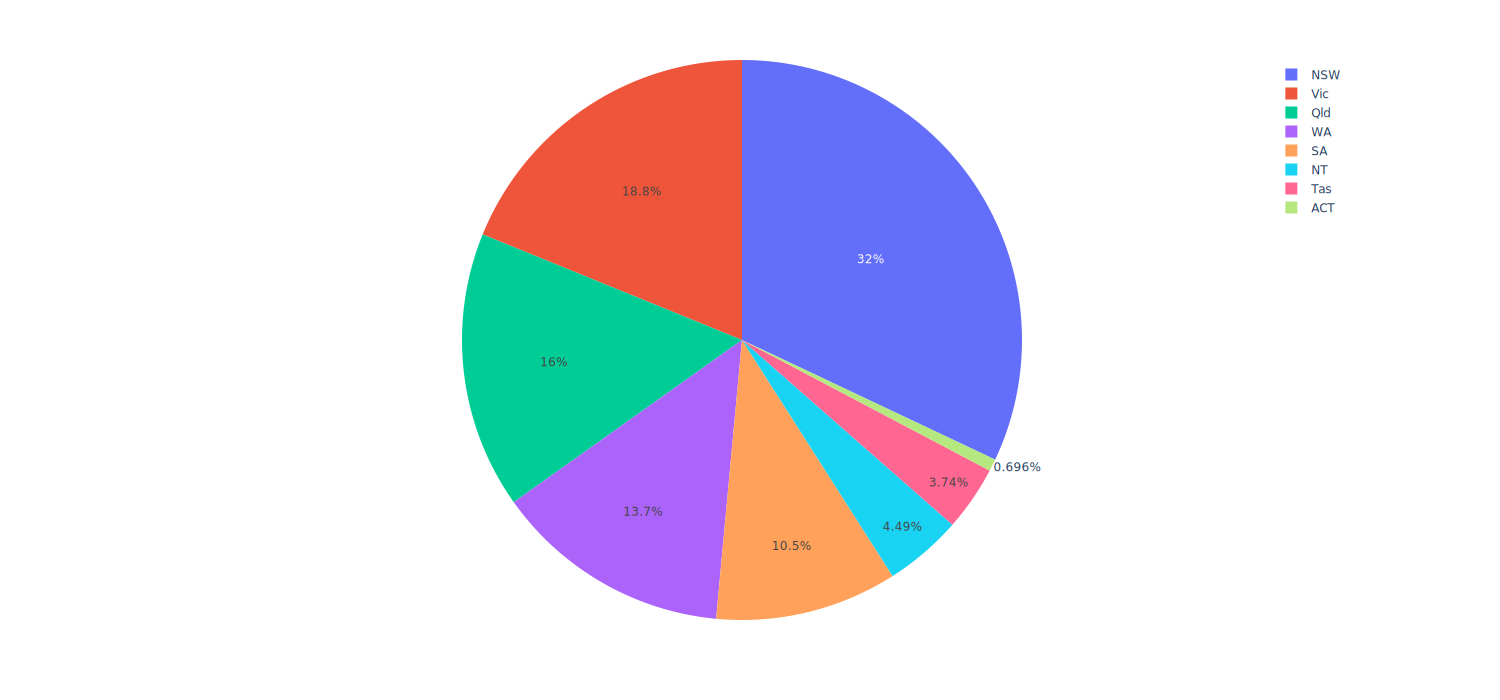

In [152]:
fig = px.pie(data_frame=complete_sub,values='Number Fatalities',names=complete_sub.index, width= 1500, height=700)

fig.show("svg")

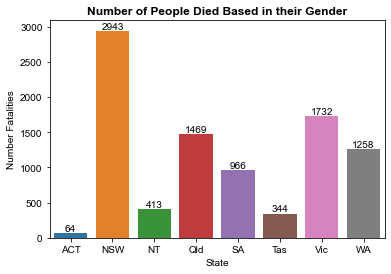

In [47]:


FatPerState = complete_data_sub.groupby(['State'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'State', y = 'Number Fatalities', data= FatPerState)

ax.bar_label(ax.containers[0])


plt.title("Number of People Died Based in their Gender", fontweight = 'bold')


sns.set(rc={'figure.figsize':(10,6)})

plt.show()


**What were the number of death for each year and plot it**

In [48]:
complete_data.groupby(['Year'])['Number Fatalities'].sum()

Year
2014     353
2015    1123
2016     880
2017    1137
2018    1285
2019    1352
2020    1303
2021    1119
2022     637
Name: Number Fatalities, dtype: int64

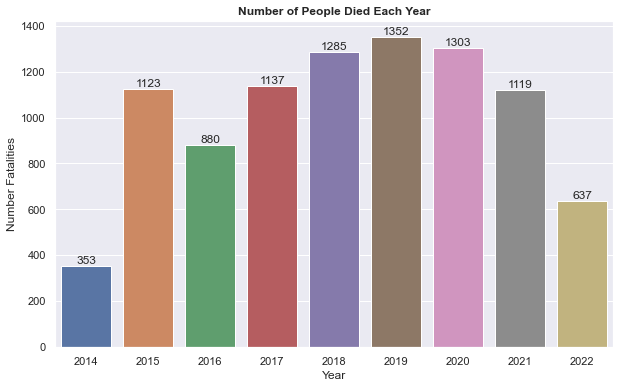

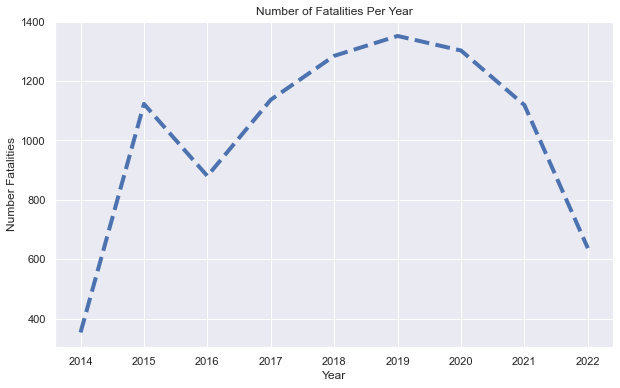

In [49]:

FatPerYear = complete_data_sub.groupby(['Year'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'Year', y = 'Number Fatalities', data= FatPerYear)

ax.bar_label(ax.containers[0])


plt.title("Number of People Died Each Year", fontweight = 'bold')


sns.set(rc={'figure.figsize':(10,6)})

plt.show()




plt.figure(figsize = (10,6))


complete_data.groupby(['Year'])['Number Fatalities'].sum().plot(ls = "--", lw = 4)

plt.title("Number of Fatalities Per Year")
plt.xlabel("Year")
plt.ylabel("Number Fatalities")
plt.show()

As we can see, from 2014 - 2015. the number of death increased by more than 300% (353 to 1123), and then in 2016, it went down by about 21.64% before it peaked to 1352 Death in 2019. It appears, it's been declining ever since. 

**Determine the last month in the dataset in which death was reported**

In [50]:
complete_data[complete_data['Year'] == 2022]['Month'].max()

7

July 2022 was the latest death report we have in the dataset

In [51]:
#Total Death due to car crash on Australian road from 2014 - 2022

complete_data_sub["Number Fatalities"].sum()

9189

**Group fatalities in age group and plot the result**

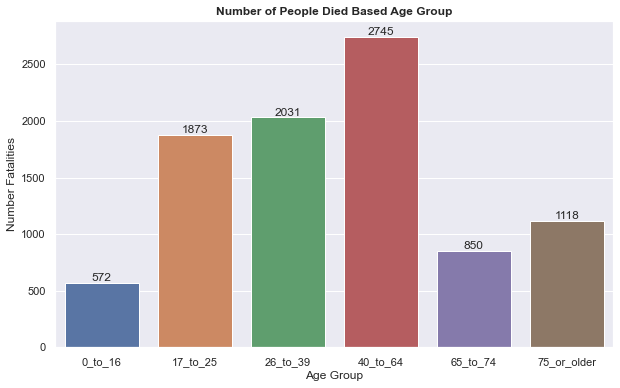

In [52]:

FatPerAge = complete_data_sub.groupby(['Age Group'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'Age Group', y = 'Number Fatalities', data= FatPerAge)

ax.bar_label(ax.containers[0])


plt.title("Number of People Died Based Age Group", fontweight = 'bold')


sns.set(rc={'figure.figsize':(10,6)})

plt.show()



**Categorize the fatalities based on gender and plot the result**

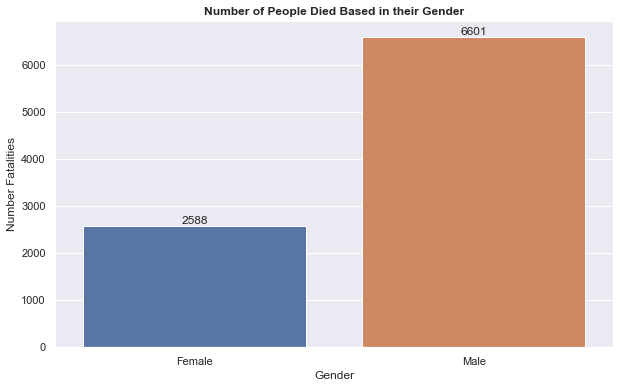

In [53]:

FatPerGender = complete_data_sub.groupby(['Gender'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'Gender', y = 'Number Fatalities', data= FatPerGender)

ax.bar_label(ax.containers[0])


plt.title("Number of People Died Based in their Gender", fontweight = 'bold')


sns.set(rc={'figure.figsize':(10,6)})

plt.show()





**Determine in which day these fatalities occurred and plot it**

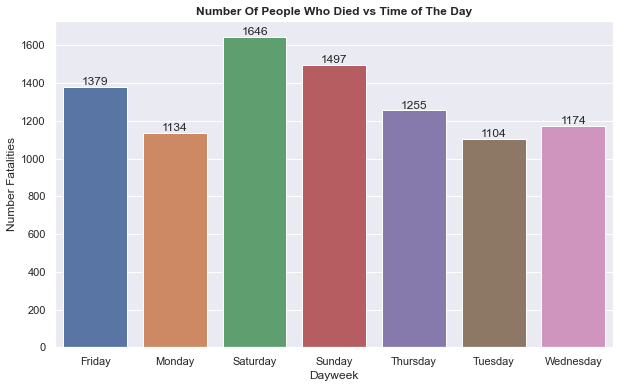

In [54]:
FatPerDay = complete_data_sub.groupby(['Dayweek'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'Dayweek', y = 'Number Fatalities', data= FatPerDay)

ax.bar_label(ax.containers[0])


plt.title("Number Of People Who Died vs Time of The Day", fontweight = 'bold')


sns.set(rc={'figure.figsize':(12,8)})


plt.show()




**Categorize the death based on time of the day**

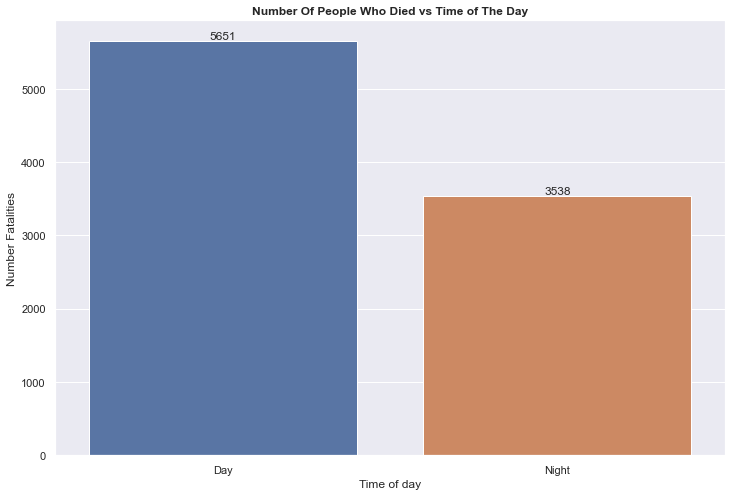

In [55]:
FatPertTime = complete_data_sub.groupby(['Time of day'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'Time of day', y = 'Number Fatalities', data= FatPertTime)

ax.bar_label(ax.containers[0])


plt.title("Number Of People Who Died vs Time of The Day", fontweight = 'bold')

sns.set(rc={'figure.figsize':(6,4)})

plt.show()

**Who were the fatalities?** **And Plot the result**

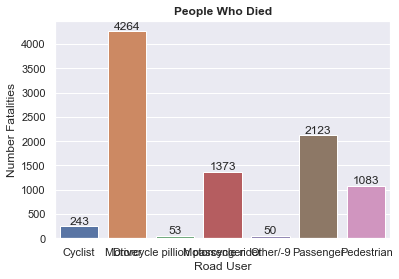

In [56]:

FatPerCrashType = complete_data_sub.groupby(['Road User'])['Number Fatalities'].sum().reset_index()



ax = sns.barplot(x = 'Road User', y = 'Number Fatalities', data= FatPerCrashType)

ax.bar_label(ax.containers[0])

sns.set(rc={'figure.figsize':(16,14)})

plt.title("People Who Died", fontweight = 'bold')


plt.show()

In [57]:
complete_data_sub.head()

,State,Number Fatalities,Age Group,Gender,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,Christmas Period,Easter Period,Day of week,Time of day
0,NSW,1,17_to_25,Male,2022,Motorcycle rider,Friday,12:05,Multiple,100,No,No,Weekday,Day
1,NSW,1,40_to_64,Male,2022,Driver,Wednesday,18:50,Single,60,No,No,Weekday,Night
2,NSW,1,65_to_74,Male,2022,Pedestrian,Thursday,10:30,Single,60,No,No,Weekday,Day
3,NSW,1,40_to_64,Female,2022,Pedestrian,Tuesday,22:10,Single,110,No,No,Weekday,Night
4,Qld,1,65_to_74,Male,2022,Motorcycle rider,Thursday,15:00,Single,60,No,No,Weekday,Day


In [58]:
#Number of Death reported in each State from 2014 - 2022 

Num_Death = complete_data.groupby(["State"])["Number Fatalities"].sum()
Num_Death

State
ACT      64
NSW    2943
NT      413
Qld    1469
SA      966
Tas     344
Vic    1732
WA     1258
Name: Number Fatalities, dtype: int64

**Number of Road accident incidents reported in each State**

In [59]:
grouped_state = complete_data['State'].value_counts()
grouped_state

NSW    2541
Vic    1502
Qld    1191
WA     1042
SA      822
NT      301
Tas     296
ACT      60
Name: State, dtype: int64

In [60]:
grouped_state.head(2)

NSW    2541
Vic    1502
Name: State, dtype: int64

It appears there were 2541 and 1502 car accidents reported on NSW and VIC from 2014 -2022 respectively, 

Total Death in each State:

    * NSW Death: 2943
    * VIC Death: 1732

<h2><center>State by State Death/Fatality Due To Car Crash Descriptive Data Analysis</center></h2>

In [61]:
complete_data_sub.groupby(['State'])['Number Fatalities'].sum()

State
ACT      64
NSW    2943
NT      413
Qld    1469
SA      966
Tas     344
Vic    1732
WA     1258
Name: Number Fatalities, dtype: int64

In [62]:
complete_data_sub.head()

,State,Number Fatalities,Age Group,Gender,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,Christmas Period,Easter Period,Day of week,Time of day
0,NSW,1,17_to_25,Male,2022,Motorcycle rider,Friday,12:05,Multiple,100,No,No,Weekday,Day
1,NSW,1,40_to_64,Male,2022,Driver,Wednesday,18:50,Single,60,No,No,Weekday,Night
2,NSW,1,65_to_74,Male,2022,Pedestrian,Thursday,10:30,Single,60,No,No,Weekday,Day
3,NSW,1,40_to_64,Female,2022,Pedestrian,Tuesday,22:10,Single,110,No,No,Weekday,Night
4,Qld,1,65_to_74,Male,2022,Motorcycle rider,Thursday,15:00,Single,60,No,No,Weekday,Day


In [153]:
#Death per year reported

grouped_year = complete_data_sub.groupby('Year').sum()
grouped_year


,Number Fatalities
Year,
2014,353
2015,1123
2016,880
2017,1137
2018,1285
2019,1352
2020,1303
2021,1119
2022,637


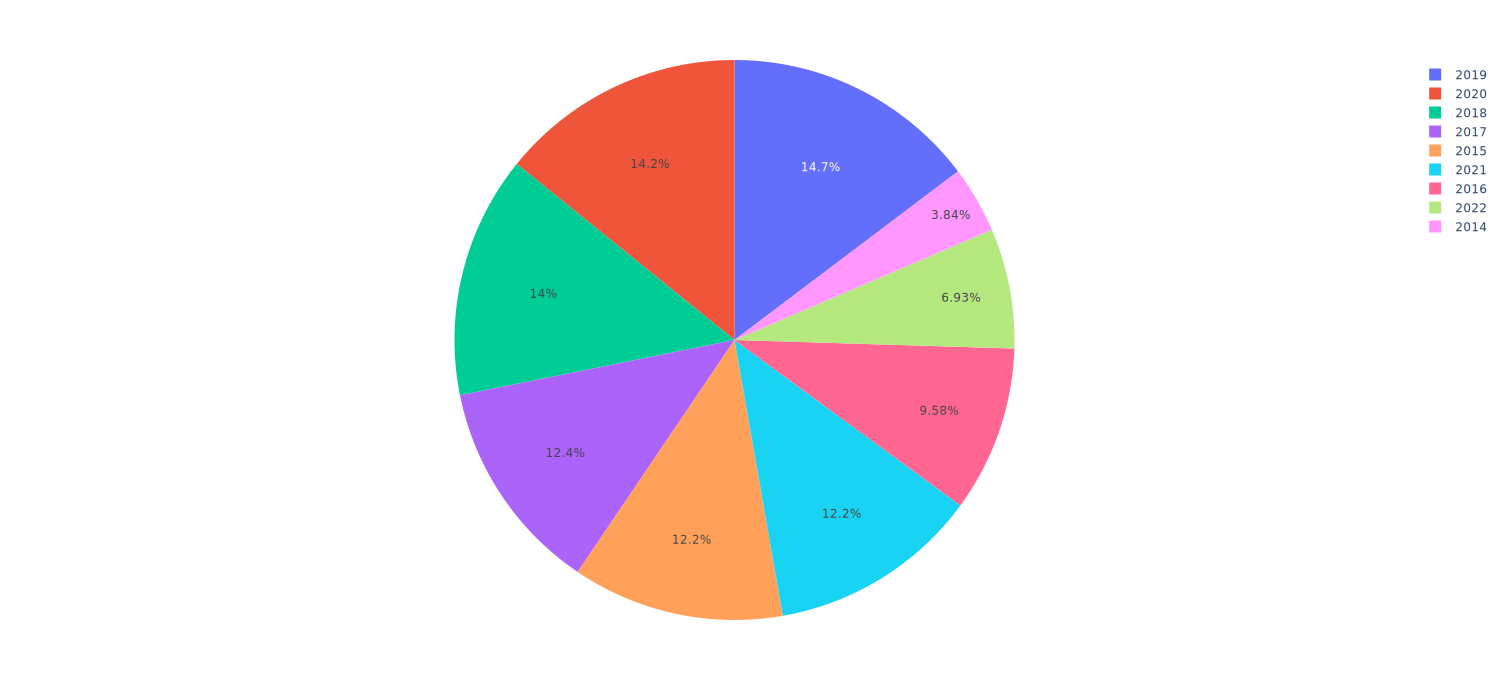

<Figure size 720x576 with 0 Axes>

In [154]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=grouped_year,values='Number Fatalities',names=grouped_year.index, width= 1500, height=700)

fig.show("svg")

<center><h2>Australian Capital Territory(ACT)</h2></center>

***What is the total number of Death in ACT?***

In [65]:
complete_data_sub[complete_data_sub['State'] == 'ACT']['Number Fatalities'].sum()

64

**How many people died each year? and Plot the result**

In [156]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_year = act.groupby(['Year']).sum()
act_grouped_by_year

,Number Fatalities
Year,
2015,17
2016,10
2017,4
2018,7
2019,5
2020,7
2021,5
2022,9


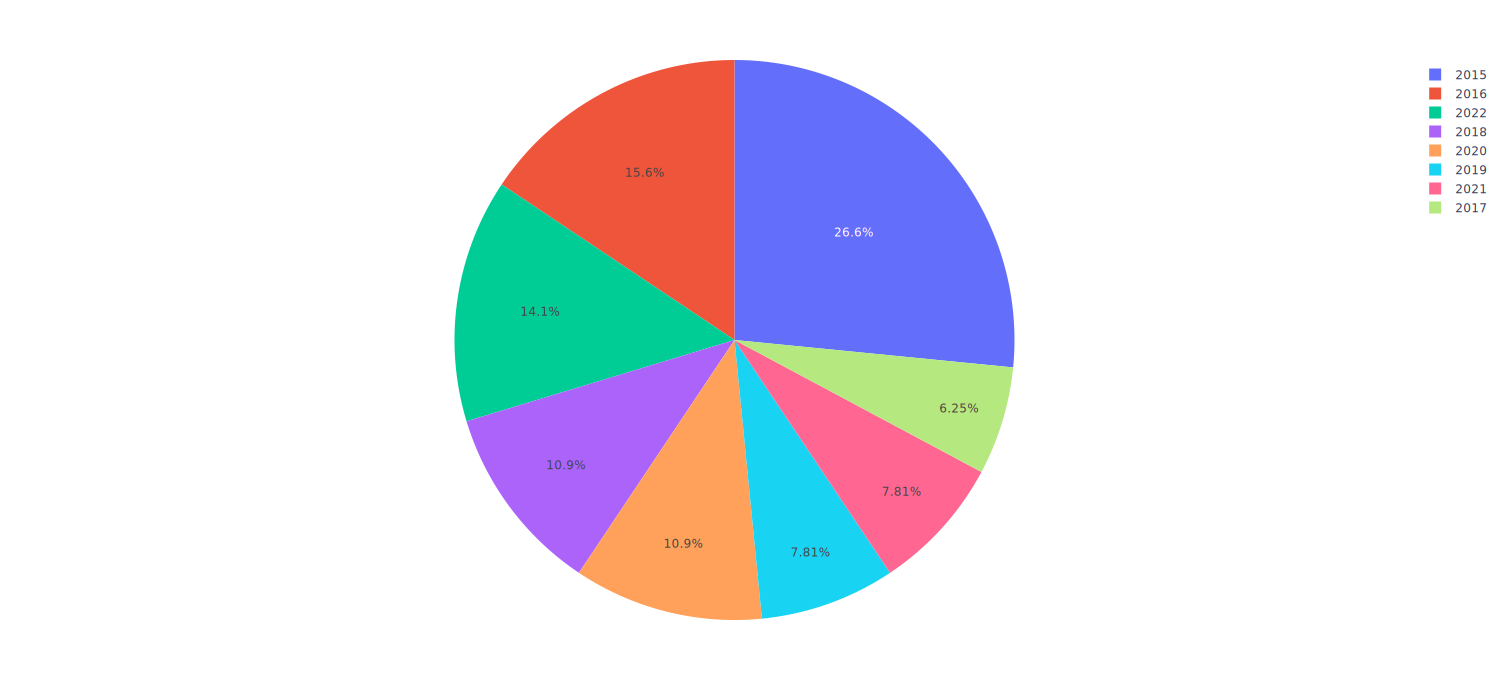

<Figure size 720x576 with 0 Axes>

In [157]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=act_grouped_by_year,values='Number Fatalities',names=act_grouped_by_year.index, width= 1500, height= 700)
fig.show("svg")


**Determine the number of fatalities based on Gender for each year**

In [158]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_year = act.groupby(['Year', 'Gender']).sum()
act_grouped_by_year

Number Fatalities
Year Gender                   
2015 Female                  4
     Male                   13
2016 Female                  3
     Male                    7
2017 Male                    4
2018 Female                  2
     Male                    5
2019 Female                  1
     Male                    4
2020 Female                  1
     Male                    6
2021 Female                  1
     Male                    4
2022 Female                  3
     Male                    6

**How many Male and Female Died? and show the percentile** 

In [159]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_Gender = act.groupby(['Gender'])['Number Fatalities'].sum()
act_grouped_by_Gender

Gender
Female    15
Male      49
Name: Number Fatalities, dtype: int64

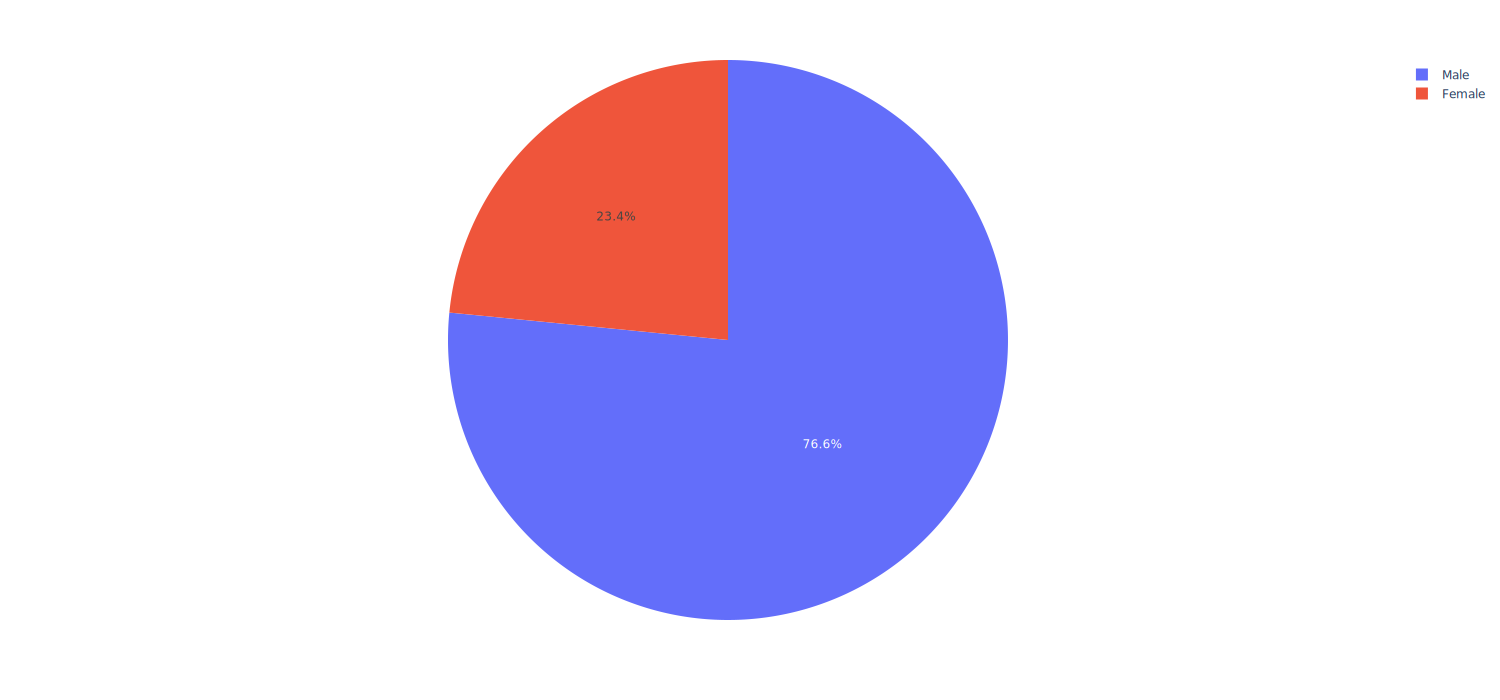

<Figure size 720x576 with 0 Axes>

In [160]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=act_grouped_by_Gender,values='Number Fatalities',names=act_grouped_by_Gender.index, width= 1500, height= 700)

fig.show("svg")

**When did the crash/death happen?**

In [161]:
#Death based on weekday vs weekend

act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_DayOfWeek = act.groupby(['Day of week'])['Number Fatalities'].sum()
act_grouped_by_DayOfWeek

Day of week
Weekday    37
Weekend    27
Name: Number Fatalities, dtype: int64

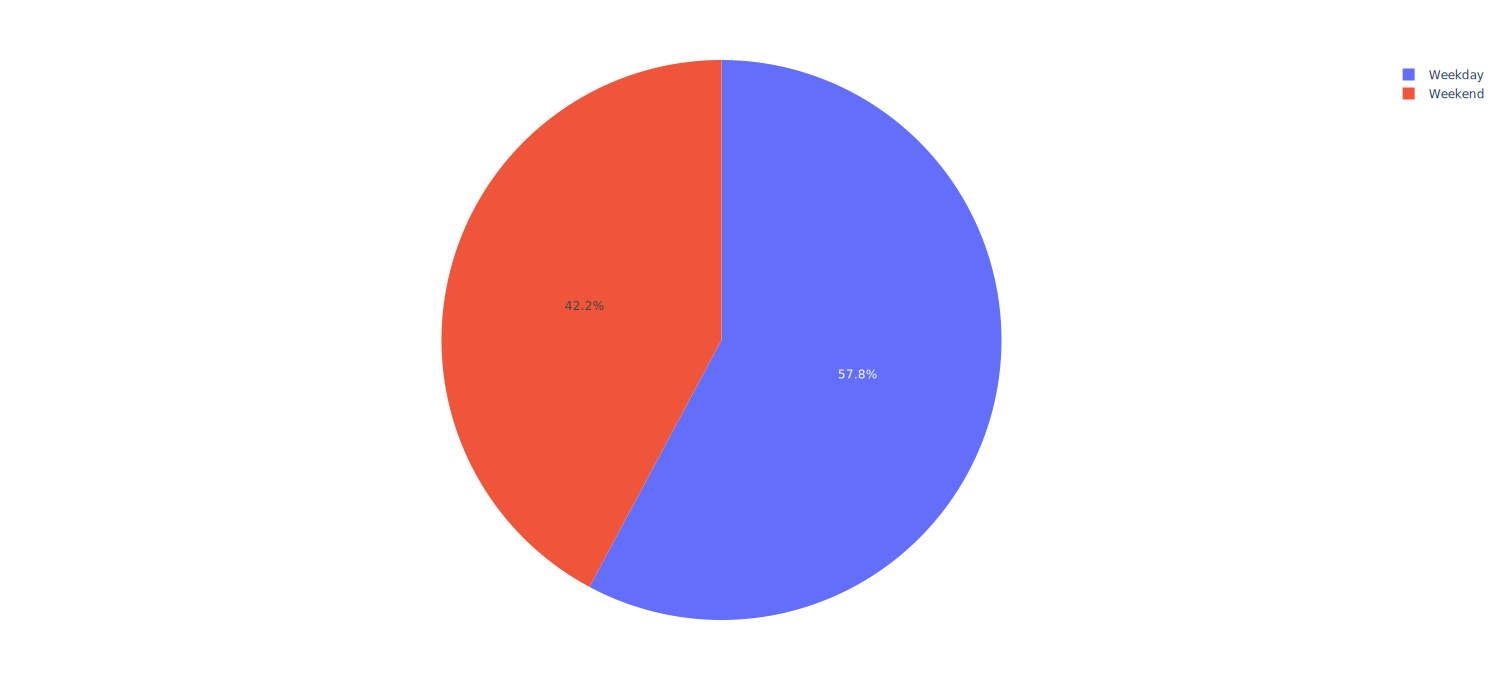

<Figure size 720x576 with 0 Axes>

In [162]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=act_grouped_by_DayOfWeek,values='Number Fatalities',names=act_grouped_by_DayOfWeek.index, width= 1500, height= 700)
fig.show("svg")

In [163]:
#Death based on time of the day

act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_Time = act.groupby(['Time of day'])['Number Fatalities'].sum()
act_grouped_by_Time

Time of day
Day      40
Night    24
Name: Number Fatalities, dtype: int64

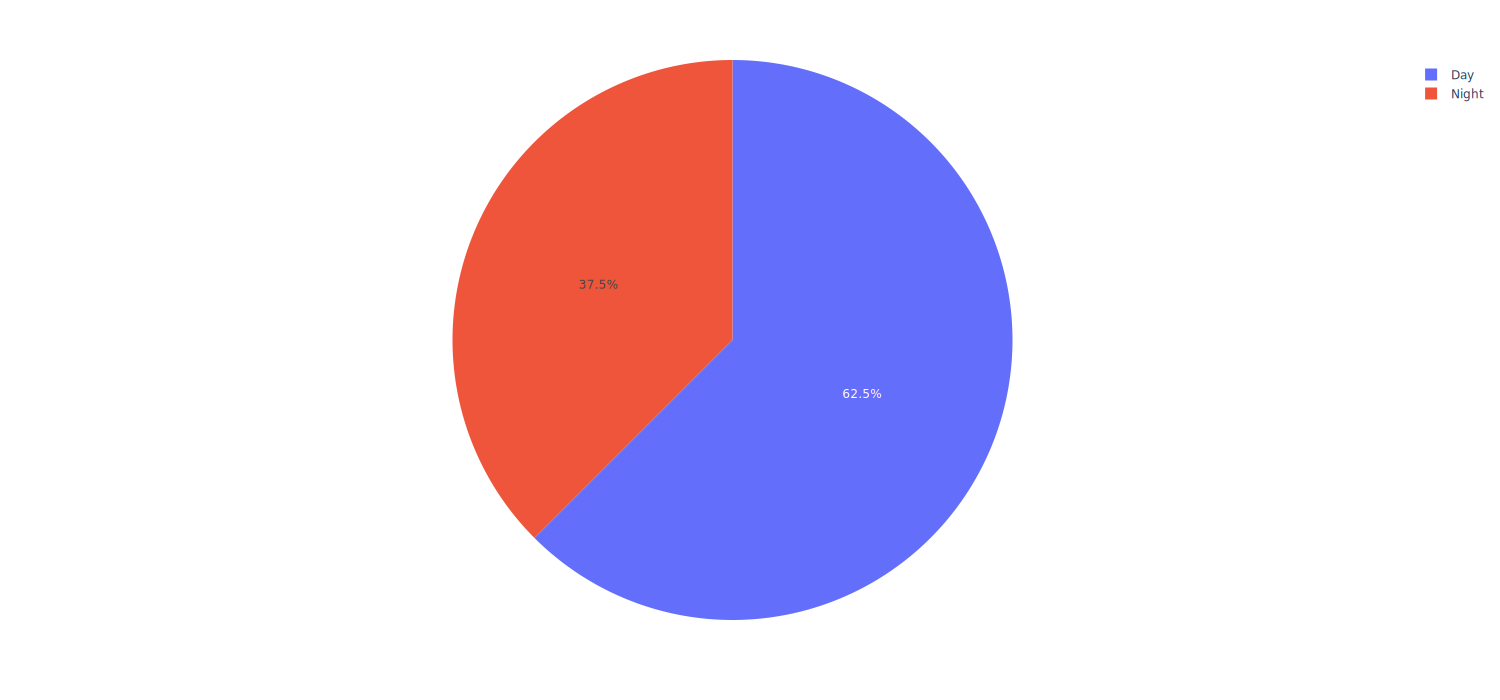

<Figure size 720x576 with 0 Axes>

In [164]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=act_grouped_by_Time,values='Number Fatalities',names=act_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")


**Determine how many people died in each day of the week**

In [75]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_Day = act.groupby(['Dayweek'])['Number Fatalities'].sum()
act_grouped_by_Day

Dayweek
Friday       10
Monday        6
Saturday     14
Sunday        8
Thursday     11
Tuesday       5
Wednesday    10
Name: Number Fatalities, dtype: int64

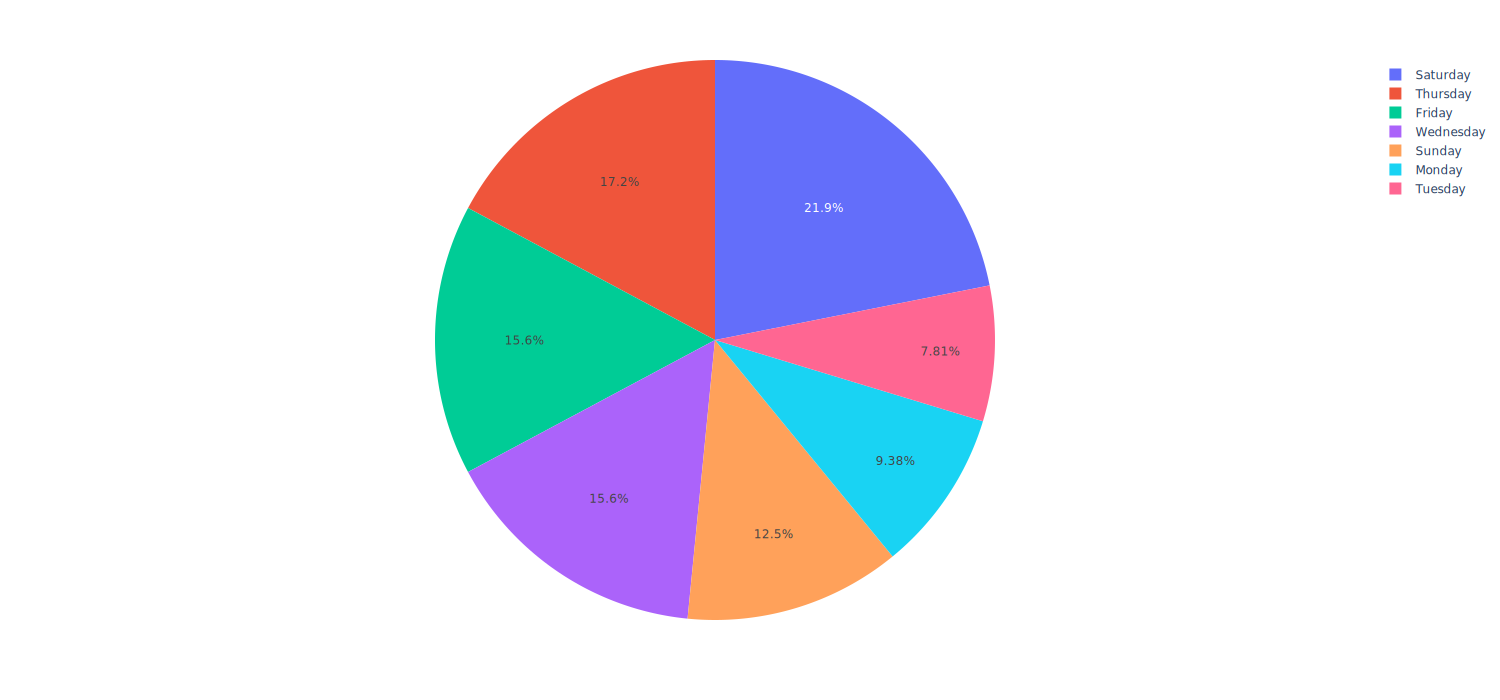

<Figure size 720x576 with 0 Axes>

In [165]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=act_grouped_by_Day,values='Number Fatalities',names=act_grouped_by_Day.index, width= 1500, height= 700)
fig.show("svg")

**Categorize the casualties based on what they were doing when the crash happened and plot it**

In [167]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_RoadUser = act.groupby(['Road User'])['Number Fatalities'].sum()
act_grouped_by_RoadUser

Road User
Cyclist              3
Driver              33
Motorcycle rider    10
Passenger           12
Pedestrian           6
Name: Number Fatalities, dtype: int64

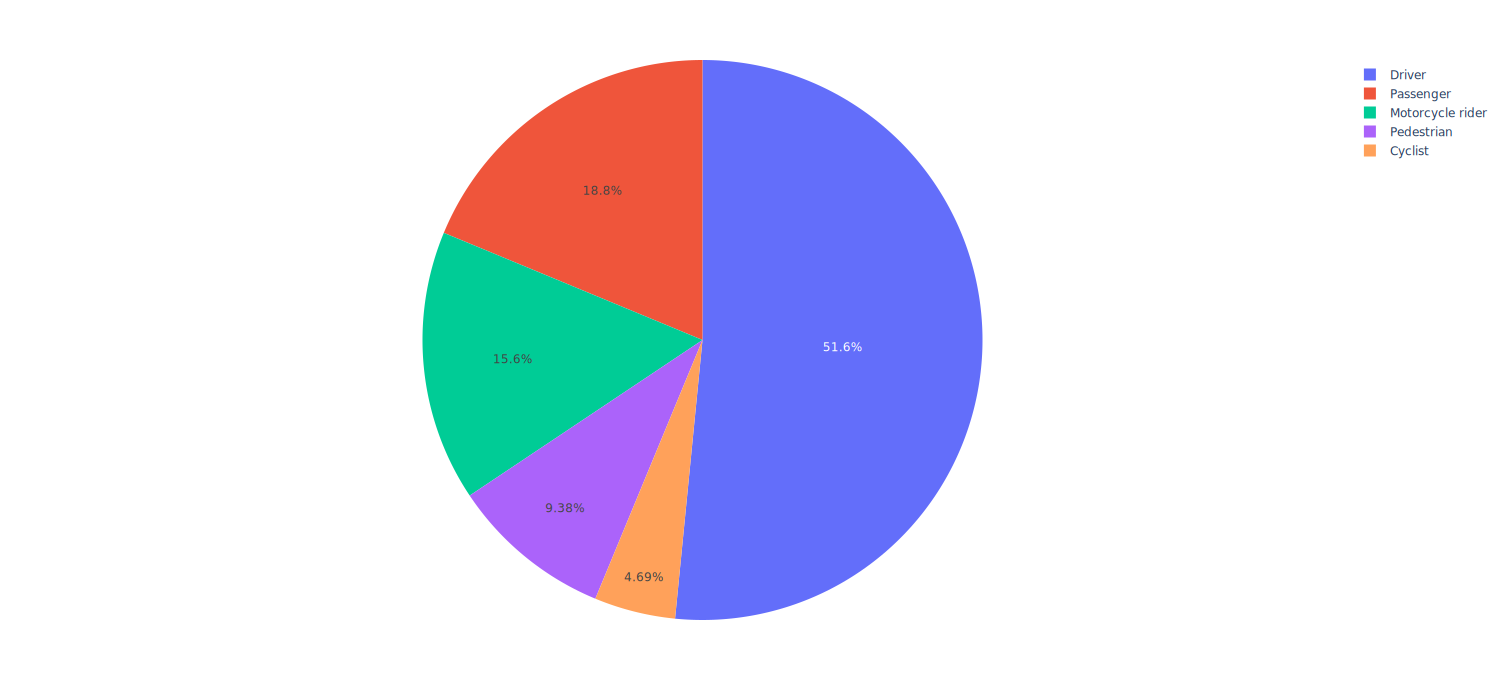

<Figure size 720x576 with 0 Axes>

In [166]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=act_grouped_by_RoadUser,values='Number Fatalities',names=act_grouped_by_RoadUser.index, width= 1500, height= 700)
fig.show("svg")

**What age group are they?**

In [79]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_AgeGroup = act.groupby(['Age Group'])['Number Fatalities'].sum()
act_grouped_by_AgeGroup

Age Group
0_to_16         3
17_to_25       18
26_to_39       15
40_to_64       16
65_to_74        4
75_or_older     8
Name: Number Fatalities, dtype: int64

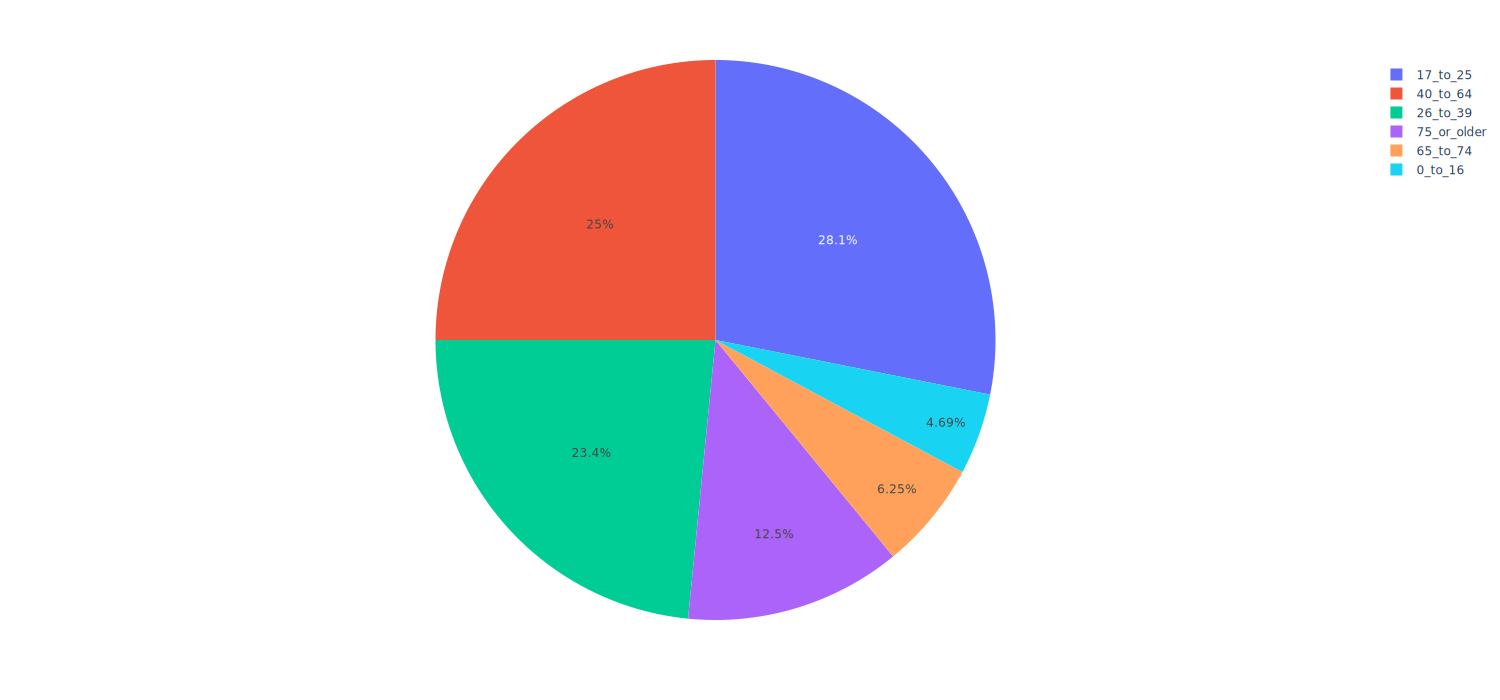

In [168]:


fig = px.pie(data_frame=act_grouped_by_AgeGroup,values='Number Fatalities',names=act_grouped_by_AgeGroup.index, width= 1500, height= 700)
fig.show("svg")

In [81]:
complete_data_sub.head()

,State,Number Fatalities,Age Group,Gender,Year,Road User,Dayweek,Time,Crash Type,Speed Limit,Christmas Period,Easter Period,Day of week,Time of day
0,NSW,1,17_to_25,Male,2022,Motorcycle rider,Friday,12:05,Multiple,100,No,No,Weekday,Day
1,NSW,1,40_to_64,Male,2022,Driver,Wednesday,18:50,Single,60,No,No,Weekday,Night
2,NSW,1,65_to_74,Male,2022,Pedestrian,Thursday,10:30,Single,60,No,No,Weekday,Day
3,NSW,1,40_to_64,Female,2022,Pedestrian,Tuesday,22:10,Single,110,No,No,Weekday,Night
4,Qld,1,65_to_74,Male,2022,Motorcycle rider,Thursday,15:00,Single,60,No,No,Weekday,Day


In [82]:
act = complete_data_sub[complete_data_sub['State'] == 'ACT']  
act_grouped_by_Age = act.groupby(['Year', 'Gender','Age Group', 'Road User', 'Dayweek', 'Time of day']).sum()
act_grouped_by_Age.head()

Number Fatalities
Year Gender Age Group   Road User Dayweek   Time of day                   
2015 Female 0_to_16     Passenger Wednesday Night                        1
            65_to_74    Driver    Friday    Day                          1
            75_or_older Passenger Thursday  Day                          2
     Male   17_to_25    Driver    Friday    Day                          1
                                  Thursday  Night                        1

<h2><center>Western Australia</center></h2>

**What is the total number of death in WA?**

In [83]:
complete_data[complete_data["State"] == "WA"]["Number Fatalities"].sum()

1258

**How many people died each year? and Plot the result**

In [170]:
wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_year = wa.groupby(['Year']).sum()
wa_grouped_by_year

,Number Fatalities
Year,
2014,182
2015,184
2016,222
2017,160
2018,165
2019,162
2020,183


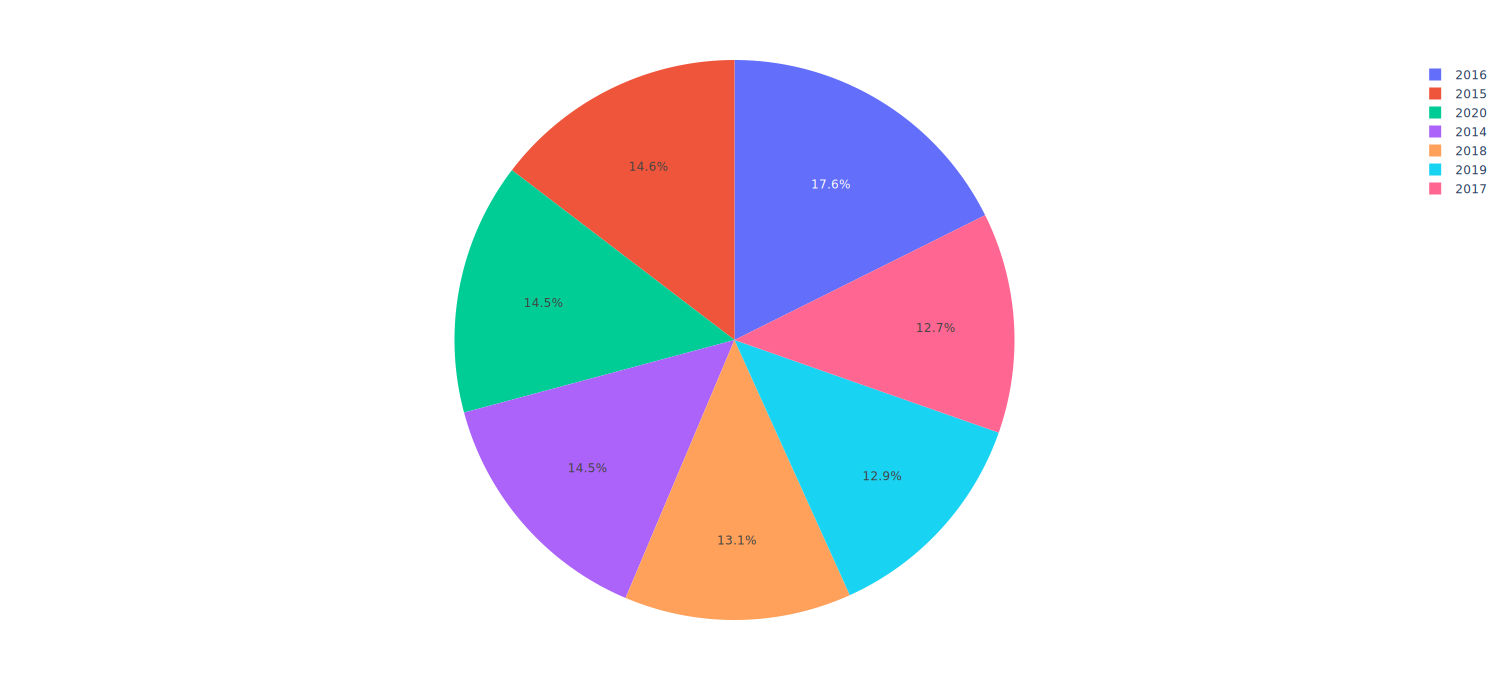

<Figure size 720x576 with 0 Axes>

In [171]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=wa_grouped_by_year,values='Number Fatalities',names=wa_grouped_by_year.index, width= 1500, height= 700)
fig.show("svg")

**Determine the number of fatalities based on Gender for each year**

In [172]:
wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_year = wa.groupby(['Year', 'Gender']).sum()
wa_grouped_by_year

Number Fatalities
Year Gender                   
2014 Female                 57
     Male                  125
2015 Female                 52
     Male                  132
2016 Female                 62
     Male                  160
2017 Female                 37
     Male                  123
2018 Female                 50
     Male                  115
2019 Female                 41
     Male                  121
2020 Female                 58
     Male                  125

 **How many Male and Female Died? and show the percentile** 


In [87]:
wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_Gender = wa.groupby(['Gender'])['Number Fatalities'].sum()
wa_grouped_by_Gender

Gender
Female    357
Male      901
Name: Number Fatalities, dtype: int64

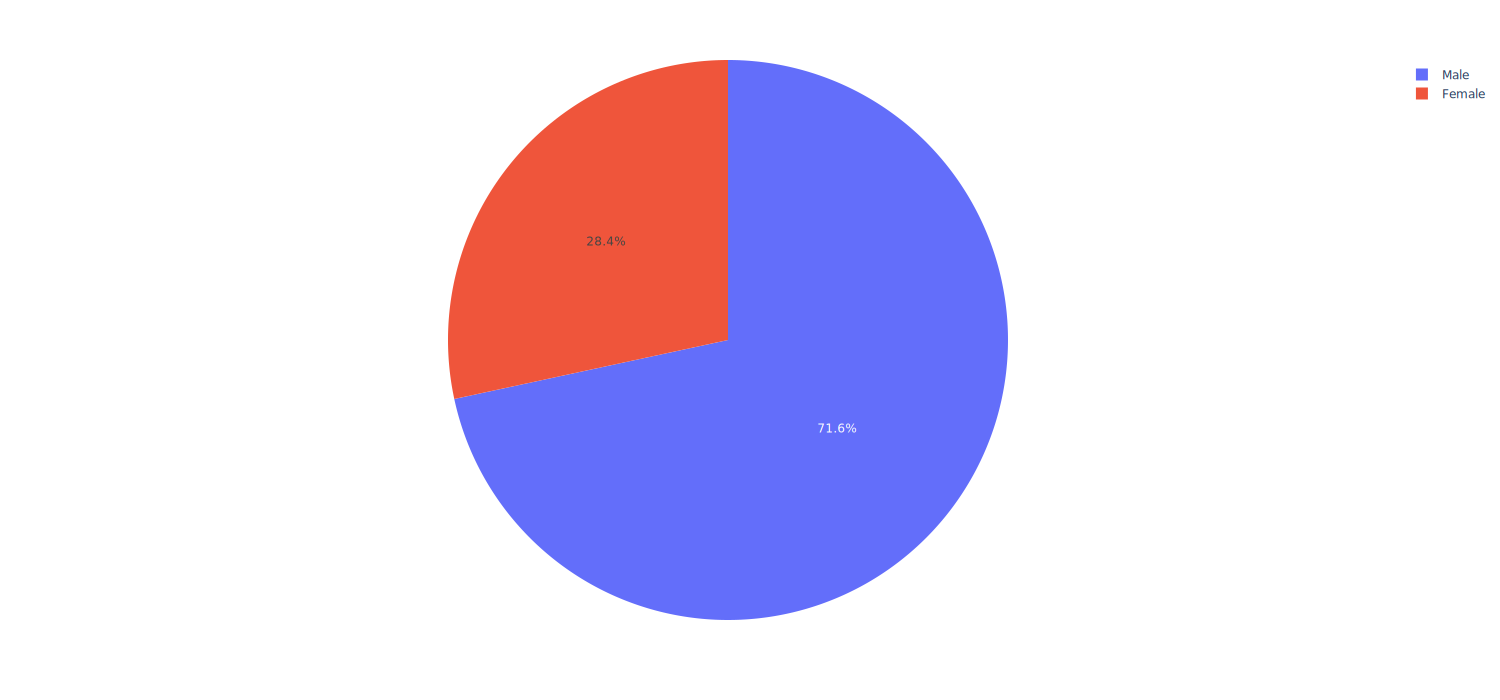

<Figure size 720x576 with 0 Axes>

In [173]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=wa_grouped_by_Gender,values='Number Fatalities',names=wa_grouped_by_Gender.index, width= 1500, height= 700)
fig.show("svg")

**When did the crash/death happen?**

In [174]:

#Death based on weekday vs weekend

wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_DayOfWeek = wa.groupby(['Day of week'])['Number Fatalities'].sum()
wa_grouped_by_DayOfWeek

Day of week
Weekday    693
Weekend    565
Name: Number Fatalities, dtype: int64

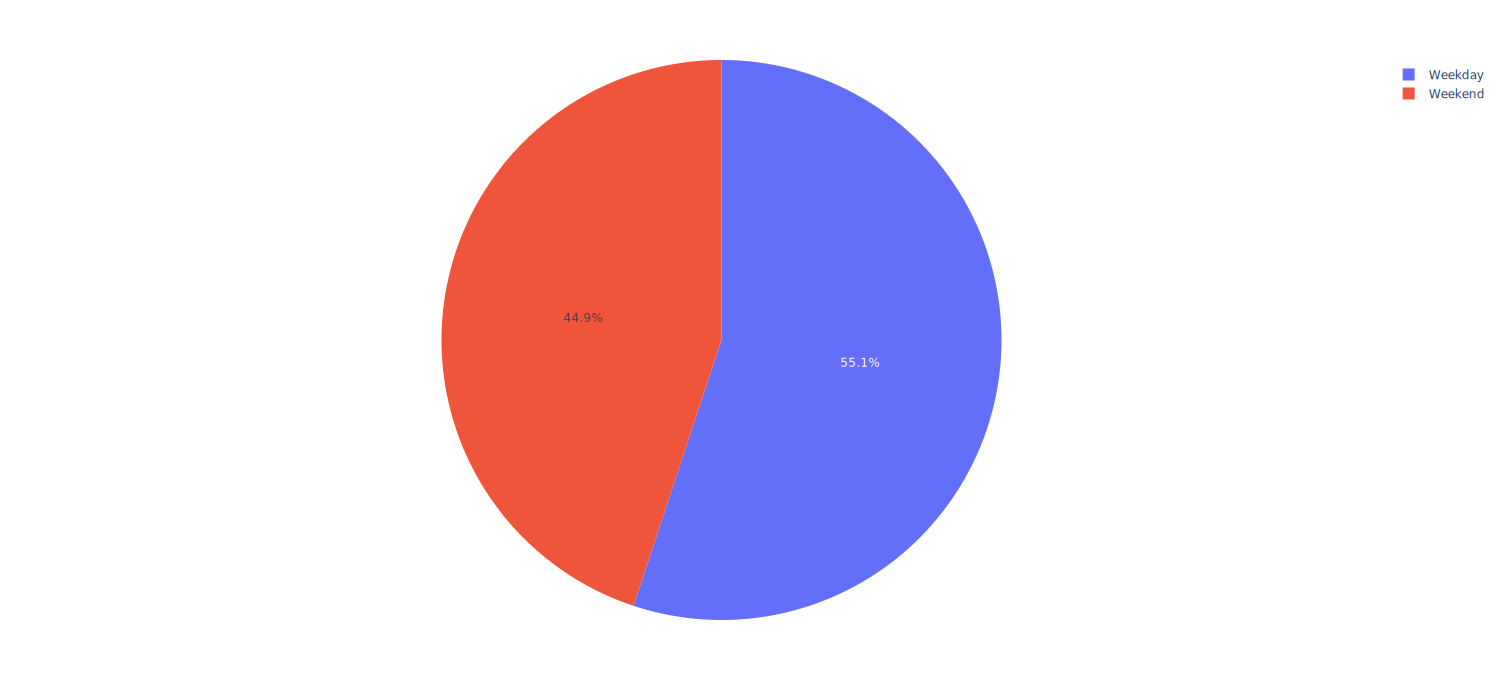

<Figure size 720x576 with 0 Axes>

In [175]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=wa_grouped_by_DayOfWeek,values='Number Fatalities',names=wa_grouped_by_DayOfWeek.index, width= 1500, height= 700)
fig.show("svg")

In [176]:

#Death based on time of the day

wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_Time = wa.groupby(['Time of day'])['Number Fatalities'].sum()
wa_grouped_by_Time

Time of day
Day      755
Night    503
Name: Number Fatalities, dtype: int64

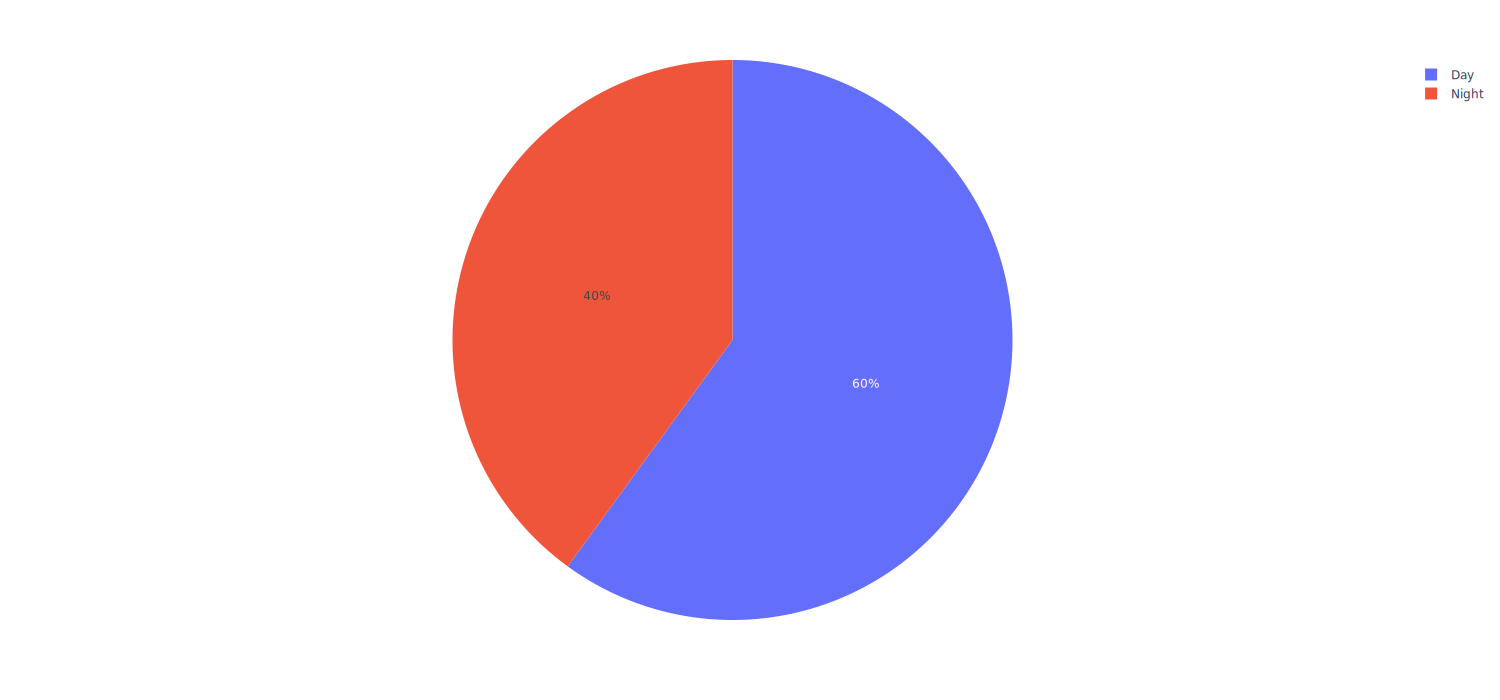

<Figure size 720x576 with 0 Axes>

In [177]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=wa_grouped_by_Time,values='Number Fatalities',names=wa_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")

**Determine how many people died in each day of the week**

In [178]:
wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_Day = wa.groupby(['Dayweek'])['Number Fatalities'].sum()
wa_grouped_by_Day


Dayweek
Friday       204
Monday       141
Saturday     240
Sunday       228
Thursday     156
Tuesday      129
Wednesday    160
Name: Number Fatalities, dtype: int64

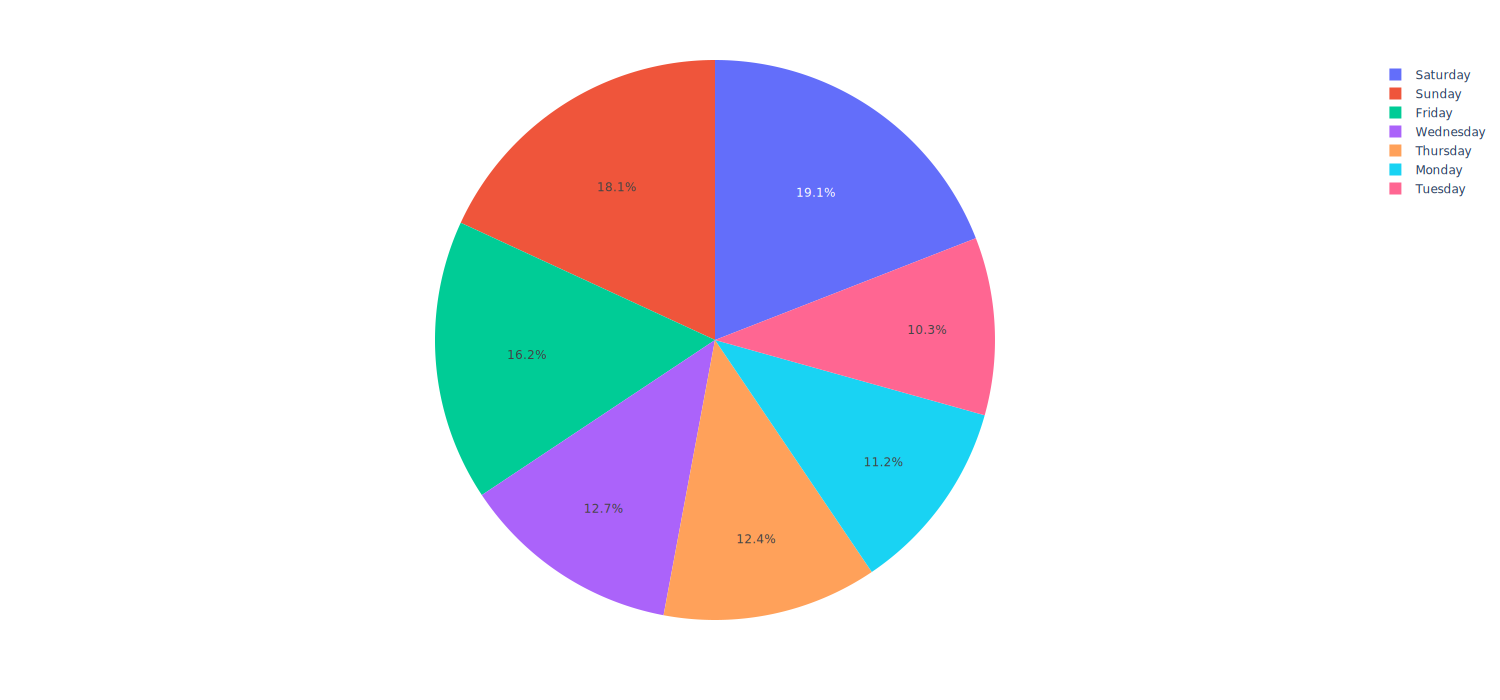

<Figure size 720x576 with 0 Axes>

In [180]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=wa_grouped_by_Day,values='Number Fatalities',names=wa_grouped_by_Day.index, width= 1500, height= 700)
fig.show("svg")

**Categorize the casualties based on what they were doing when the crash happened and plot it**

In [181]:
wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_RoadUser = wa.groupby(['Road User'])['Number Fatalities'].sum()
wa_grouped_by_RoadUser




Road User
Cyclist                          29
Driver                          585
Motorcycle pillion passenger      8
Motorcycle rider                188
Other/-9                         10
Passenger                       351
Pedestrian                       87
Name: Number Fatalities, dtype: int64

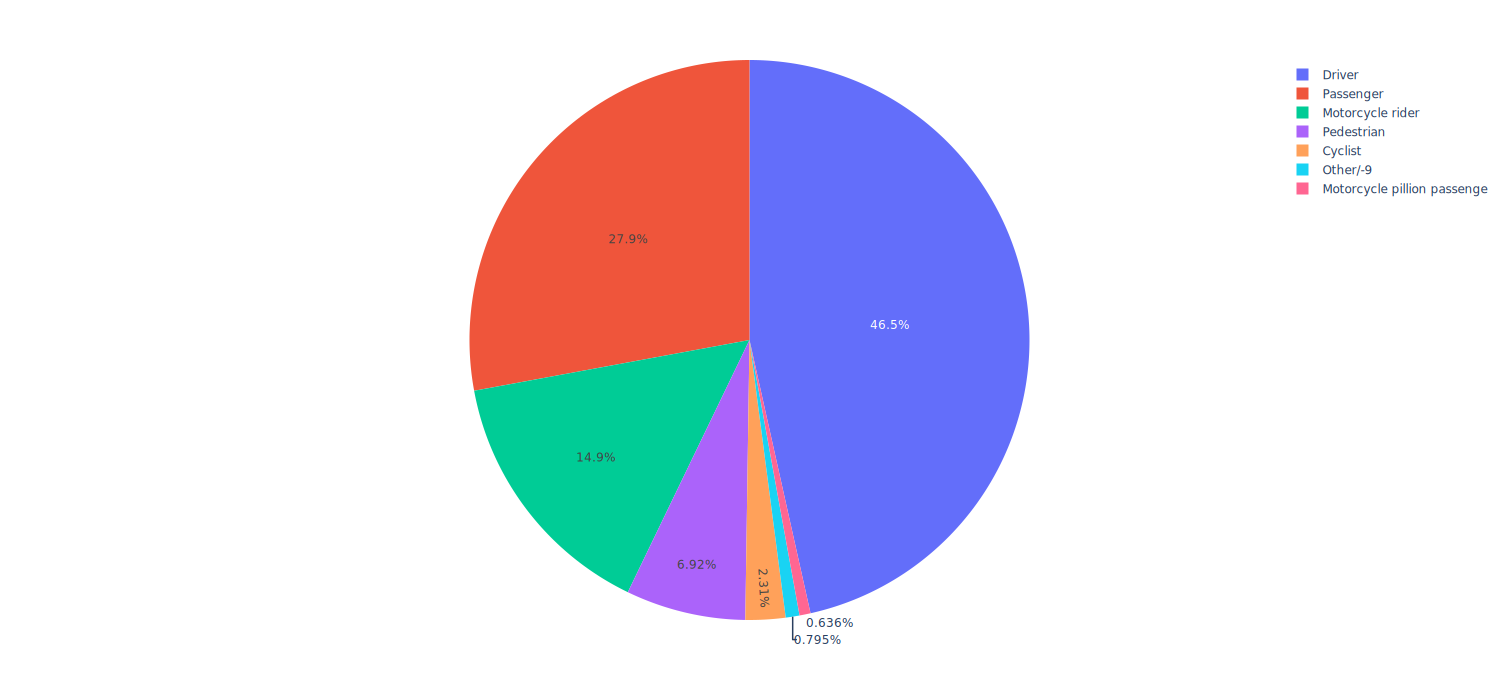

<Figure size 720x576 with 0 Axes>

In [182]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=wa_grouped_by_RoadUser,values='Number Fatalities',names=wa_grouped_by_RoadUser.index, width= 1500, height= 700)
fig.show("svg")

**What age group were they?**

In [97]:

wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_AgeGroup = wa.groupby(['Age Group'])['Number Fatalities'].sum()
wa_grouped_by_AgeGroup

Age Group
0_to_16         97
17_to_25       287
26_to_39       305
40_to_64       376
65_to_74        78
75_or_older    115
Name: Number Fatalities, dtype: int64

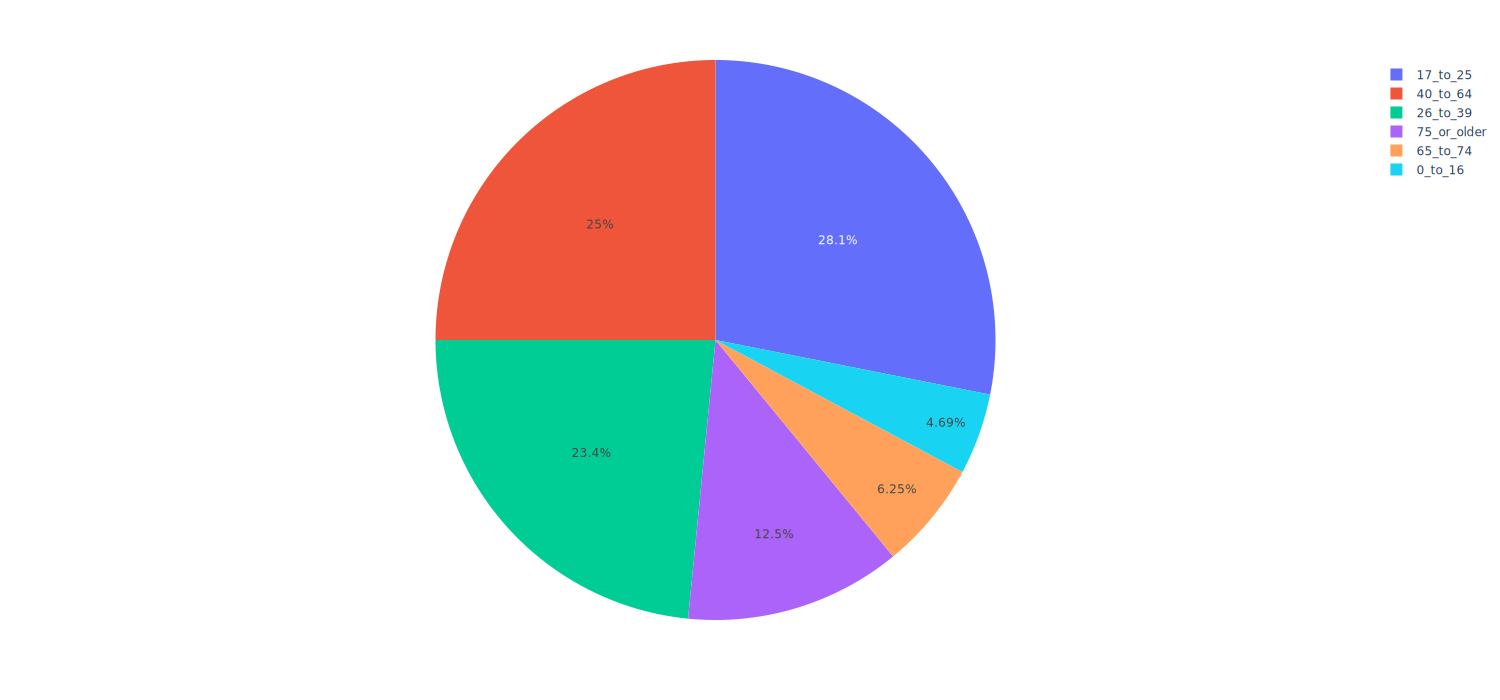

In [183]:
fig = px.pie(data_frame=act_grouped_by_AgeGroup,values='Number Fatalities',names=act_grouped_by_AgeGroup.index, width= 1500, height= 700)
fig.show("svg")

In [184]:

wa = complete_data_sub[complete_data_sub['State'] == 'WA']  
wa_grouped_by_Age = wa.groupby(['Year', 'Gender','Age Group', 'Road User', 'Dayweek', 'Time of day']).sum()
wa_grouped_by_Age.head(20)

Number Fatalities
Year Gender Age Group Road User                    Dayweek  Time of day                   
2014 Female 0_to_16   Passenger                    Monday   Day                          2
                                                   Saturday Day                          1
                                                   Sunday   Night                        8
            17_to_25  Driver                       Sunday   Day                          2
                                                            Night                        1
                      Motorcycle pillion passenger Sunday   Night                        2
                      Passenger                    Friday   Night                        1
                                                   Monday   Day                          2
                                                   Sunday   Day                          1
                                                   Thursday Night                        1
                                                   Tuesday  Day                          1
            26_to_39  Driver                       Friday   Day                          1
                                                   Sunday   Night                        4
                                                   Tuesday  Day                          1
                                                            Night                        1
                      Passenger                    Friday   Day                          1
                                                   Sunday   Night                        2
                                                   Thursday Day                          1
                      Pedestrian                   Monday   Night                        1
            40_to_64  Cyclist                      Thursday Day                          1

<h2><center>New South Wales</center></h2>

**What is the total death in NSW?**


In [100]:
complete_data[complete_data["State"] == "NSW"]["Number Fatalities"].sum()

2943

**How many people died each year? and Plot the result**

In [186]:
nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_year = nsw.groupby(['Year']).sum()
nsw_grouped_by_year



,Number Fatalities
Year,
2015,402
2016,432
2017,485
2018,393
2019,401
2020,332
2021,308
2022,190


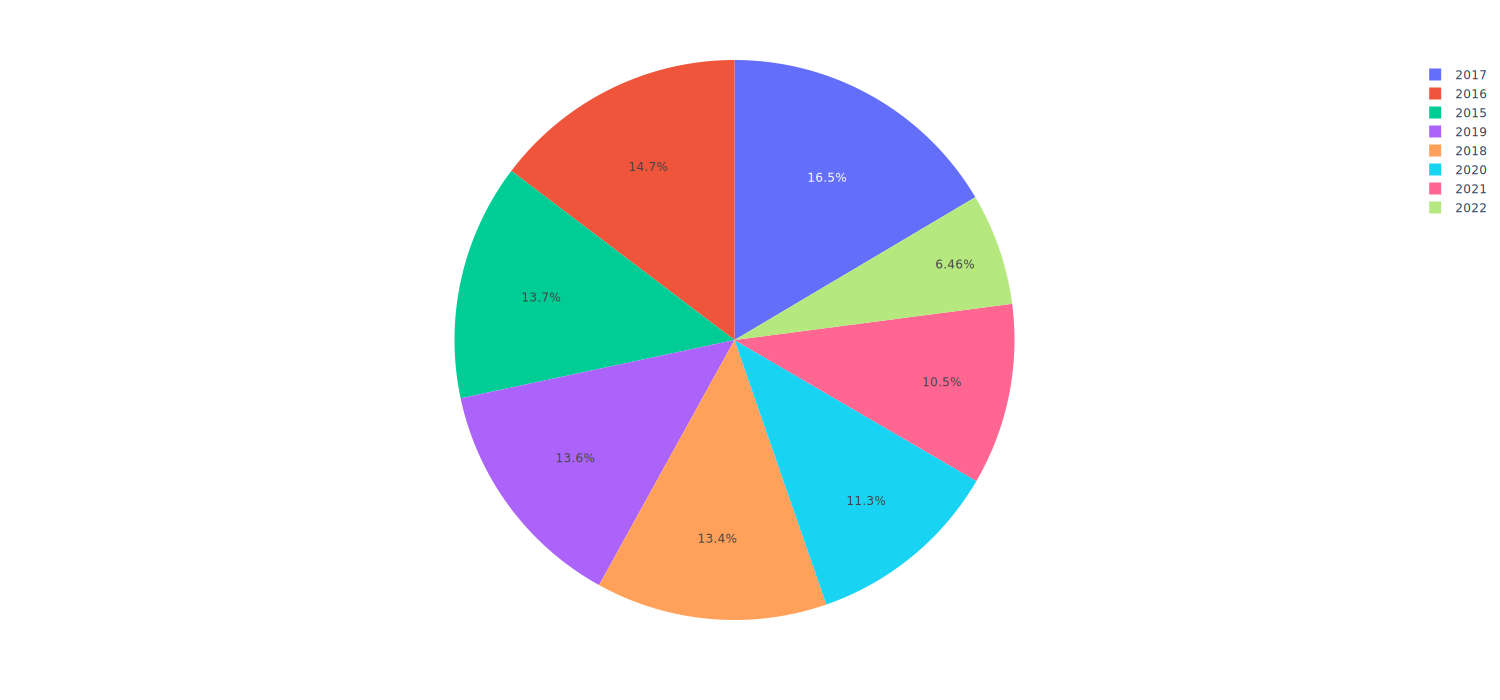

<Figure size 720x576 with 0 Axes>

In [187]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nsw_grouped_by_year,values='Number Fatalities',names=nsw_grouped_by_year.index, width= 1500, height= 700)
fig.show("svg")

**Determine the number of fatalities based on Gender for each year**

In [188]:
nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_year = nsw.groupby(['Year', 'Gender']).sum()
nsw_grouped_by_year

Number Fatalities
Year Gender                   
2015 Female                130
     Male                  272
2016 Female                109
     Male                  323
2017 Female                161
     Male                  324
2018 Female                 99
     Male                  294
2019 Female                 95
     Male                  306
2020 Female                101
     Male                  231
2021 Female                 75
     Male                  233
2022 Female                 48
     Male                  142

**How many Male and Female Died? and show the percentile** 

In [189]:

nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_Gender = nsw.groupby(['Gender'])['Number Fatalities'].sum()
nsw_grouped_by_Gender


Gender
Female     818
Male      2125
Name: Number Fatalities, dtype: int64

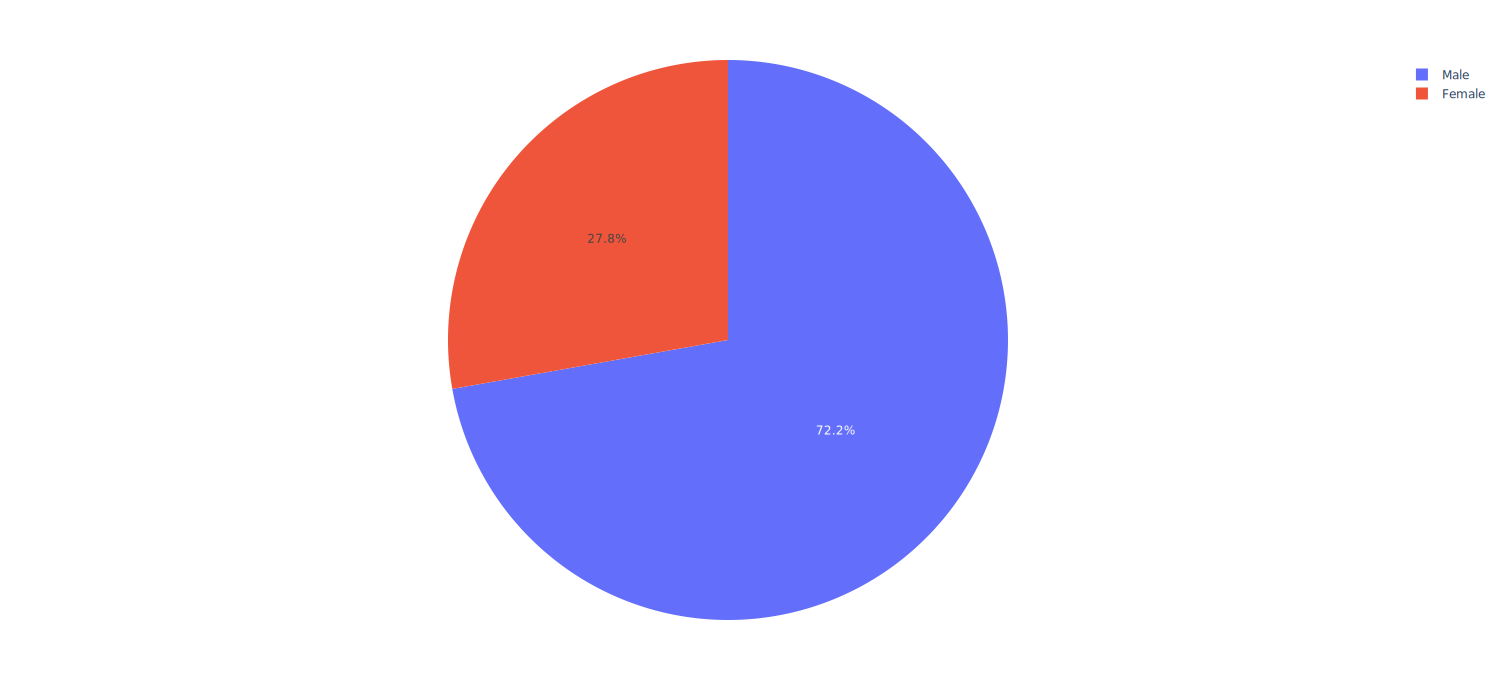

<Figure size 720x576 with 0 Axes>

In [190]:
plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nsw_grouped_by_Gender,values='Number Fatalities',names=nsw_grouped_by_Gender.index, width= 1500, height= 700)
fig.show("svg")

 **When did the crash/death happen?**

Day of week
Weekday    1792
Weekend    1151
Name: Number Fatalities, dtype: int64


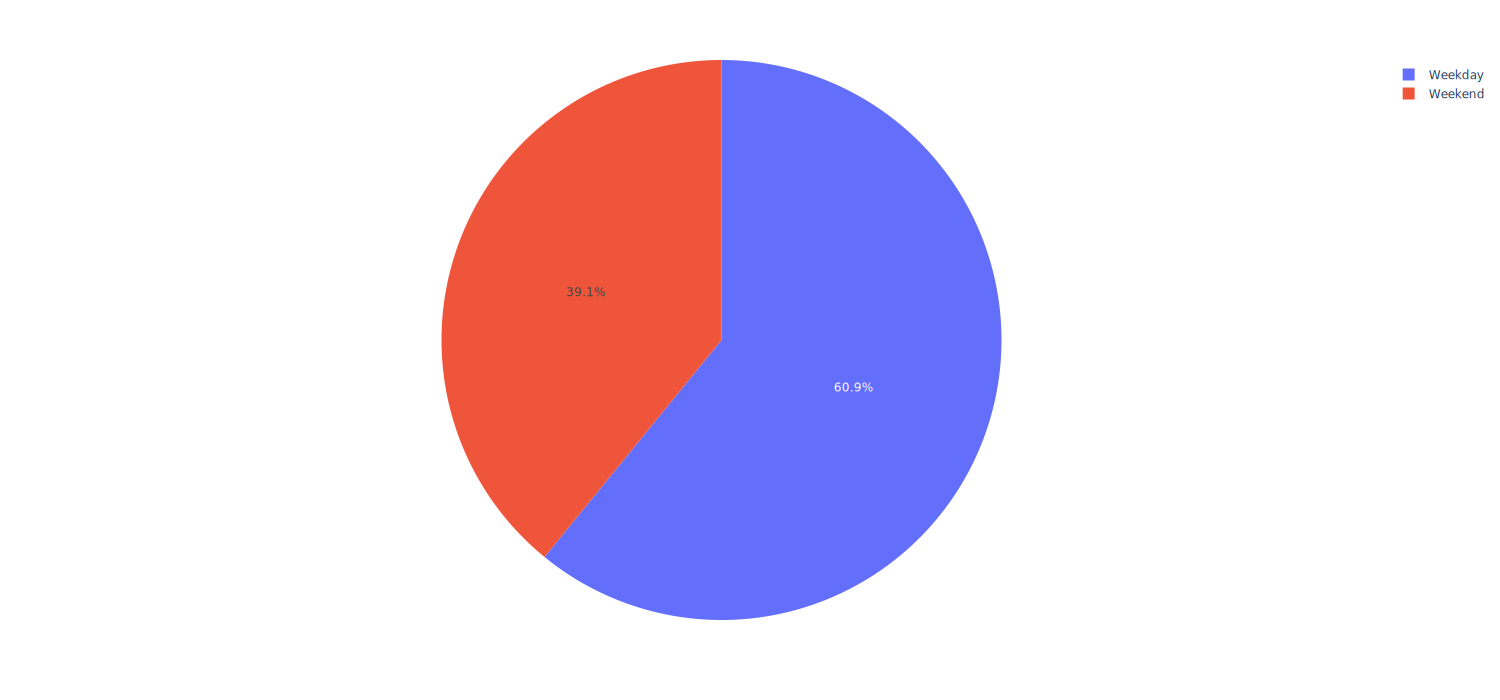

<Figure size 720x576 with 0 Axes>

In [191]:
nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_DayOfWeek = nsw.groupby(['Day of week'])['Number Fatalities'].sum()
print(nsw_grouped_by_DayOfWeek)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nsw_grouped_by_DayOfWeek,values='Number Fatalities',names=nsw_grouped_by_DayOfWeek.index, width= 1500, height= 700)

fig.show("svg")


Time of day
Day      1865
Night    1078
Name: Number Fatalities, dtype: int64


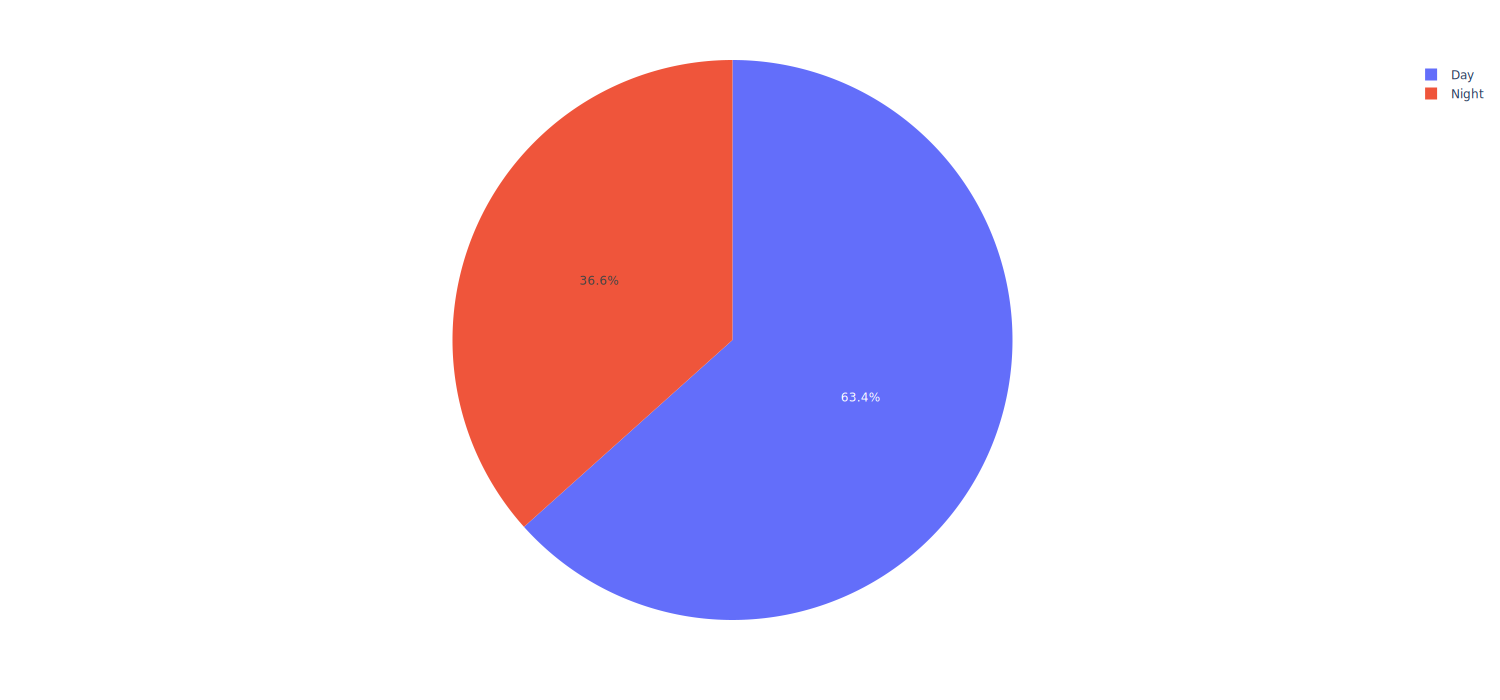

<Figure size 720x576 with 0 Axes>

In [193]:
#Death based on tim of the day

nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_Time = nsw.groupby(['Time of day'])['Number Fatalities'].sum()
print(nsw_grouped_by_Time)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nsw_grouped_by_Time,values='Number Fatalities',names=nsw_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")

**Determine how many people died in each day of the week**

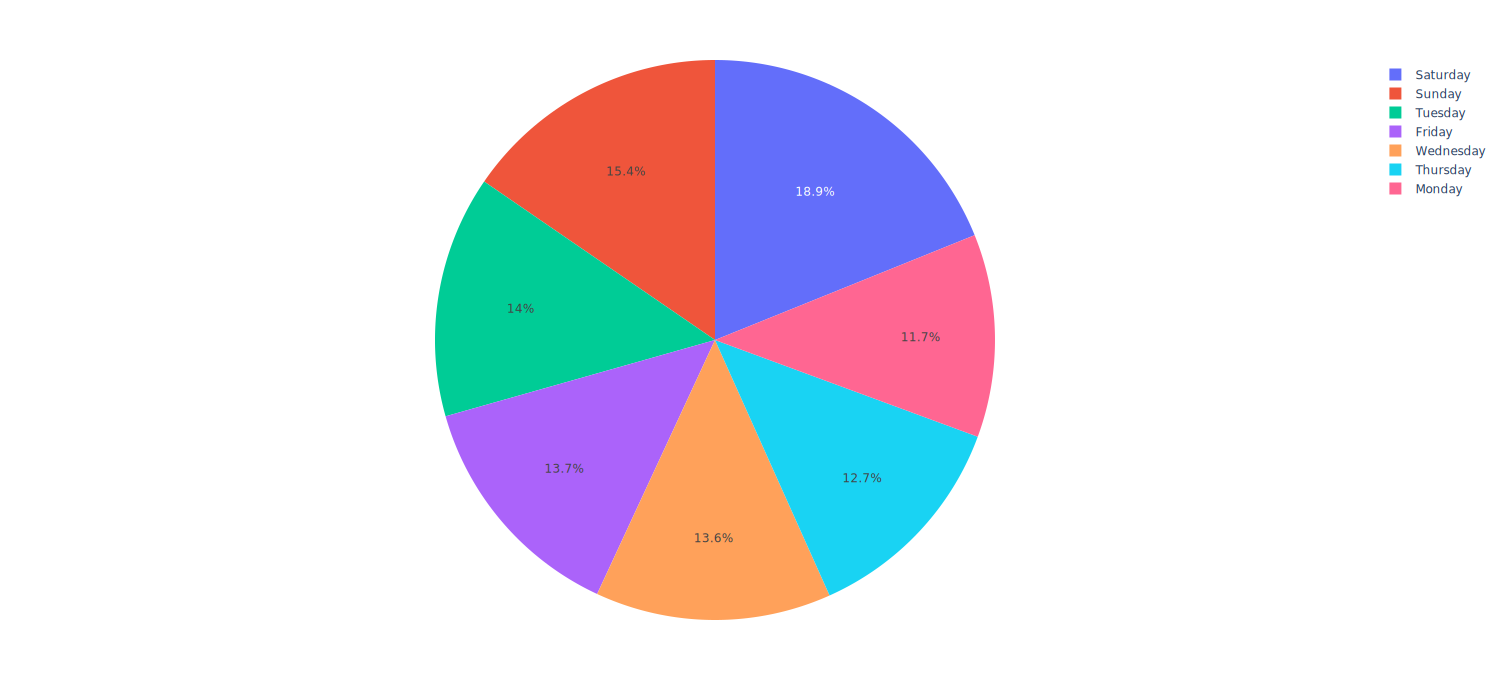

<Figure size 720x576 with 0 Axes>

In [194]:
nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_Day = nsw.groupby(['Dayweek'])['Number Fatalities'].sum()
nsw_grouped_by_Day


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nsw_grouped_by_Day,values='Number Fatalities',names=nsw_grouped_by_Day.index, width= 1500, height= 700)
fig.show("svg")


**Categorize the casualties based on what they were doing when the crash happened and plot it**

Road User
Cyclist                           71
Driver                          1378
Motorcycle pillion passenger      19
Motorcycle rider                 454
Passenger                        586
Pedestrian                       435
Name: Number Fatalities, dtype: int64


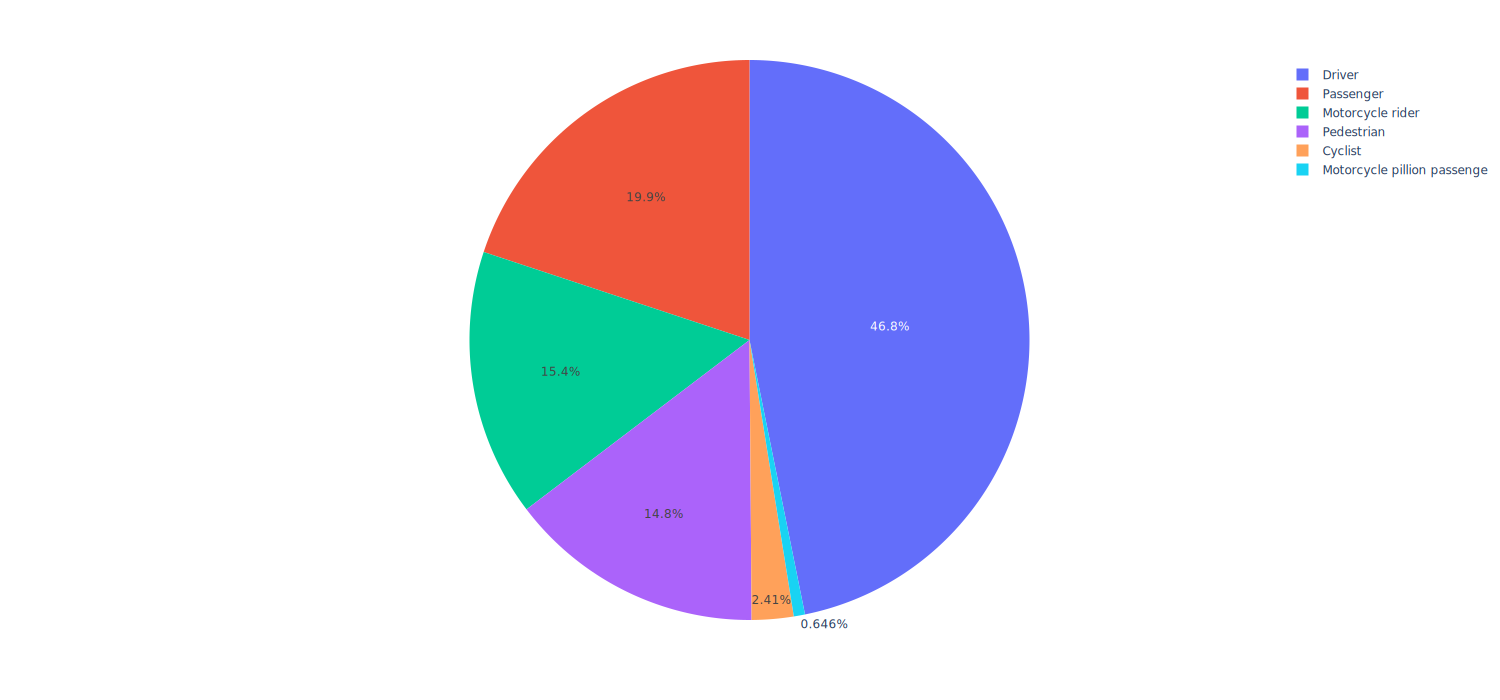

<Figure size 720x576 with 0 Axes>

In [195]:
nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_RoadUser = nsw.groupby(['Road User'])['Number Fatalities'].sum()
print(nsw_grouped_by_RoadUser)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame = nsw_grouped_by_RoadUser,values='Number Fatalities',names=nsw_grouped_by_RoadUser.index, width= 1500, height= 700)
fig.show("svg")

**What age group were they?**

Age Group
0_to_16        173
17_to_25       578
26_to_39       559
40_to_64       896
65_to_74       333
75_or_older    404
Name: Number Fatalities, dtype: int64


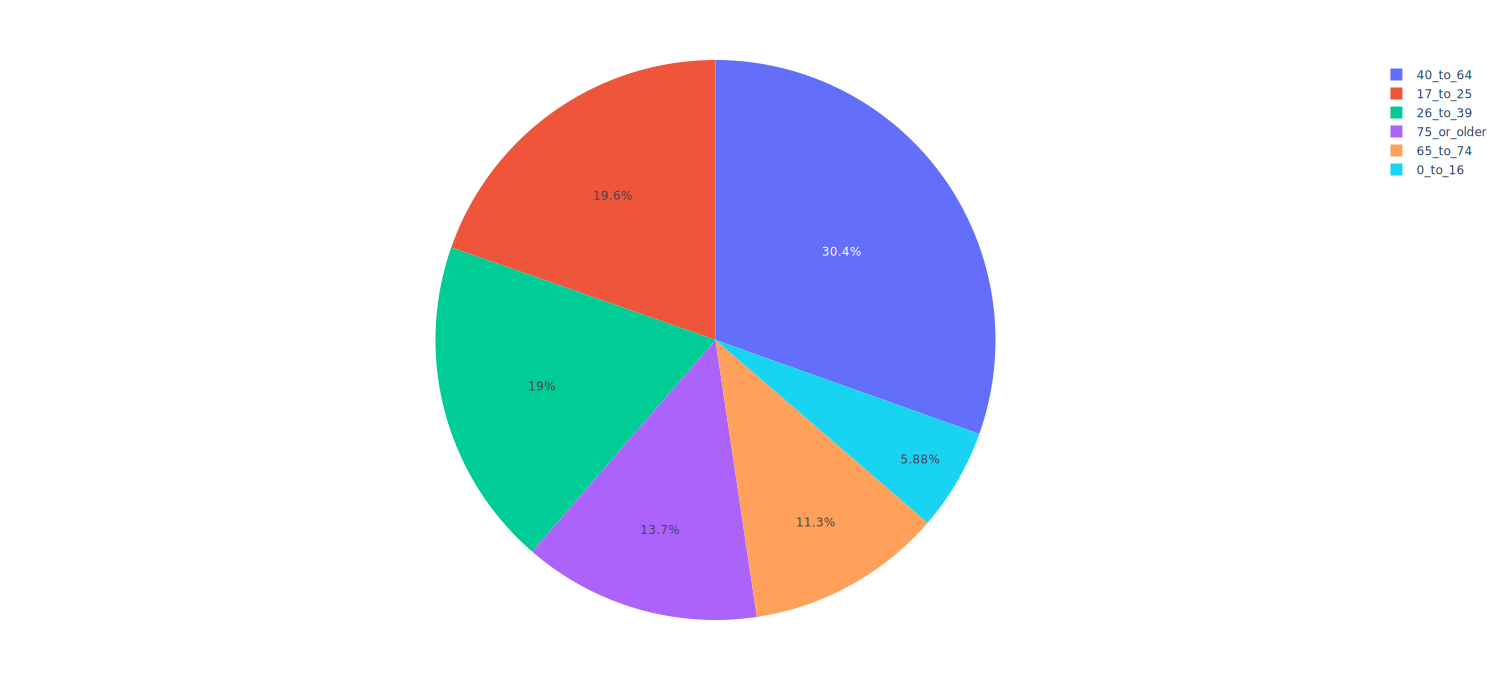

In [196]:

nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_AgeGroup = nsw.groupby(['Age Group'])['Number Fatalities'].sum()
print(nsw_grouped_by_AgeGroup)


fig = px.pie(data_frame=nsw_grouped_by_AgeGroup,values='Number Fatalities',names=nsw_grouped_by_AgeGroup.index, width= 1500, height= 700)
fig.show("svg")

In [197]:
nsw = complete_data_sub[complete_data_sub['State'] == 'NSW']  
nsw_grouped_by_Age = nsw.groupby(['Year', 'Gender','Age Group', 'Road User', 'Dayweek', 'Time of day']).sum()
nsw_grouped_by_Age.groupby

<bound method DataFrame.groupby of                                                           Number Fatalities
Year Gender Age Group   Road User  Dayweek   Time of day                   
2015 Female 0_to_16     Passenger  Friday    Day                          1
                                   Monday    Night                        2
                                   Saturday  Day                          5
                                   Thursday  Day                          3
                                   Wednesday Day                          1
...                                                                     ...
2022 Male   75_or_older Pedestrian Friday    Day                          1
                                   Saturday  Day                          1
                                   Sunday    Day                          2
                                   Thursday  Day                          1
                                   Tuesday   Day     

<h2><center>VICTORIA</center></h2>

**What is the total death in Victoria?**

In [198]:
complete_data[complete_data["State"] == "Vic"]["Number Fatalities"].sum()

1732

In [199]:
complete_data_sub.State.unique()

array(['NSW', 'Qld', 'SA', 'NT', 'Tas', 'Vic', 'ACT', 'WA'], dtype=object)

**How many people died each year? and Plot the result**

      Number Fatalities
Year                   
2015                301
2017                299
2018                236
2019                295
2020                232
2021                261
2022                108


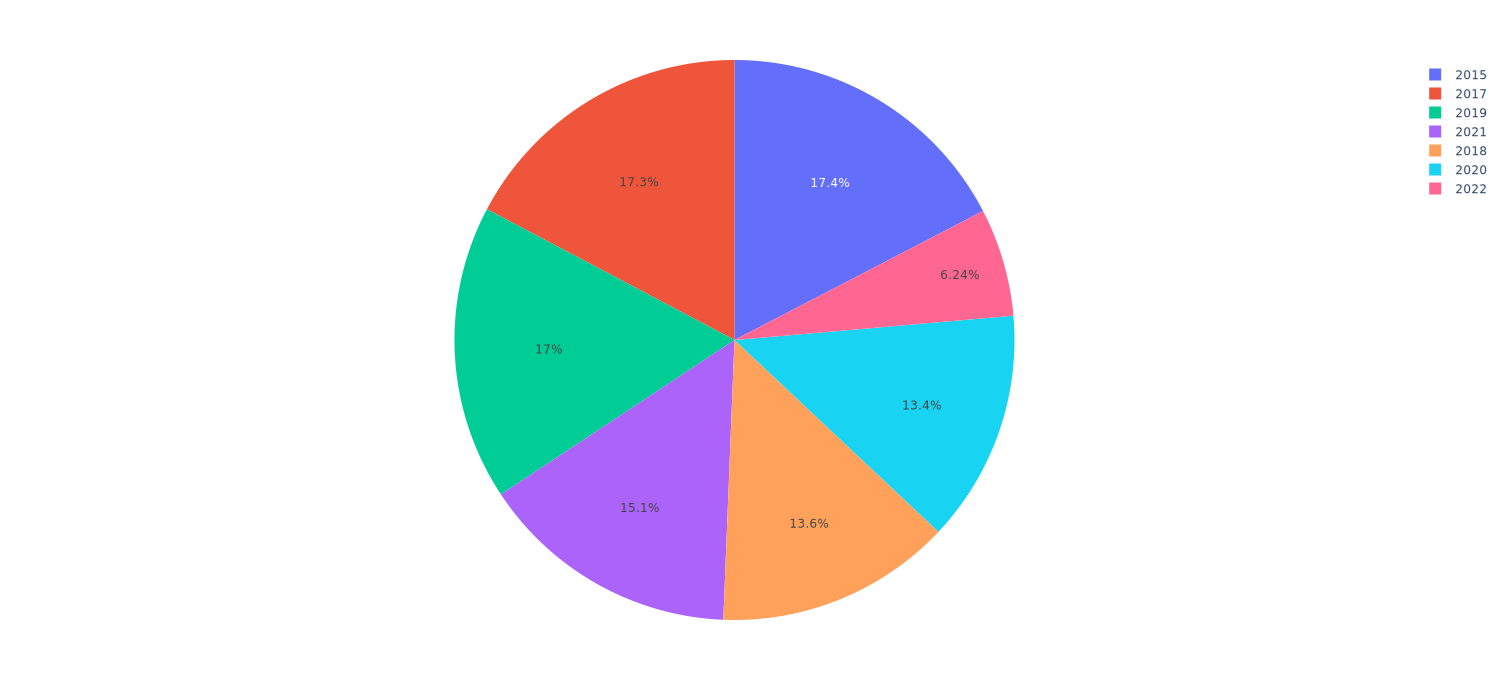

<Figure size 720x576 with 0 Axes>

In [200]:
vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_year = vic.groupby(['Year']).sum()
print(vic_grouped_by_year)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=vic_grouped_by_year,values='Number Fatalities',names=vic_grouped_by_year.index, width= 1500, height= 700)
fig.show("svg")

**Determine the number of fatalities based on Gender for each year**

In [201]:
vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_year = act.groupby(['Year', 'Gender']).sum()
vic_grouped_by_year



Number Fatalities
Year Gender                   
2015 Female                  4
     Male                   13
2016 Female                  3
     Male                    7
2017 Male                    4
2018 Female                  2
     Male                    5
2019 Female                  1
     Male                    4
2020 Female                  1
     Male                    6
2021 Female                  1
     Male                    4
2022 Female                  3
     Male                    6

**How many Male and Female Died? and show the percentile** 

Gender
Female     504
Male      1228
Name: Number Fatalities, dtype: int64


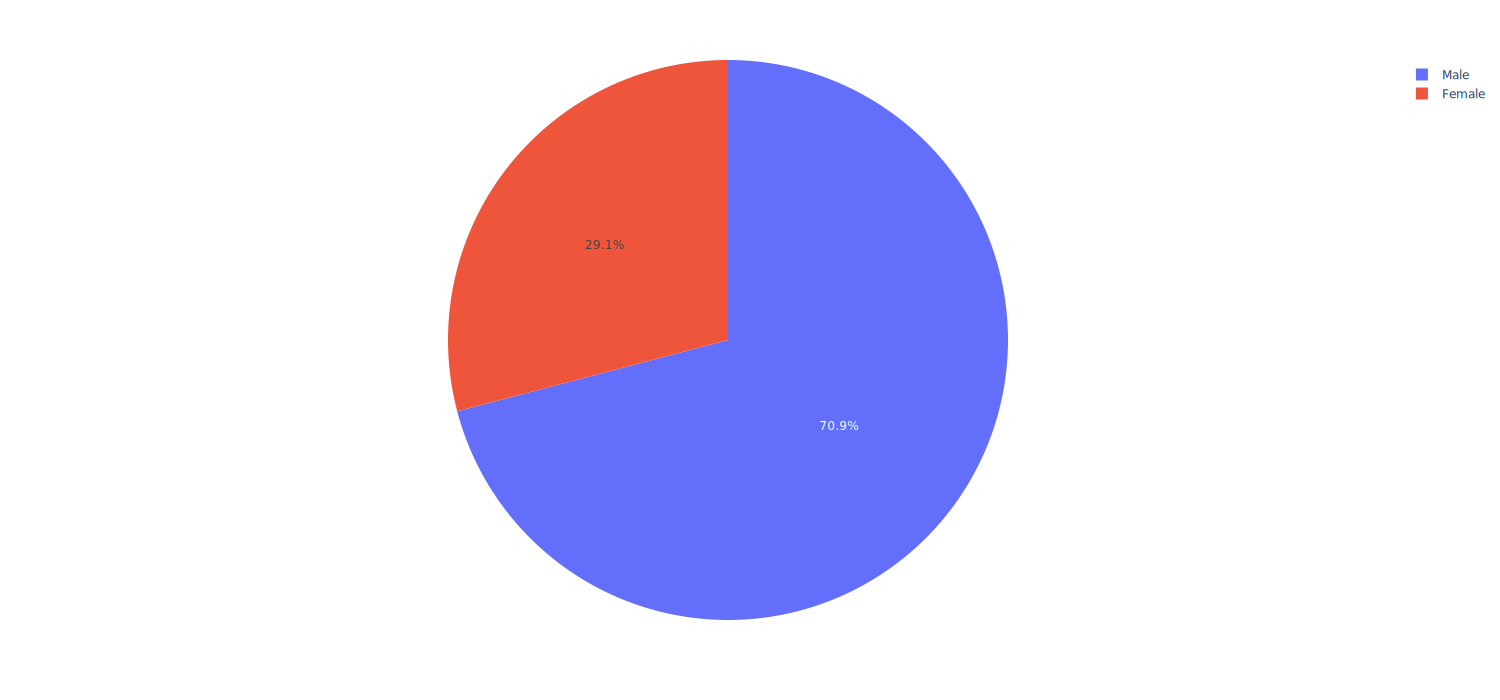

<Figure size 720x576 with 0 Axes>

In [202]:


vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_Gender = vic.groupby(['Gender'])['Number Fatalities'].sum()
print(vic_grouped_by_Gender)



plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=vic_grouped_by_Gender,values='Number Fatalities',names=vic_grouped_by_Gender.index, width= 1500, height= 700)
fig.show("svg")

 **Determine whether the crash/death happened on a weekday or weekend**

Day of week
Weekday    1066
Weekend     666
Name: Number Fatalities, dtype: int64


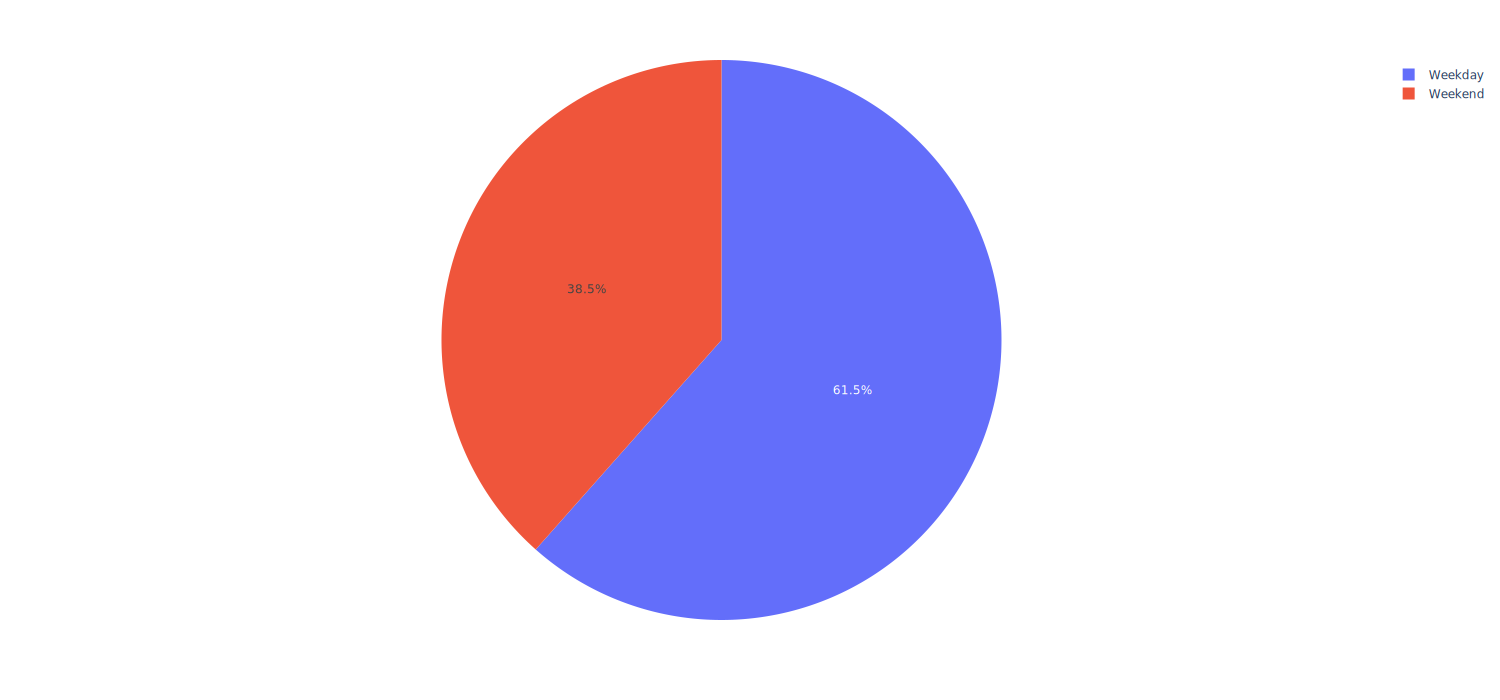

<Figure size 720x576 with 0 Axes>

In [203]:
vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_DayOfWeek = vic.groupby(['Day of week'])['Number Fatalities'].sum()
print(vic_grouped_by_DayOfWeek)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=vic_grouped_by_DayOfWeek,values='Number Fatalities',names=vic_grouped_by_DayOfWeek.index, width= 1500, height= 700)
fig.show("svg")


Time of day
Day      1084
Night     648
Name: Number Fatalities, dtype: int64


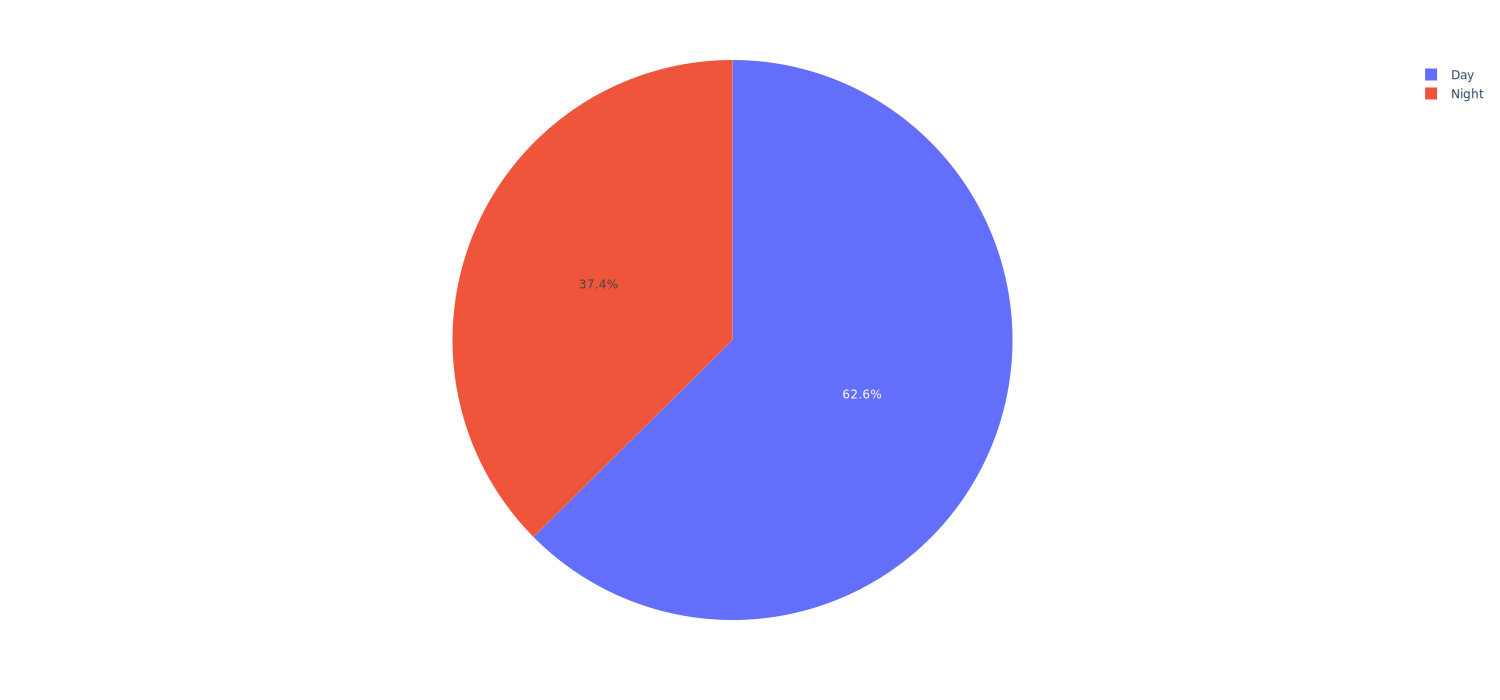

<Figure size 720x576 with 0 Axes>

In [204]:
#Death based on time of the day

vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_Time = vic.groupby(['Time of day'])['Number Fatalities'].sum()
print(vic_grouped_by_Time)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=vic_grouped_by_Time,values='Number Fatalities',names=vic_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")

 **Determine how many people died in each day of the week**

Dayweek
Friday       270
Monday       214
Saturday     295
Sunday       283
Thursday     255
Tuesday      189
Wednesday    226
Name: Number Fatalities, dtype: int64


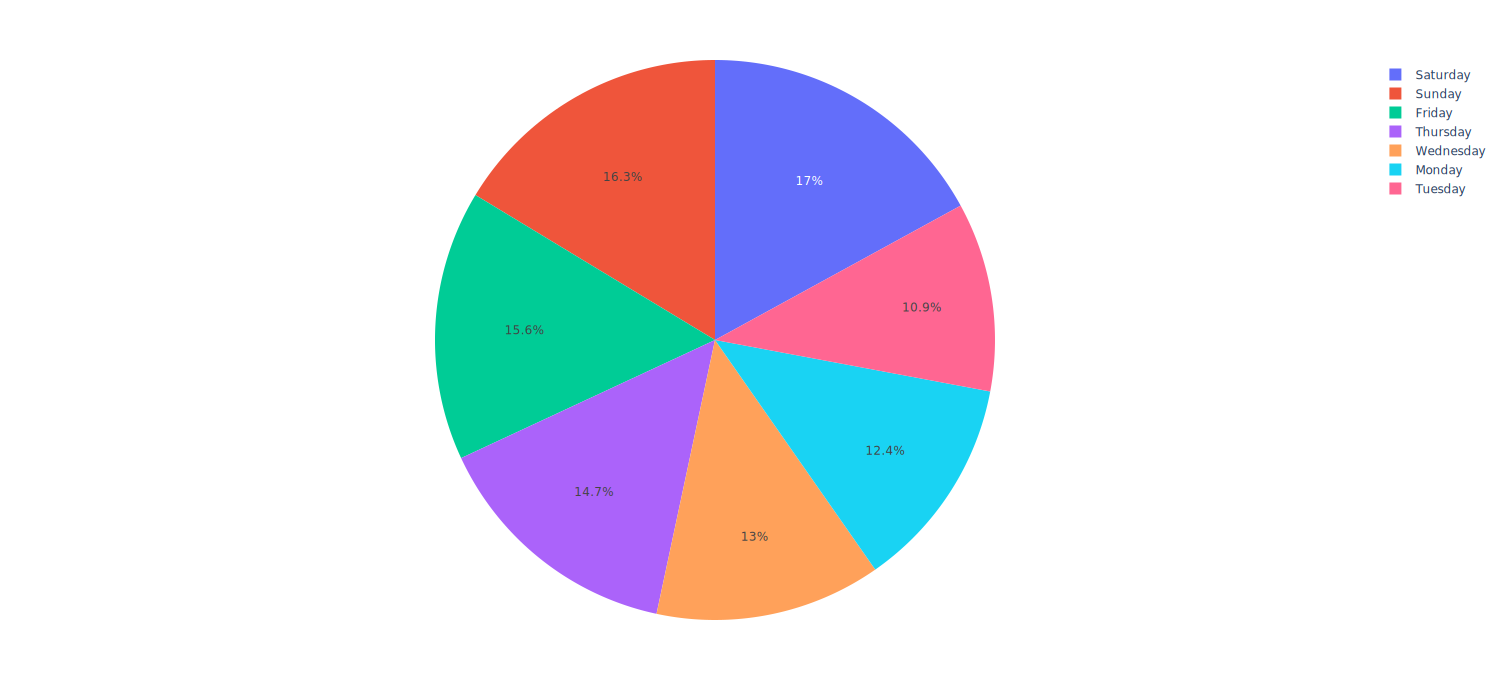

<Figure size 720x576 with 0 Axes>

In [205]:
vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_Day = vic.groupby(['Dayweek'])['Number Fatalities'].sum()

print(vic_grouped_by_Day)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=vic_grouped_by_Day,values='Number Fatalities',names=vic_grouped_by_Day.index, width= 1500, height= 700)
fig.show("svg")

**Categorize the casualties based on what they were doing when the crash happened and plot it**

Road User
Cyclist                          67
Driver                          809
Motorcycle pillion passenger      5
Motorcycle rider                245
Other/-9                         17
Passenger                       373
Pedestrian                      216
Name: Number Fatalities, dtype: int64


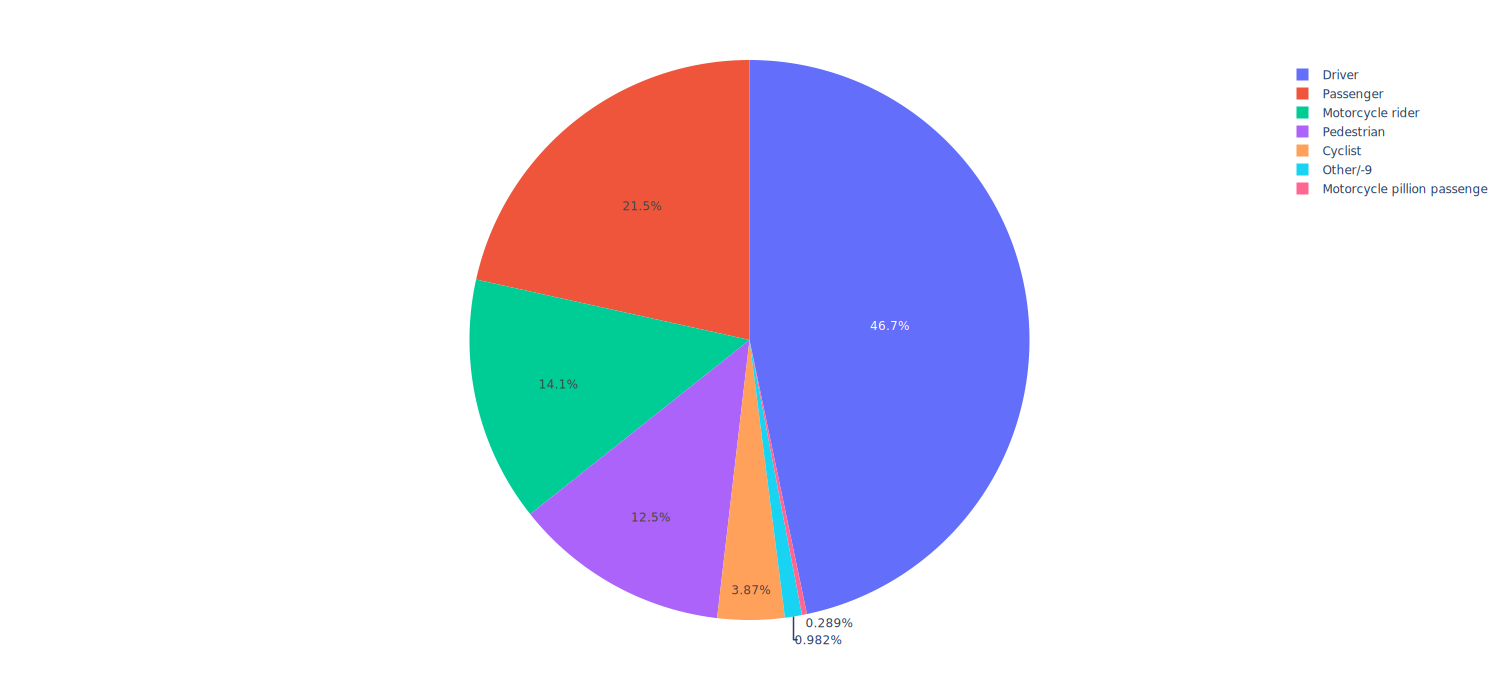

<Figure size 720x576 with 0 Axes>

In [206]:
vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_RoadUser = vic.groupby(['Road User'])['Number Fatalities'].sum()

print(vic_grouped_by_RoadUser)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=vic_grouped_by_RoadUser,values='Number Fatalities',names=vic_grouped_by_RoadUser.index, width= 1500, height= 700)
fig.show("svg")

**What age group were they?**

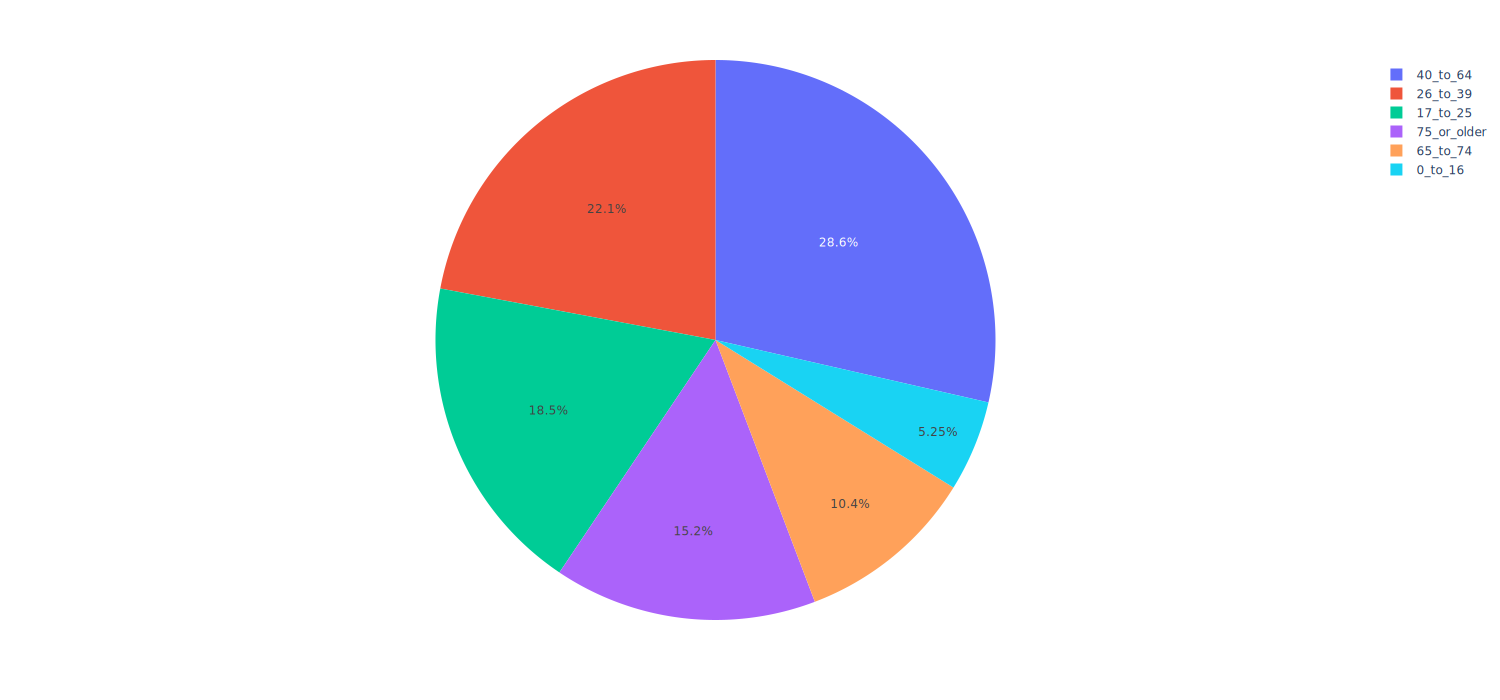

In [207]:
vic = complete_data_sub[complete_data_sub['State'] == 'Vic']  
vic_grouped_by_AgeGroup = vic.groupby(['Age Group'])['Number Fatalities'].sum()
vic_grouped_by_AgeGroup




fig = px.pie(data_frame=vic_grouped_by_AgeGroup,values='Number Fatalities',names=vic_grouped_by_AgeGroup.index, width= 1500, height= 700)
fig.show("svg")


<h2><center>QUEENSLAND</center></h2>

**How many people died in QLD in total?**

In [208]:
complete_data[complete_data["State"] == "Qld"]["Number Fatalities"].sum()

1469

In [209]:
complete_data_sub.State.unique()

array(['NSW', 'Qld', 'SA', 'NT', 'Tas', 'Vic', 'ACT', 'WA'], dtype=object)

**How many people died in Qld each year?**

      Number Fatalities
Year                   
2018                288
2019                273
2020                348
2021                354
2022                206


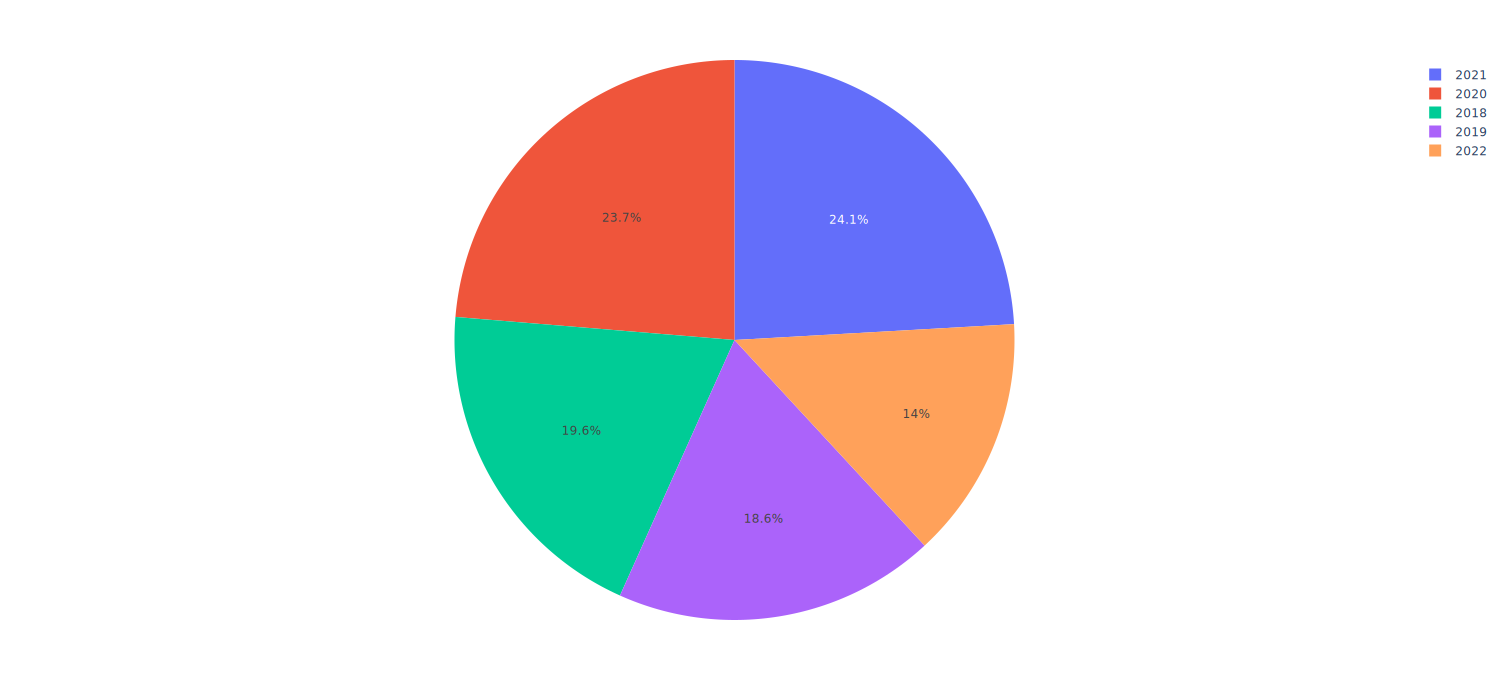

<Figure size 720x576 with 0 Axes>

In [210]:
qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
qld_grouped_by_year = qld.groupby(['Year']).sum()
print(qld_grouped_by_year)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=qld_grouped_by_year,values='Number Fatalities',names=qld_grouped_by_year.index, width= 1500, height= 700)
fig.show("svg")


**Determine the number of fatalities based on Gender for each year**

In [211]:
qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
qld_grouped_by_year = qld.groupby(['Year', 'Gender']).sum()
qld_grouped_by_year



Number Fatalities
Year Gender                   
2018 Female                 78
     Male                  210
2019 Female                 61
     Male                  212
2020 Female                107
     Male                  241
2021 Female                 98
     Male                  256
2022 Female                 52
     Male                  154


**How many Male and Female Died? and show the percentile** 

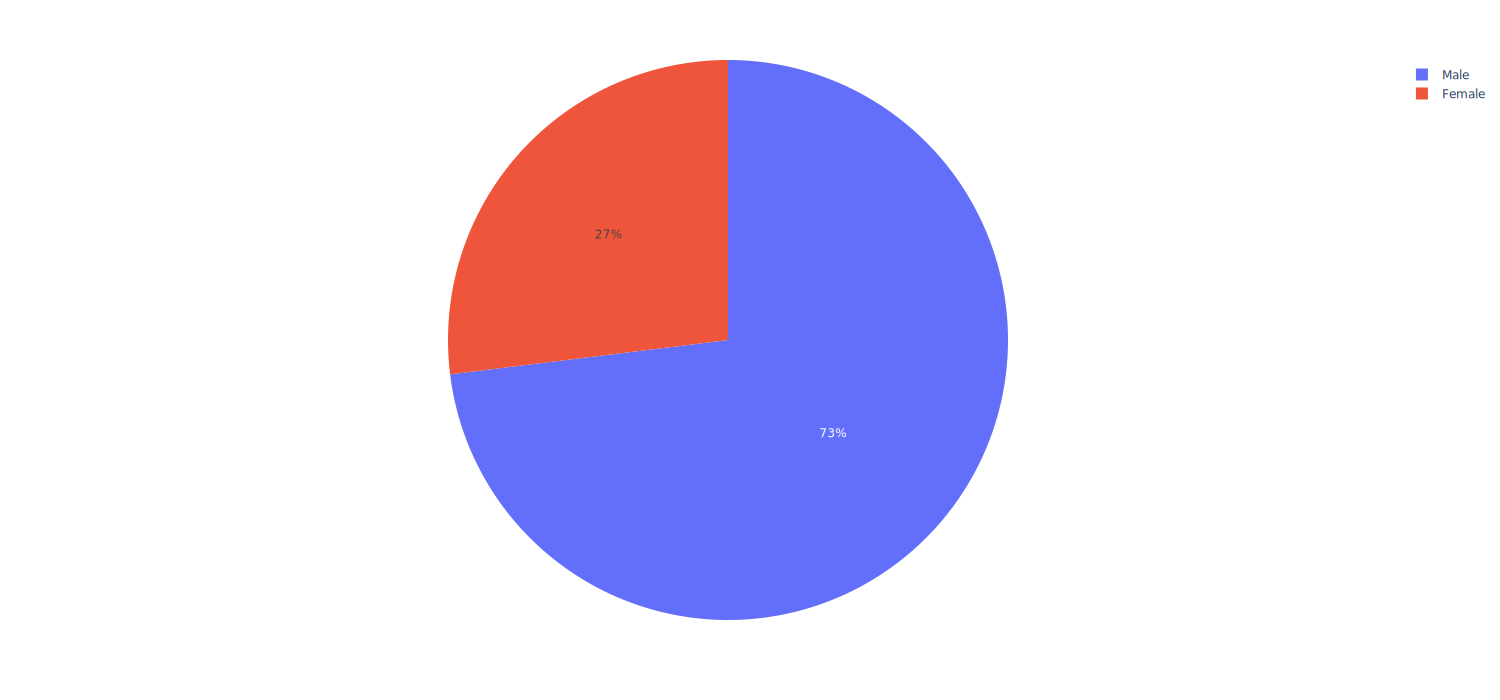

<Figure size 720x576 with 0 Axes>

In [212]:

qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
qld_grouped_by_Gender = qld.groupby(['Gender'])['Number Fatalities'].sum()
qld_grouped_by_Gender


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=qld_grouped_by_Gender,values='Number Fatalities',names=qld_grouped_by_Gender.index, width= 1500, height= 700)
fig.show("svg")

**When did the crash/death happen?**


Figure(720x576)


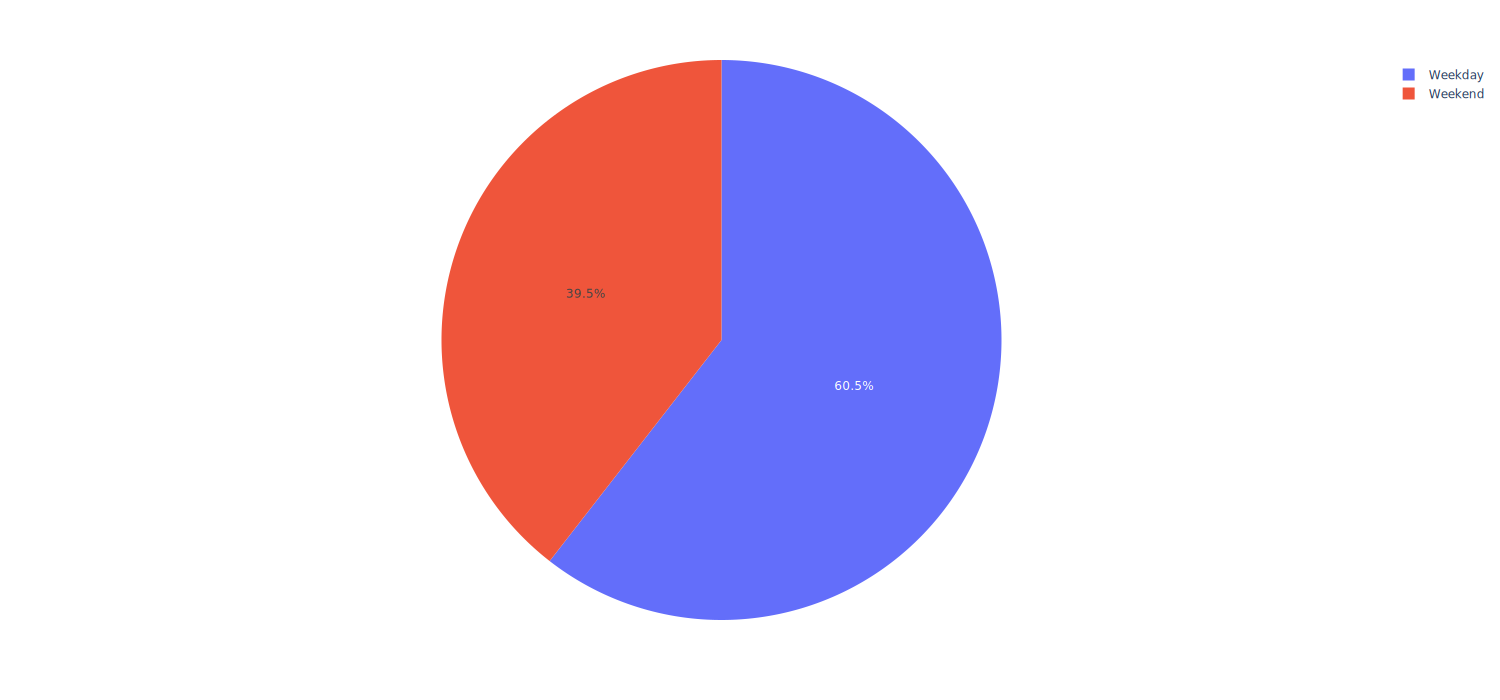

<Figure size 720x576 with 0 Axes>

In [213]:
Qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
Qld_grouped_by_DayOfWeek = Qld.groupby(['Day of week'])['Number Fatalities'].sum()
Qld_grouped_by_DayOfWeek

print(plt.figure(figsize=(10, 8)))


fig = px.pie(data_frame=Qld_grouped_by_DayOfWeek,values='Number Fatalities',names=Qld_grouped_by_DayOfWeek.index, width= 1500, height= 700)
fig.show("svg")

Time of day
Day      882
Night    587
Name: Number Fatalities, dtype: int64


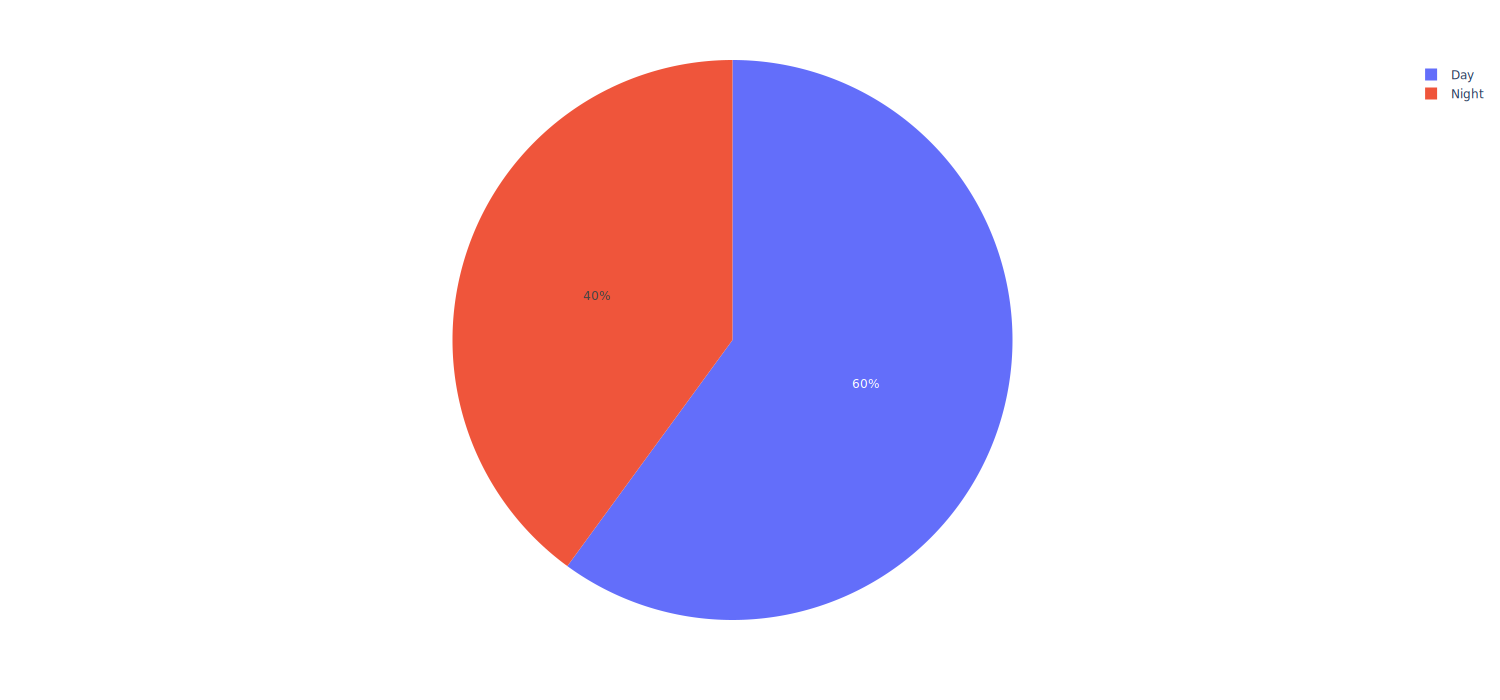

<Figure size 720x576 with 0 Axes>

In [214]:
#Death based on time of the day

Qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
Qld_grouped_by_Time = Qld.groupby(['Time of day'])['Number Fatalities'].sum()
print(Qld_grouped_by_Time)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=Qld_grouped_by_Time,values='Number Fatalities',names=Qld_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")

**Determine how many people died in each day of the week**

Dayweek
Friday       232
Monday       206
Saturday     205
Sunday       279
Thursday     184
Tuesday      180
Wednesday    183
Name: Number Fatalities, dtype: int64


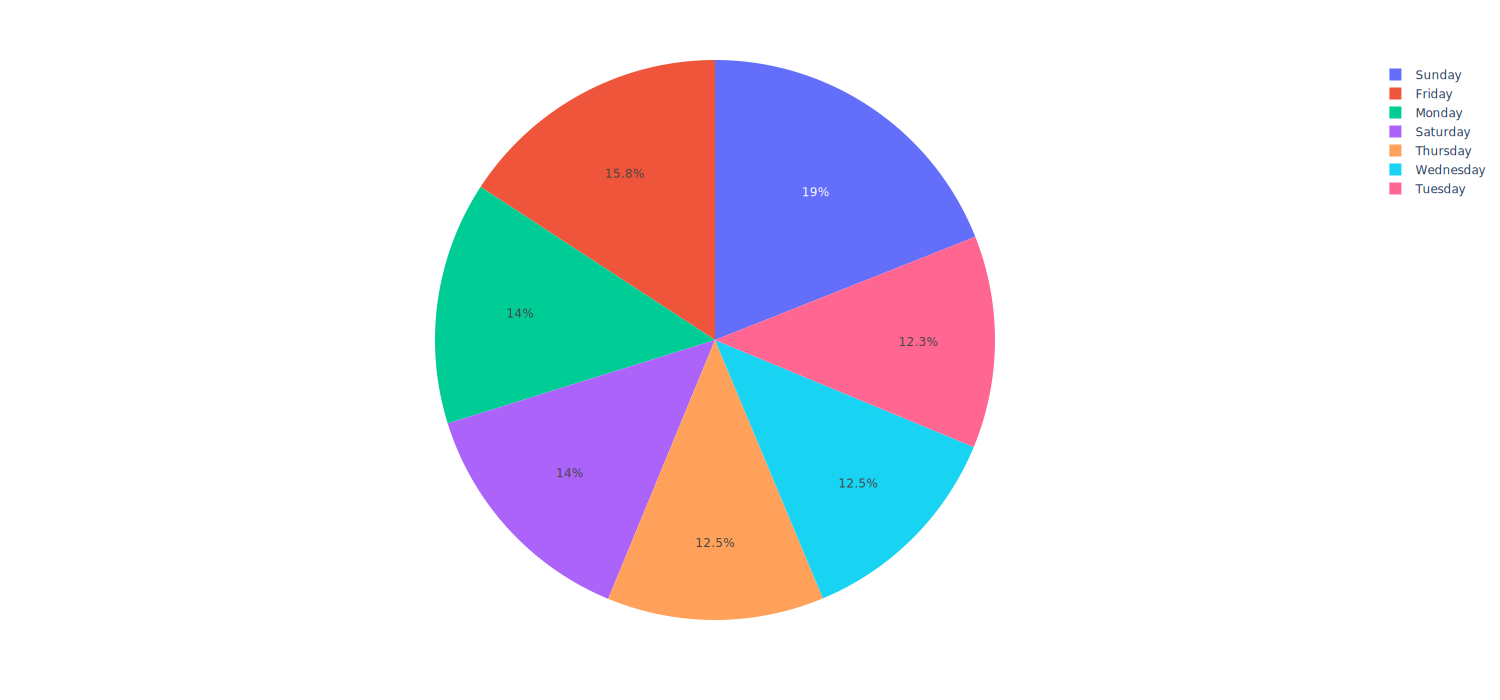

<Figure size 720x576 with 0 Axes>

In [215]:
Qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
Qld_grouped_by_Day = Qld.groupby(['Dayweek'])['Number Fatalities'].sum()
print(Qld_grouped_by_Day)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=Qld_grouped_by_Day,values='Number Fatalities',names=Qld_grouped_by_Day.index, width= 1500, height= 700)
fig.show("svg")

**Categorize the causalities based on what they were doing when the crash happened and plot it**

Road User
Cyclist                          29
Driver                          690
Motorcycle pillion passenger     15
Motorcycle rider                245
Other/-9                          1
Passenger                       355
Pedestrian                      134
Name: Number Fatalities, dtype: int64


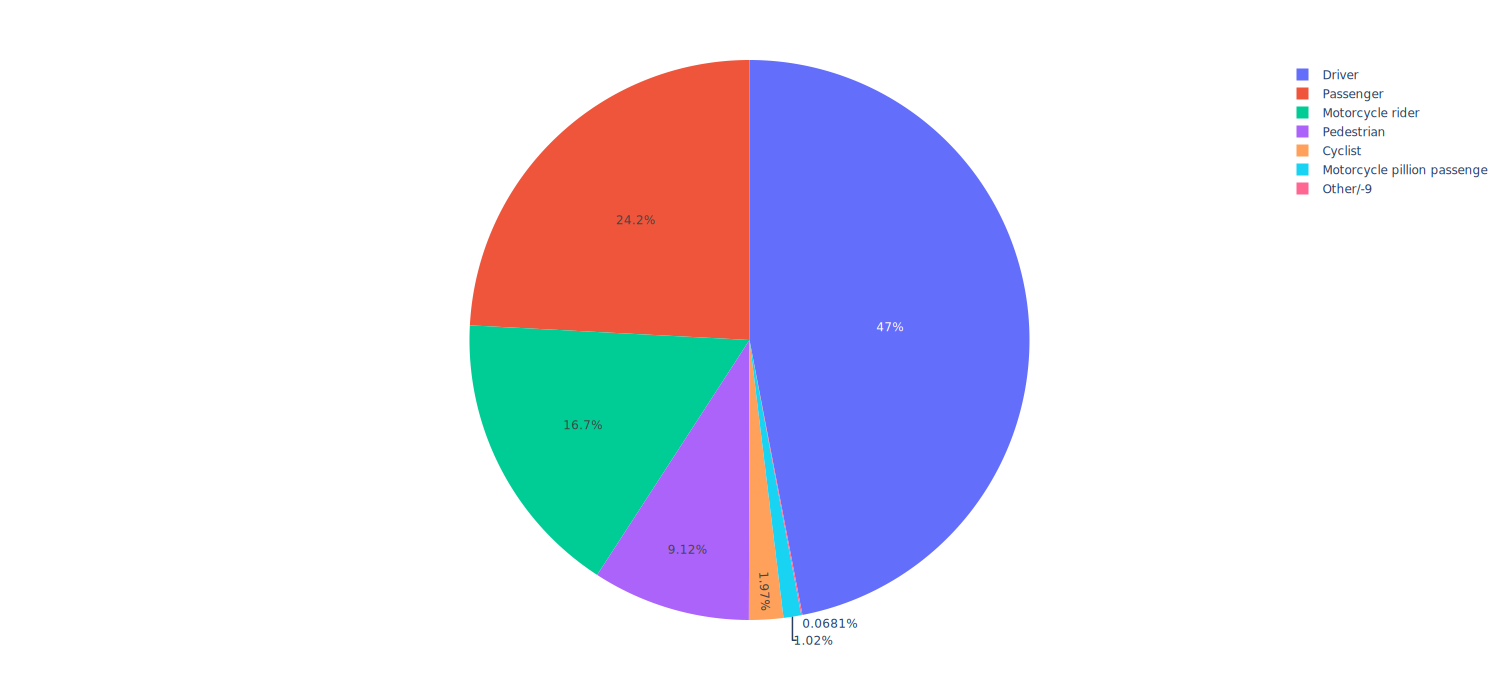

<Figure size 720x576 with 0 Axes>

In [216]:
Qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
Qld_grouped_by_RoadUser = Qld.groupby(['Road User'])['Number Fatalities'].sum()

print(Qld_grouped_by_RoadUser)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=Qld_grouped_by_RoadUser,values='Number Fatalities',names=Qld_grouped_by_RoadUser.index, width= 1500, height= 700)
fig.show("svg")

**What age group were they?**

Age Group
0_to_16        101
17_to_25       331
26_to_39       358
40_to_64       446
65_to_74       104
75_or_older    129
Name: Number Fatalities, dtype: int64


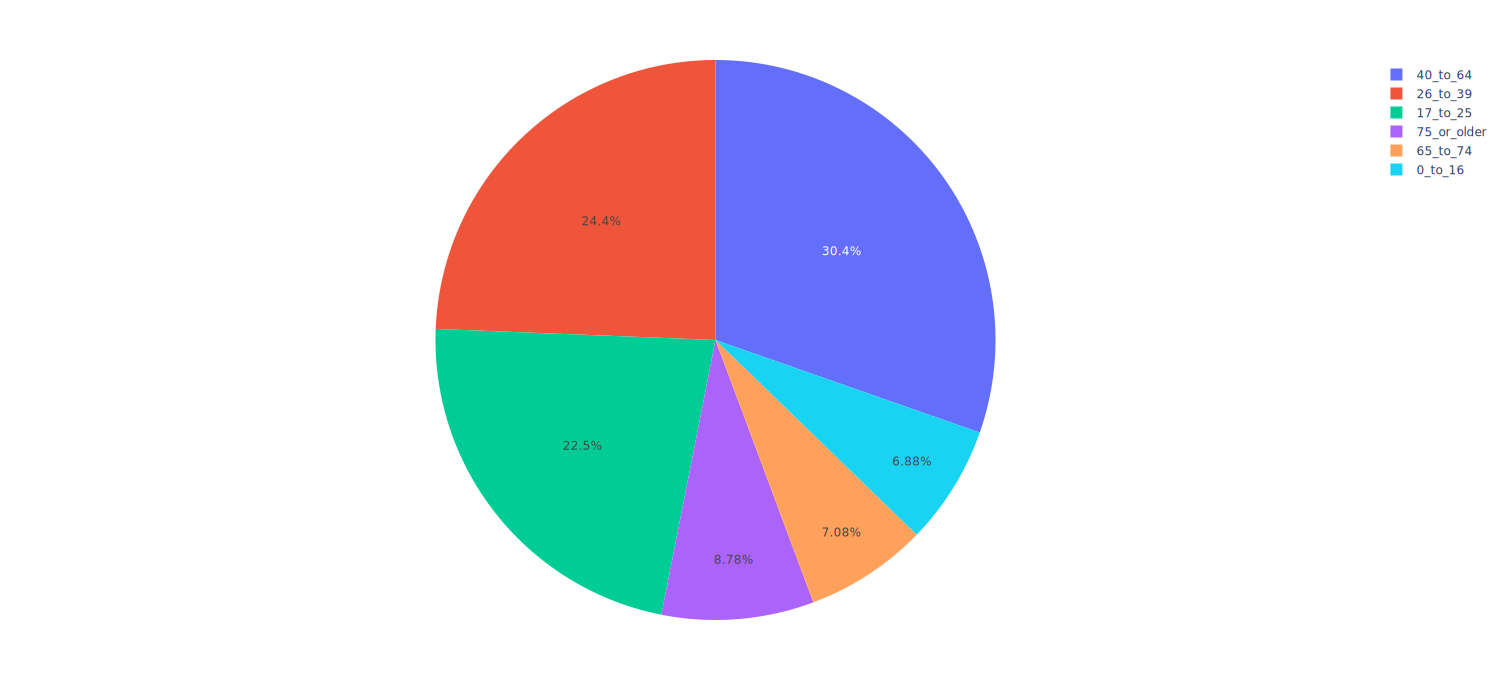

In [217]:
Qld = complete_data_sub[complete_data_sub['State'] == 'Qld']  
Qld_grouped_by_AgeGroup = Qld.groupby(['Age Group'])['Number Fatalities'].sum()

print(Qld_grouped_by_AgeGroup)




fig = px.pie(data_frame=Qld_grouped_by_AgeGroup,values='Number Fatalities',names=Qld_grouped_by_AgeGroup.index, width= 1500, height= 700)
fig.show("svg")

<h2><center>NORTHERN TERRITORY(NT)</center></h2>

**Total Death In NT**

In [218]:
complete_data[complete_data["State"] == "NT"]["Number Fatalities"].sum()

413

**How many people died in NT each year? and Plot the result**

      Number Fatalities
Year                   
2015                 65
2016                 51
2017                 39
2018                 74
2019                 66
2020                 37
2021                 43
2022                 38


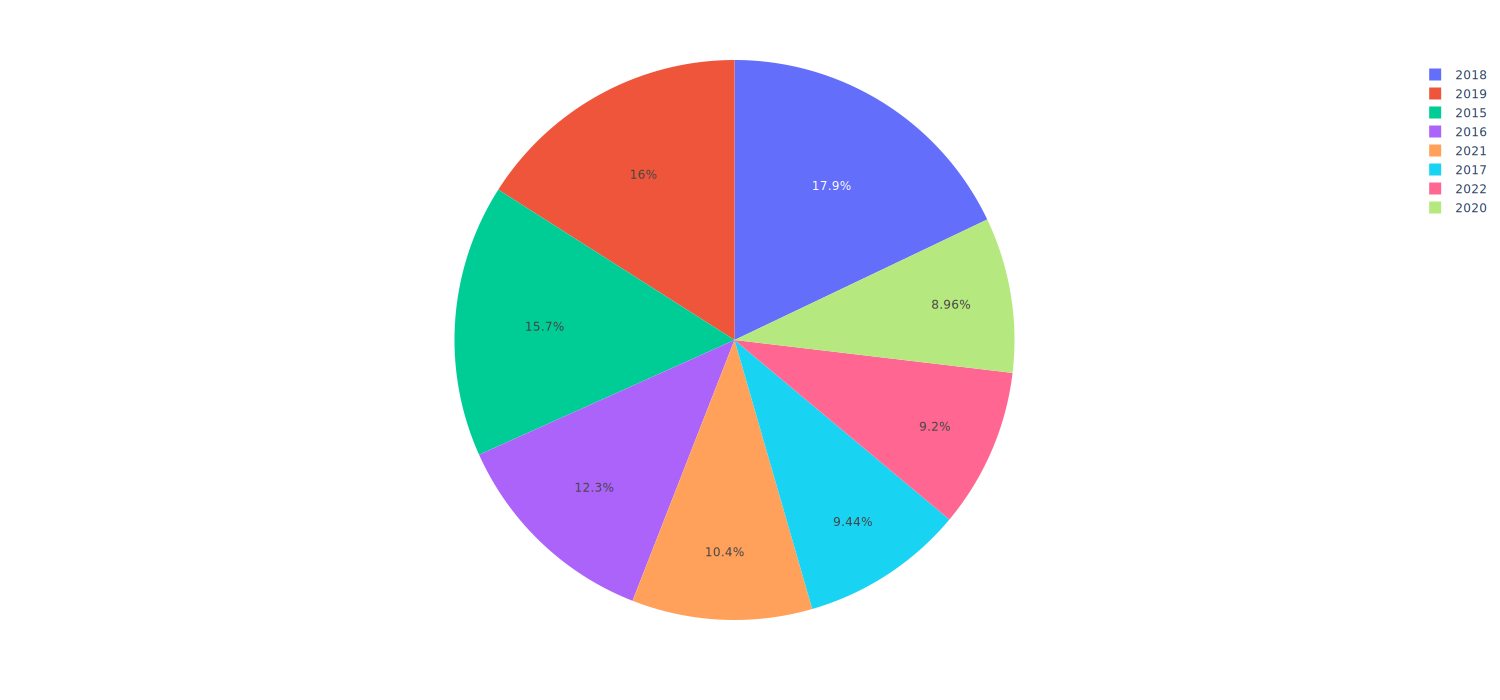

<Figure size 720x576 with 0 Axes>

In [219]:
nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_year = nt.groupby(['Year']).sum()

print(nt_grouped_by_year)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nt_grouped_by_year,values='Number Fatalities',names=nt_grouped_by_year.index, width= 1500, height= 700)

fig.show("svg")


**Determine the number of death in NT based on Gender for each year**

In [220]:

nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_year = nt.groupby(['Year', 'Gender']).sum()
nt_grouped_by_year

Number Fatalities
Year Gender                   
2015 Female                 17
     Male                   48
2016 Female                 13
     Male                   38
2017 Female                 10
     Male                   29
2018 Female                 32
     Male                   42
2019 Female                 10
     Male                   56
2020 Female                 11
     Male                   26
2021 Female                 15
     Male                   28
2022 Female                  5
     Male                   33

**How many Male and Female Died? and show the percentile** 

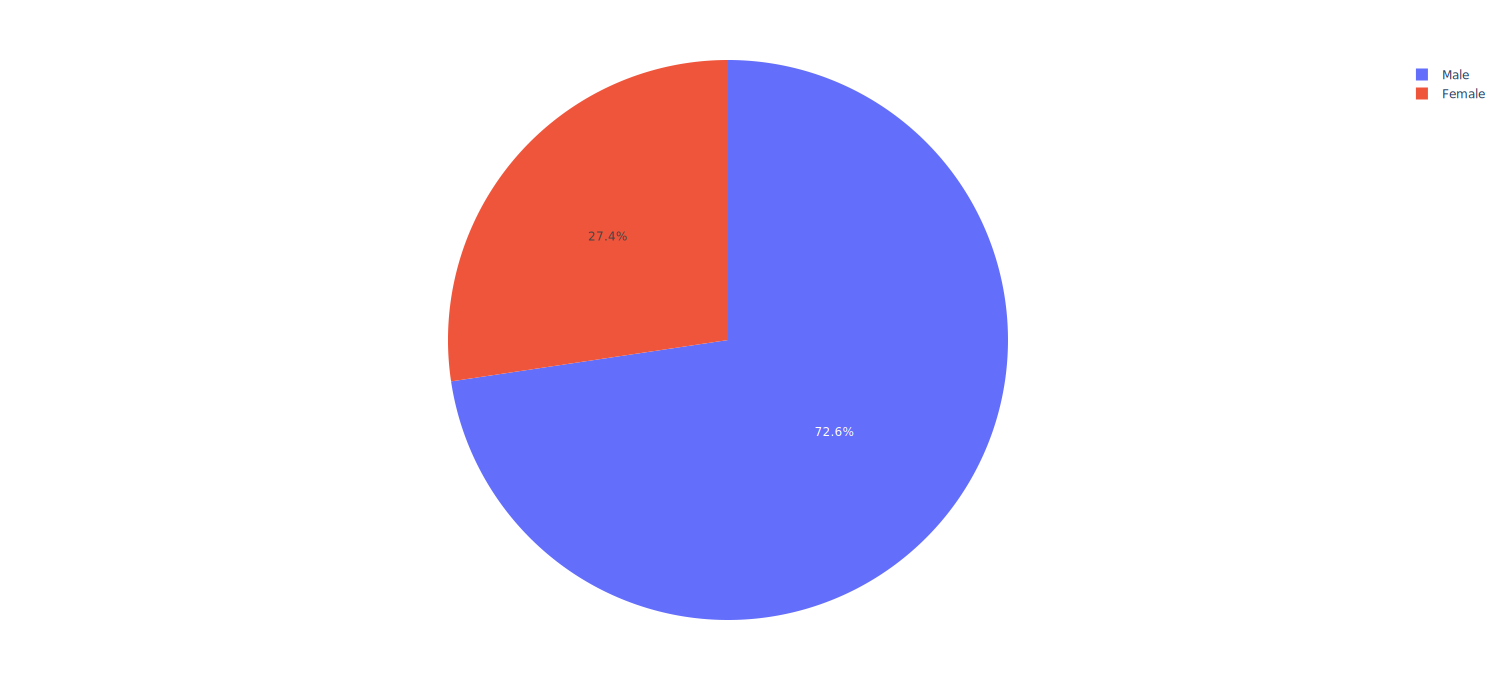

<Figure size 720x576 with 0 Axes>

In [221]:


nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_Gender = nt.groupby(['Gender'])['Number Fatalities'].sum()
nt_grouped_by_Gender


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nt_grouped_by_Gender,values='Number Fatalities',names=nt_grouped_by_Gender.index, width= 1500, height= 700)
fig.show("svg")


4. **When did the crash/death happen?**


Day of week
Weekday    228
Weekend    185
Name: Number Fatalities, dtype: int64


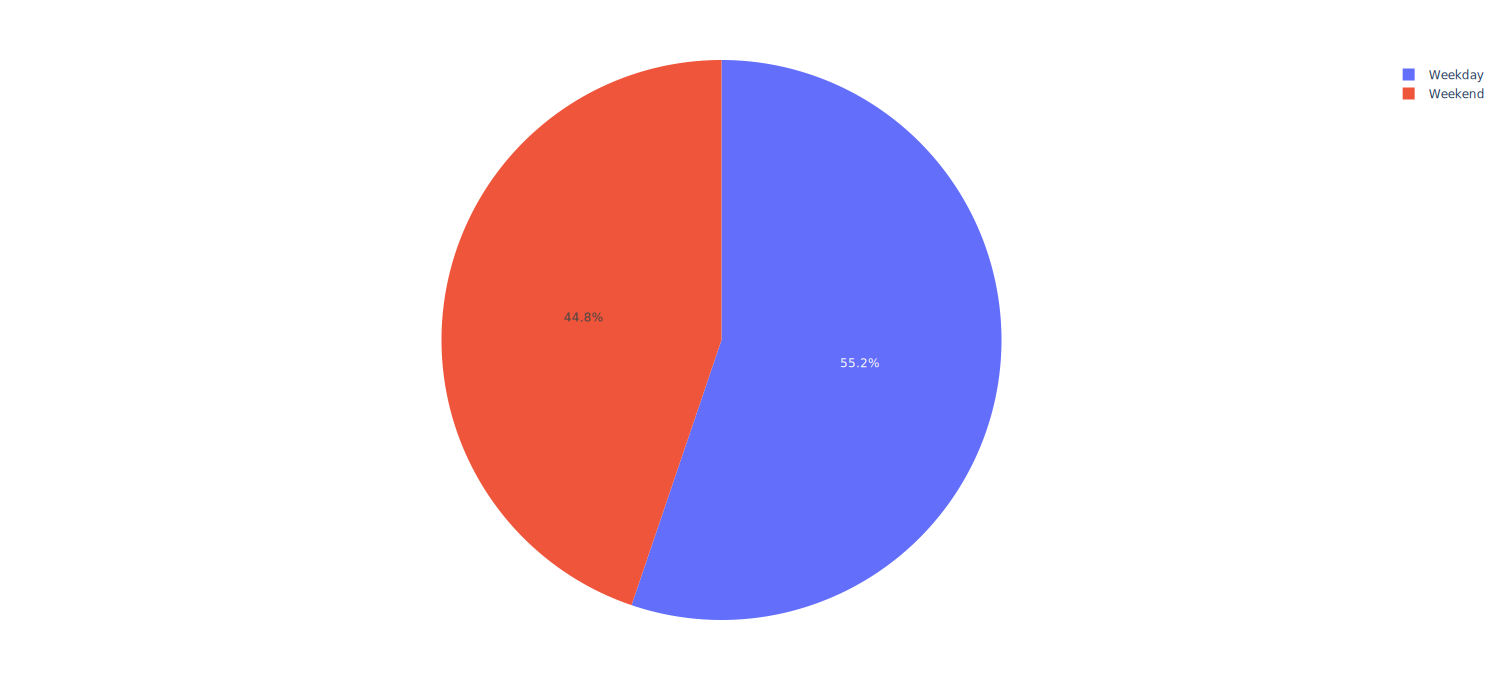

<Figure size 720x576 with 0 Axes>

In [222]:
#Death based on weekday vs weekend

nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_DayOfWeek = nt.groupby(['Day of week'])['Number Fatalities'].sum()
print(nt_grouped_by_DayOfWeek)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nt_grouped_by_DayOfWeek,values='Number Fatalities',names=nt_grouped_by_DayOfWeek.index, width= 1500, height= 700)

fig.show("svg")


Time of day
Day      169
Night    244
Name: Number Fatalities, dtype: int64


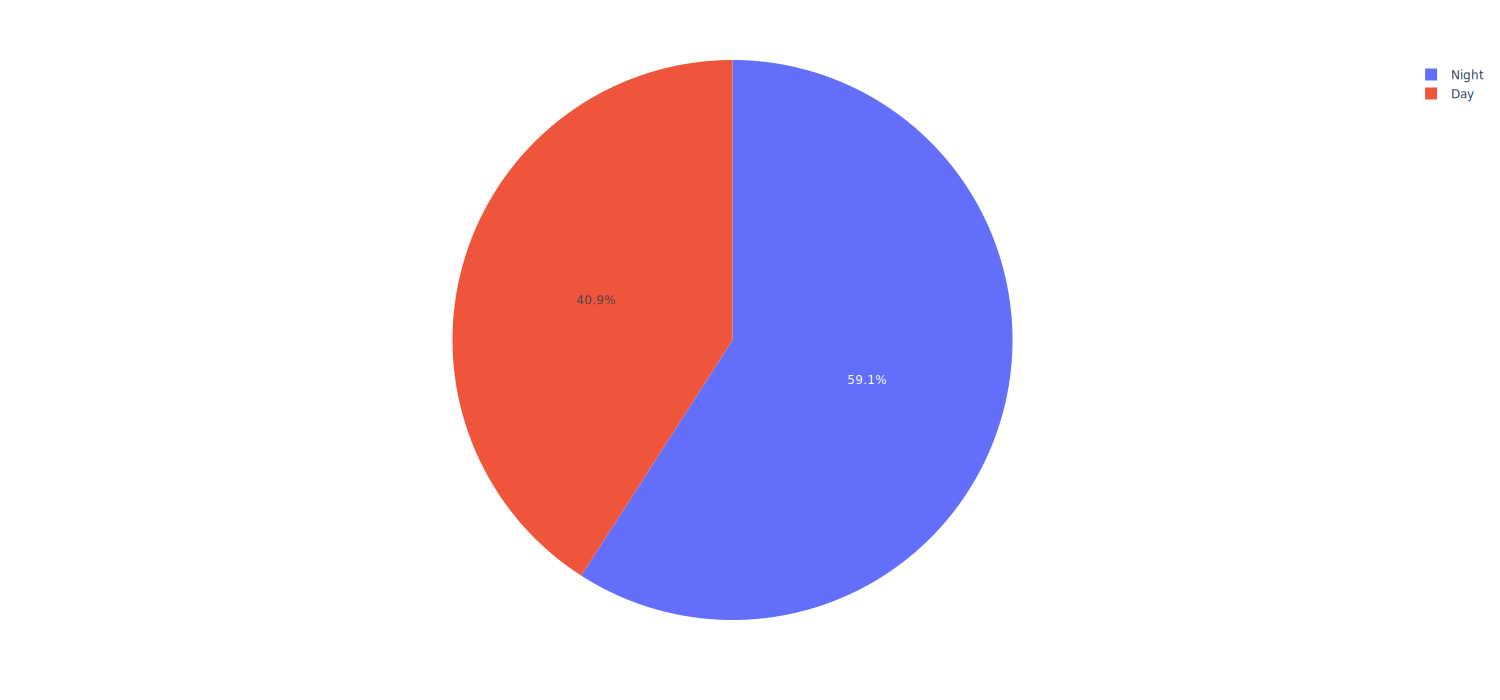

<Figure size 720x576 with 0 Axes>

In [225]:

#Death based on time of the day

nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_Time = nt.groupby(['Time of day'])['Number Fatalities'].sum()
print(nt_grouped_by_Time)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nt_grouped_by_Time,values='Number Fatalities',names=nt_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")


 **Determine how many people died in each day of the week**

Dayweek
Friday        61
Monday        48
Saturday     102
Sunday        44
Thursday      81
Tuesday       30
Wednesday     47
Name: Number Fatalities, dtype: int64


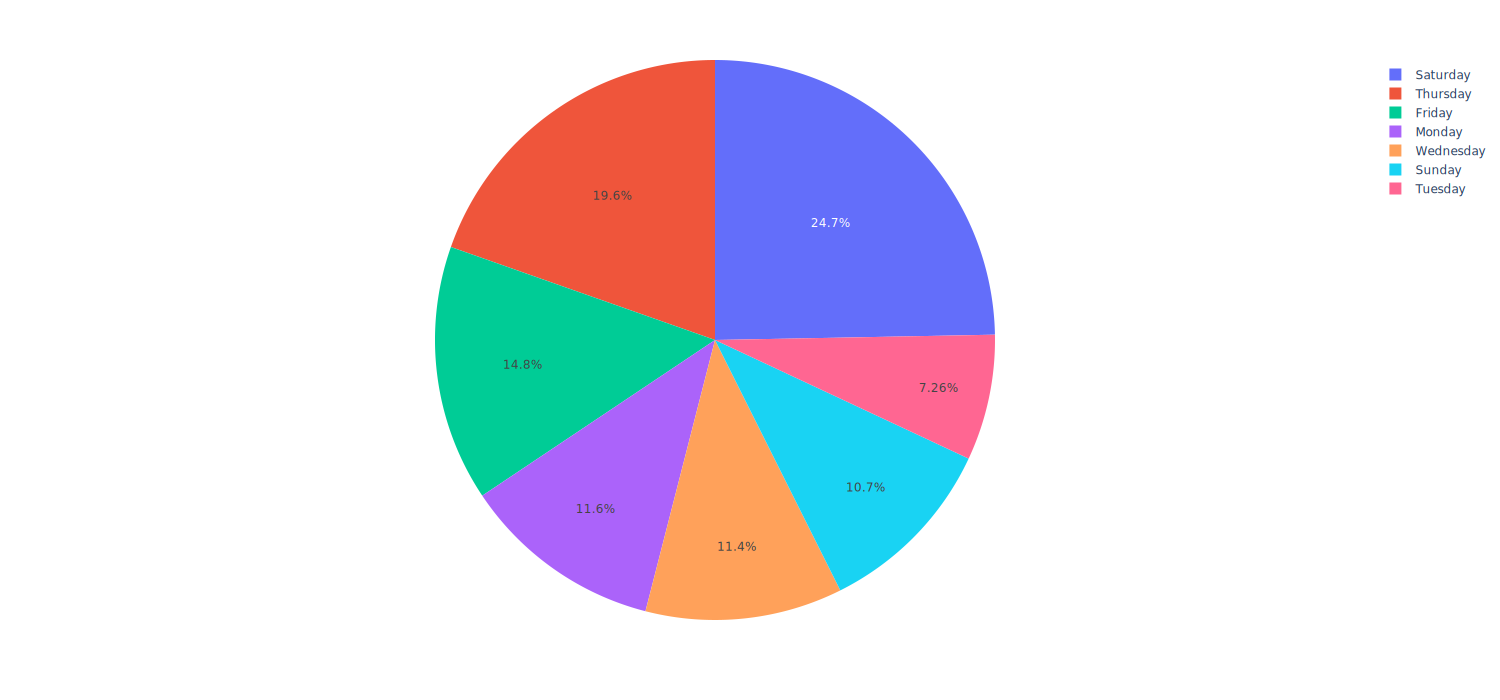

<Figure size 720x576 with 0 Axes>

In [226]:


nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_Day = nt.groupby(['Dayweek'])['Number Fatalities'].sum()
print(nt_grouped_by_Day)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nt_grouped_by_Day,values='Number Fatalities',names=nt_grouped_by_Day.index, width= 1500, height= 700)

fig.show("svg")


**Categorize the casualties based on what they were doing when the crash happened and plot it**

Road User
Cyclist               2
Driver              136
Motorcycle rider     34
Other/-9             22
Passenger           160
Pedestrian           59
Name: Number Fatalities, dtype: int64


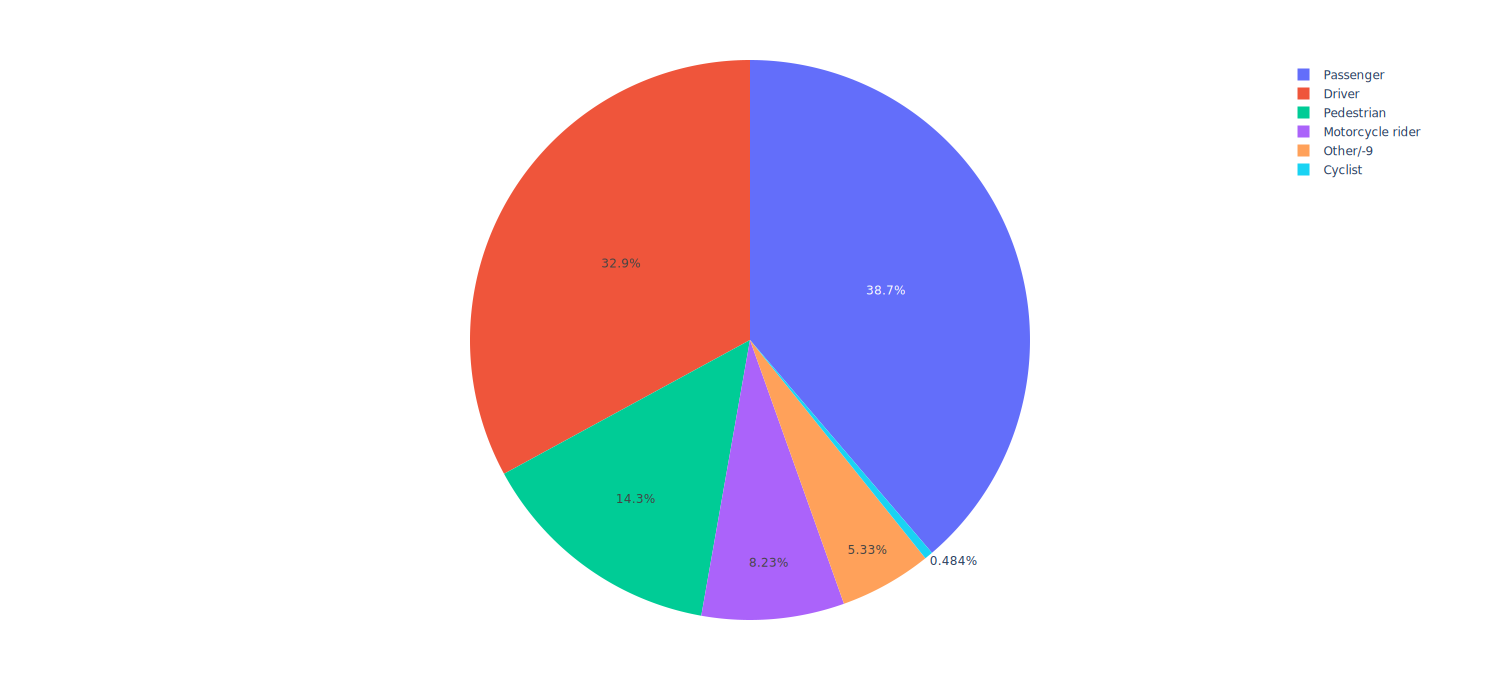

<Figure size 720x576 with 0 Axes>

In [227]:
nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_RoadUser = nt.groupby(['Road User'])['Number Fatalities'].sum()
print(nt_grouped_by_RoadUser)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=nt_grouped_by_RoadUser,values='Number Fatalities',names=nt_grouped_by_RoadUser.index, width= 1500, height= 700)

fig.show("svg")

**What age group were they?**

Age Group
0_to_16         27
17_to_25        83
26_to_39       166
40_to_64       117
65_to_74        17
75_or_older      3
Name: Number Fatalities, dtype: int64


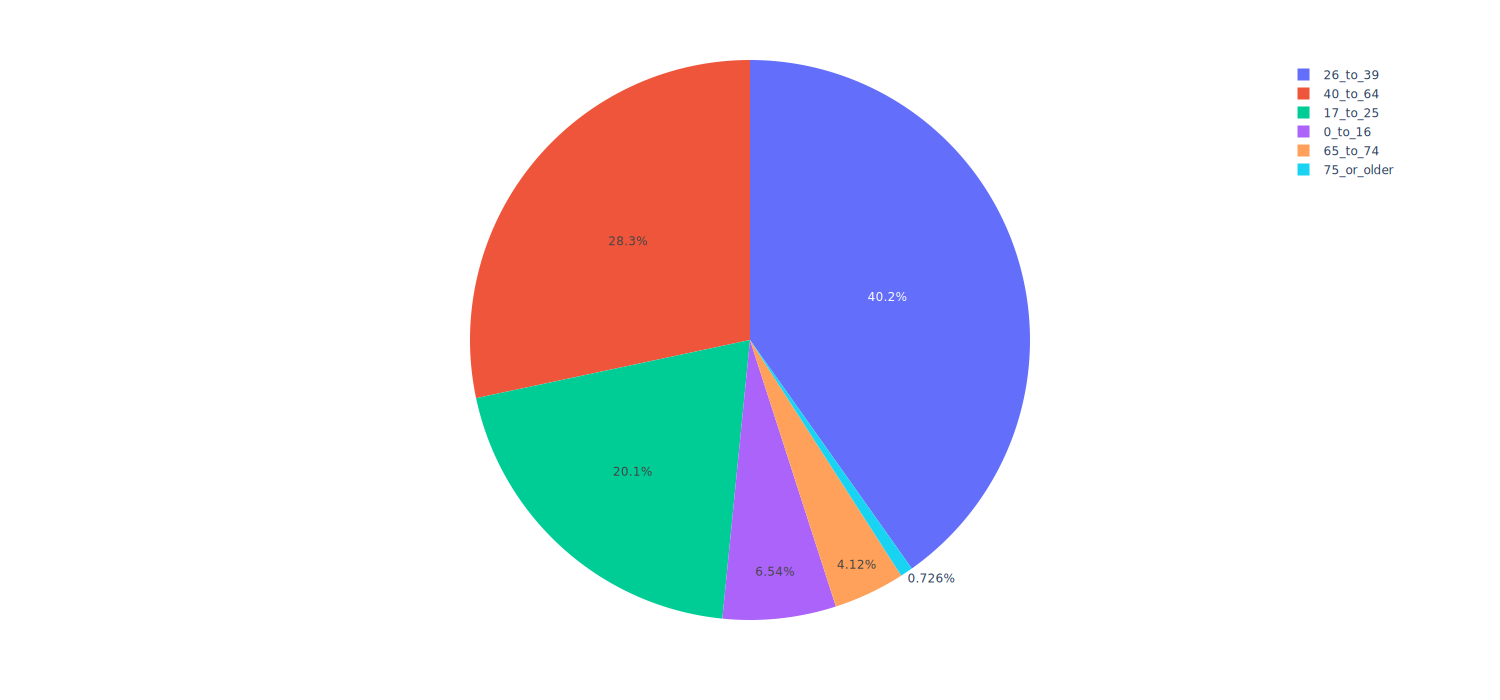

In [228]:
nt = complete_data_sub[complete_data_sub['State'] == 'NT']  
nt_grouped_by_AgeGroup = nt.groupby(['Age Group'])['Number Fatalities'].sum()

print(nt_grouped_by_AgeGroup)




fig = px.pie(data_frame=nt_grouped_by_AgeGroup,values='Number Fatalities',names=nt_grouped_by_AgeGroup.index, width= 1500, height= 700)
fig.show("svg")


<h2><center>SOUTH AUSTRALIA(SA)</center></h2>

**What's the total death in South Australia**

In [229]:
complete_data[complete_data["State"] == "SA"]["Number Fatalities"].sum()

966

**How many people died in SA each year? and Plot the result**


      Number Fatalities
Year                   
2014                138
2015                118
2016                120
2017                116
2018                 89
2019                121
2020                111
2021                108
2022                 45


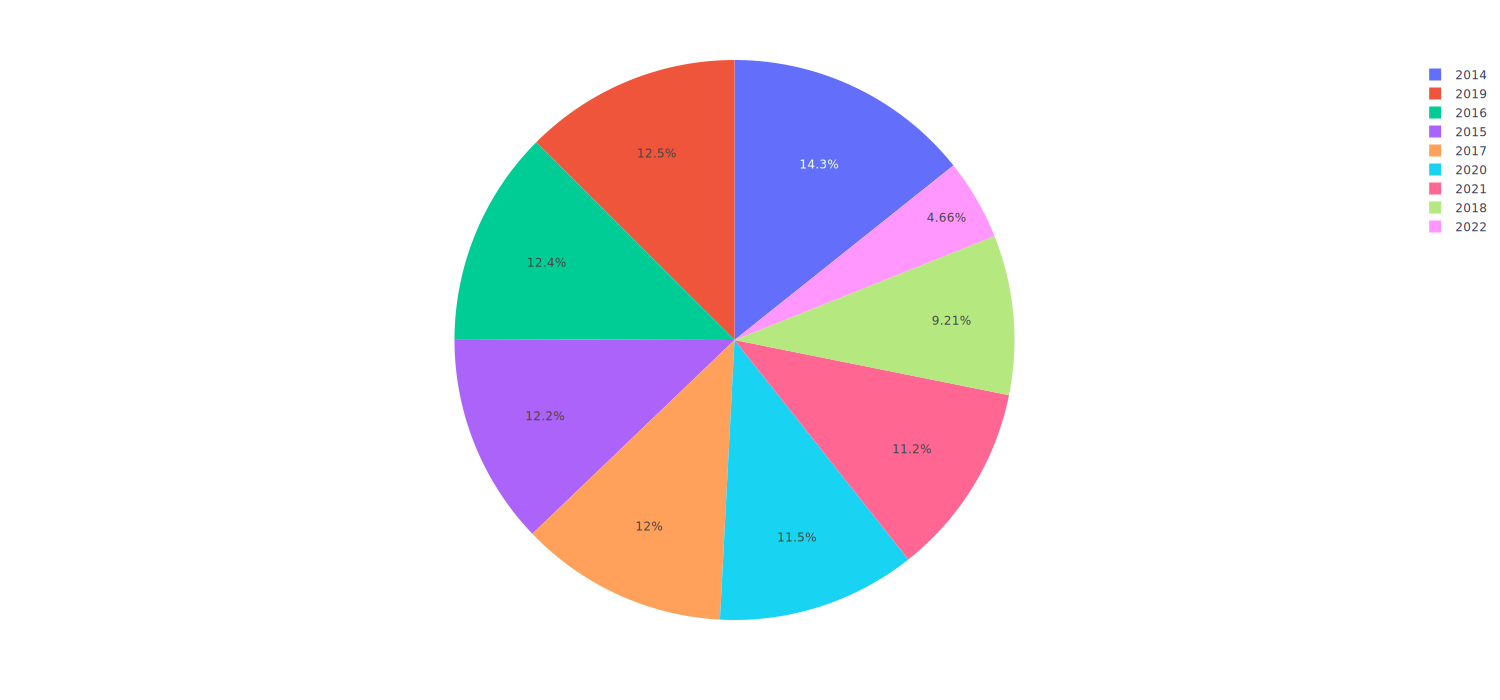

<Figure size 720x576 with 0 Axes>

In [230]:

sa = complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_year = sa.groupby(['Year']).sum()
print(sa_grouped_by_year)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=sa_grouped_by_year,values='Number Fatalities',names=sa_grouped_by_year.index, width= 1500, height= 700)
fig.show("svg")


**Determine the number of fatalities based on Gender for each year**

In [231]:

sa = complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_year = sa.groupby(['Year', 'Gender']).sum()

print(sa_grouped_by_year)



             Number Fatalities
Year Gender                   
2014 Female                 49
     Male                   89
2015 Female                 40
     Male                   78
2016 Female                 42
     Male                   78
2017 Female                 23
     Male                   93
2018 Female                 21
     Male                   68
2019 Female                 29
     Male                   92
2020 Female                 35
     Male                   76
2021 Female                 25
     Male                   83
2022 Female                  8
     Male                   37


3. **How many Male and Female Died? and show the percentile** 



Gender
Female    272
Male      694
Name: Number Fatalities, dtype: int64


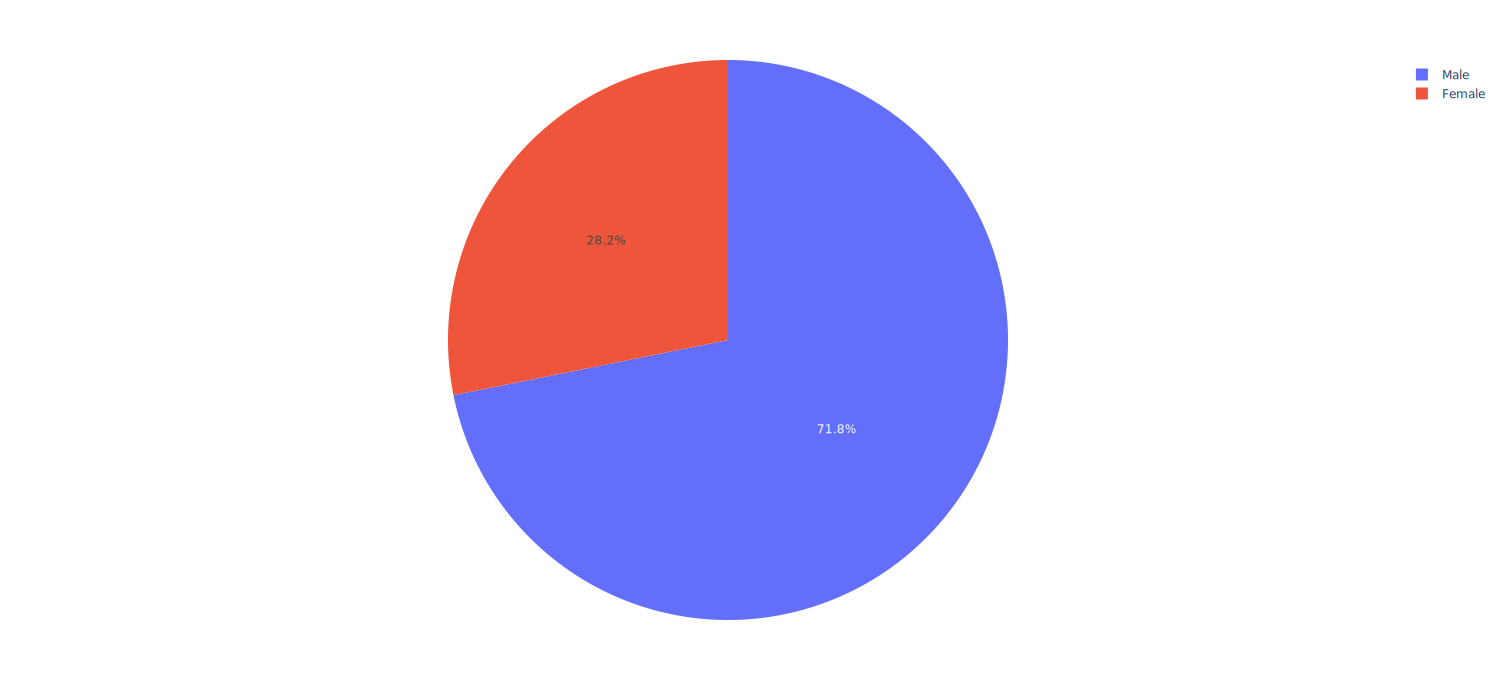

<Figure size 720x576 with 0 Axes>

In [232]:
sa = complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_Gender = sa.groupby(['Gender'])['Number Fatalities'].sum()
print(sa_grouped_by_Gender)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=sa_grouped_by_Gender,values='Number Fatalities',names=sa_grouped_by_Gender.index, width= 1500, height= 700)

fig.show("svg")

4. **When did the crash/death happen?**



Day of week
Weekday    584
Weekend    382
Name: Number Fatalities, dtype: int64


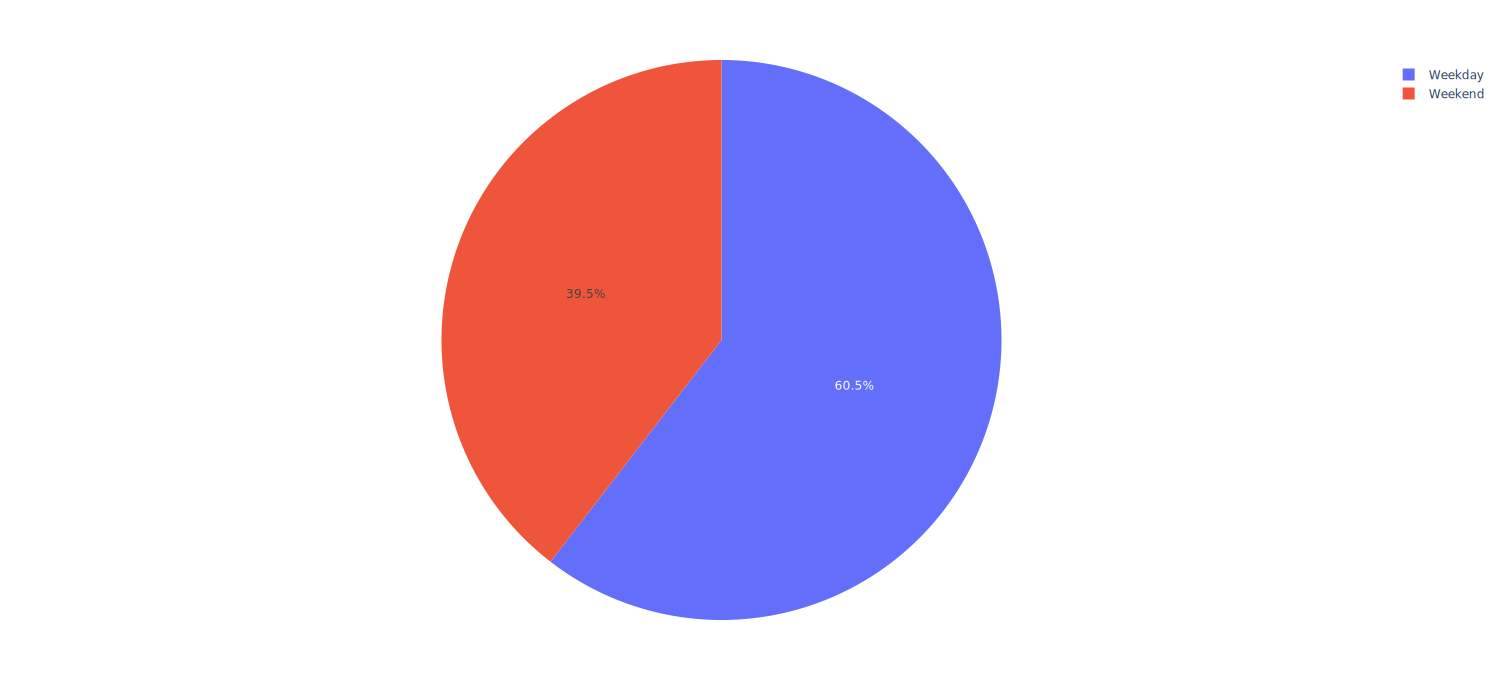

<Figure size 720x576 with 0 Axes>

In [233]:
#Death based on weekday vs weekend

sa = complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_DayOfWeek = sa.groupby(['Day of week'])['Number Fatalities'].sum()
print(sa_grouped_by_DayOfWeek)

plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=sa_grouped_by_DayOfWeek,values='Number Fatalities',names=sa_grouped_by_DayOfWeek.index, width= 1500, height= 700)

fig.show("svg")

Time of day
Day      642
Night    324
Name: Number Fatalities, dtype: int64


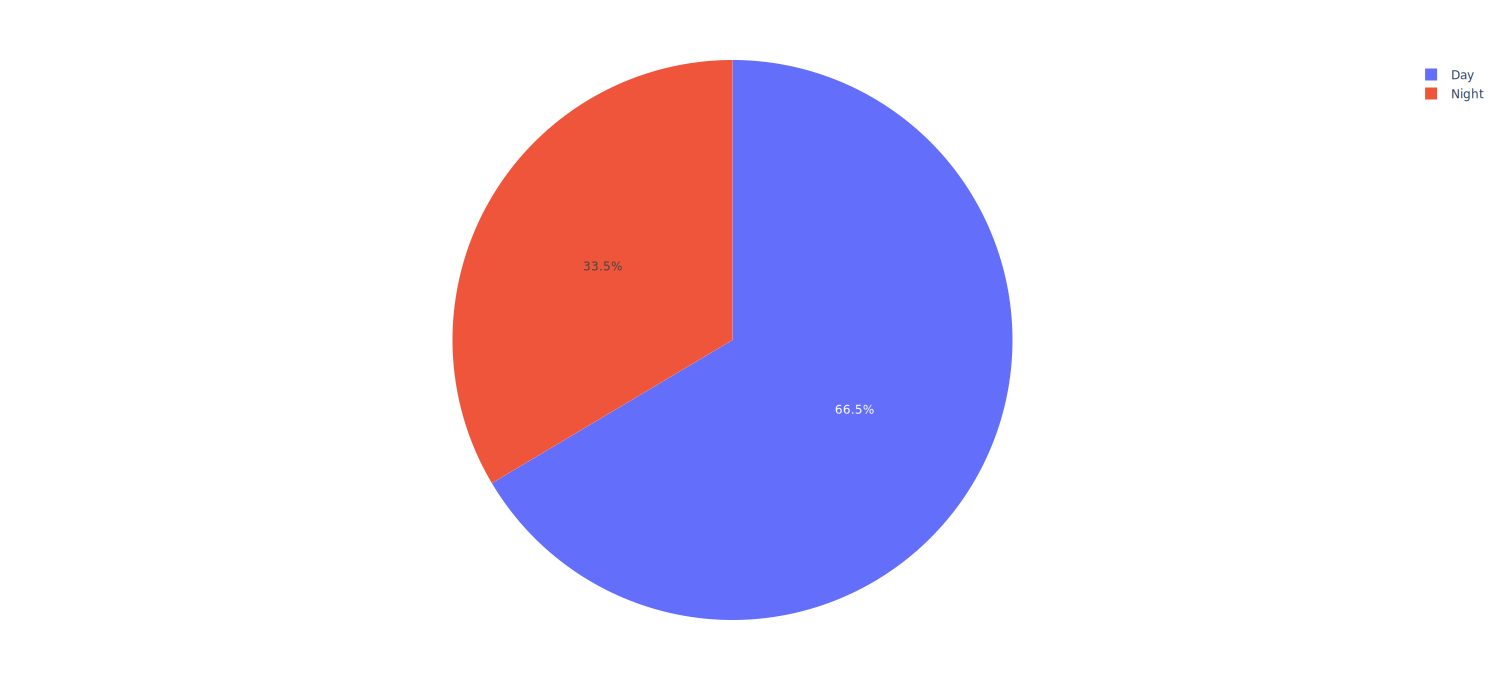

<Figure size 720x576 with 0 Axes>

In [234]:
#Death based on time of the day

asa= complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_Time = sa.groupby(['Time of day'])['Number Fatalities'].sum()
print(sa_grouped_by_Time)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=sa_grouped_by_Time,values='Number Fatalities',names=sa_grouped_by_Time.index, width= 1500, height= 700)
fig.show("svg")

5. **Determine how many people died in each day of the week**


Dayweek
Friday       132
Monday       137
Saturday     194
Sunday       142
Thursday     124
Tuesday      126
Wednesday    111
Name: Number Fatalities, dtype: int64


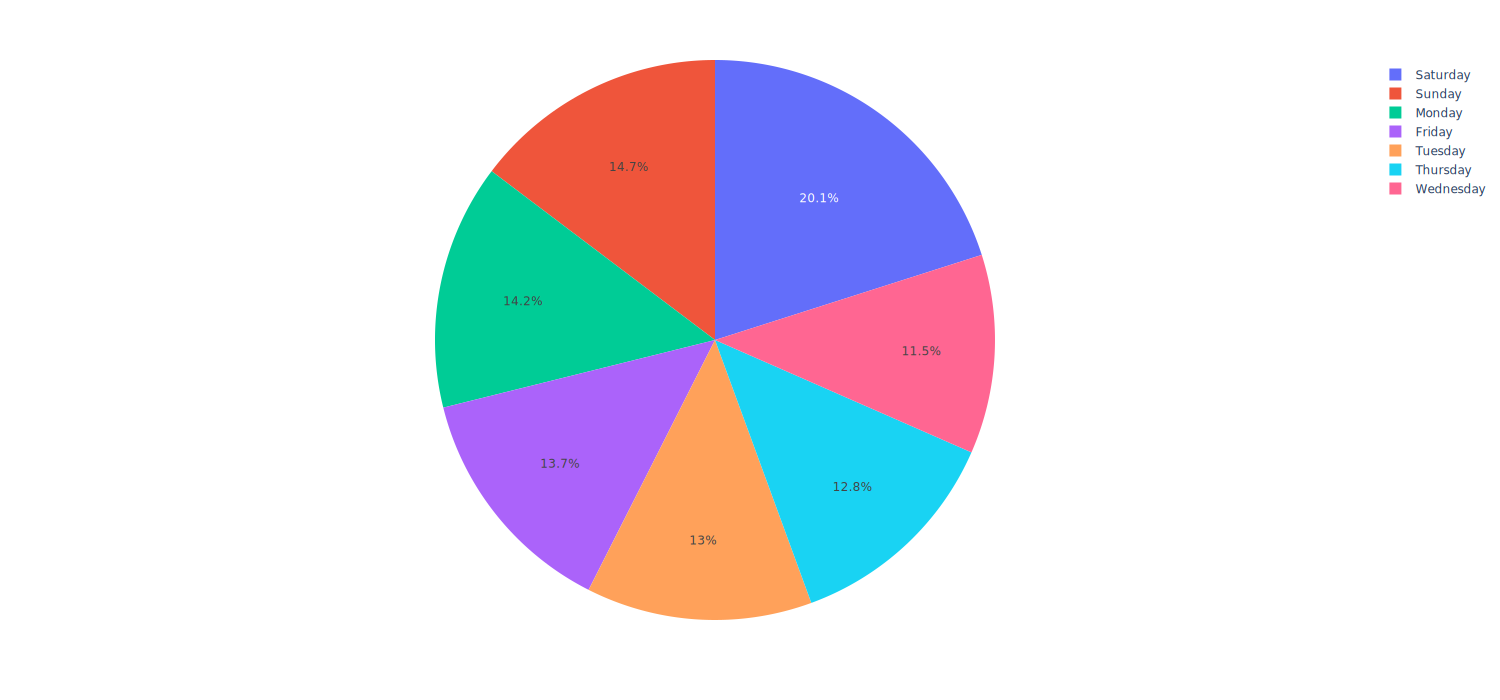

<Figure size 720x576 with 0 Axes>

In [235]:

sa = complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_Day = sa.groupby(['Dayweek'])['Number Fatalities'].sum()
print(sa_grouped_by_Day)


plt.figure(figsize=(10, 8))


fig = px.pie(data_frame=sa_grouped_by_Day,values='Number Fatalities',names=sa_grouped_by_Day.index, width= 1500, height= 700)
fig.show("svg")



**Categorize the casualties based on what they were doing when the crash happened and plot it**

Road User
Cyclist              37
Driver              467
Motorcycle rider    128
Passenger           215
Pedestrian          119
Name: Number Fatalities, dtype: int64


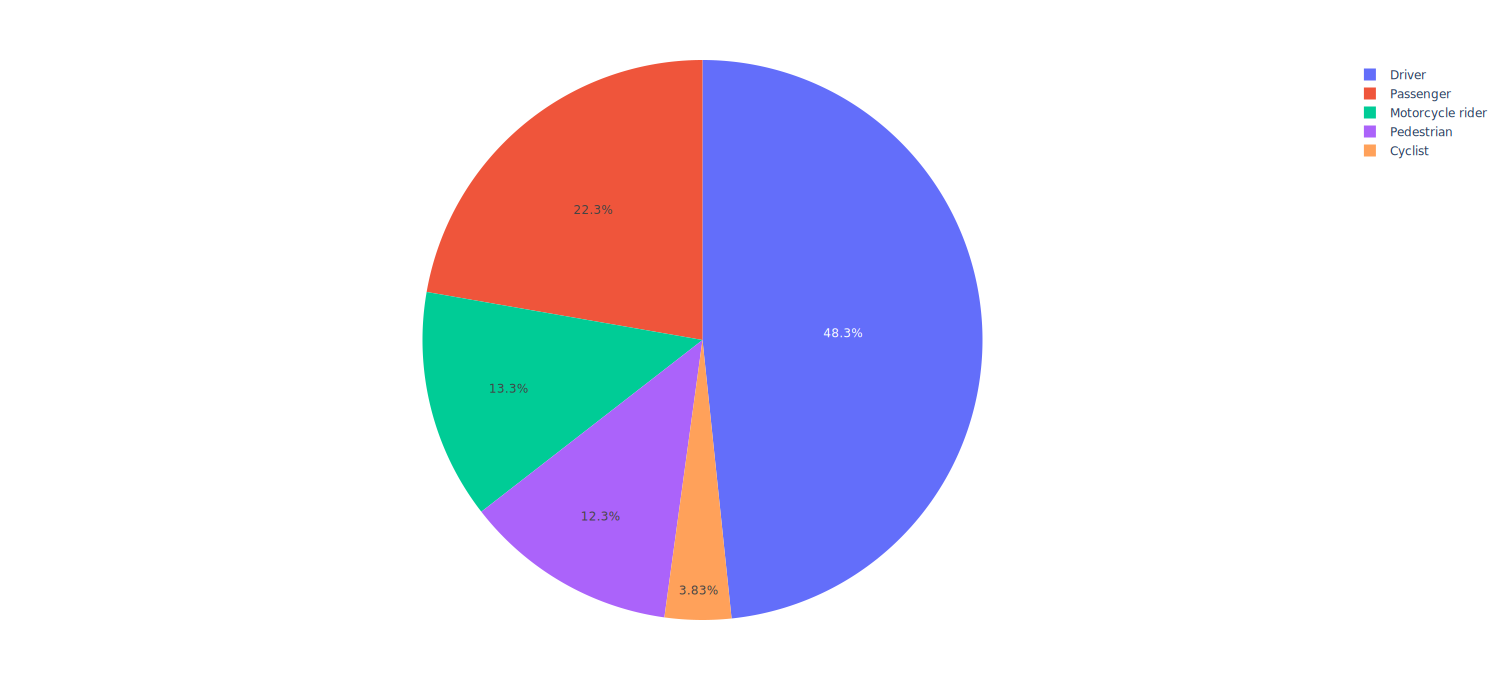

<Figure size 720x576 with 0 Axes>

In [236]:
sa = complete_data_sub[complete_data_sub['State'] == 'SA']  
sa_grouped_by_RoadUser = sa.groupby(['Road User'])['Number Fatalities'].sum()

print(sa_grouped_by_RoadUser)


plt.figure(figsize=(10, 8))


fig= px.pie(data_frame=sa_grouped_by_RoadUser,values='Number Fatalities',names=sa_grouped_by_RoadUser.index, width= 1500, height= 700)
fig.show("svg")


<h2><center>SUMMARY</center></h2>

***If you are interested in the summary of individual States, please refer to the extensive details provided under each state***

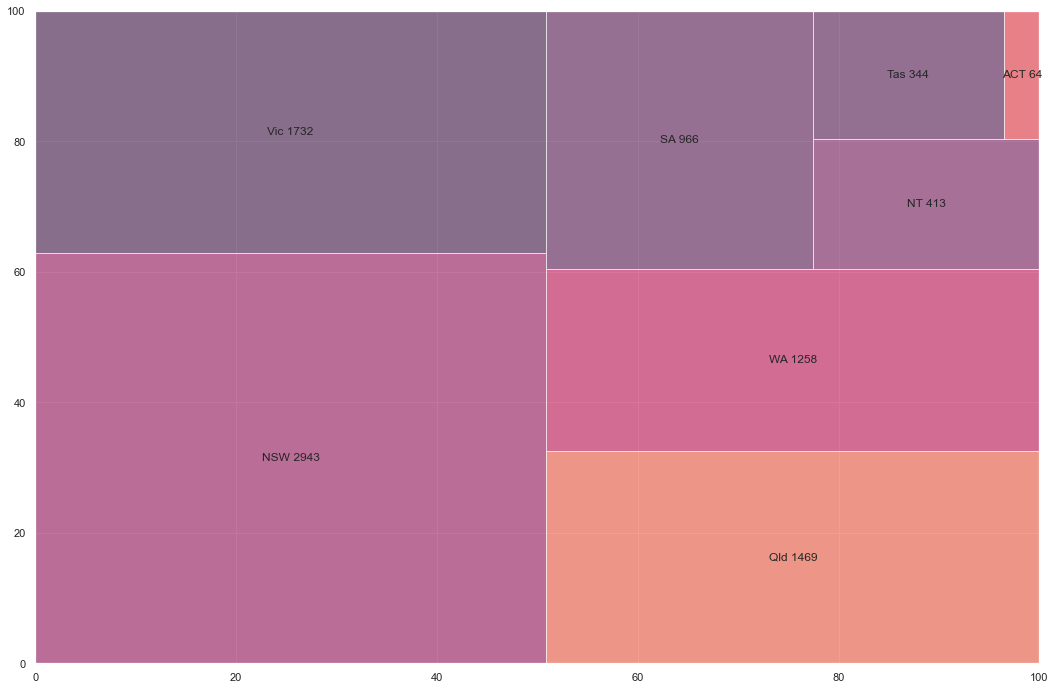

In [149]:

fig = plt.figure(figsize=(18,12))
sizes=complete_data.groupby('State',)['Number Fatalities'].sum().sort_values(ascending= False).tolist() 
label=complete_data.groupby('State',)['Number Fatalities'].sum().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

plt.show()